In [2]:
# -*- coding: utf-8 -*-

import pdb
import random
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split
from scipy import stats
from itertools import combinations
from sklearn.datasets import load_iris

"""
The function Measure_Patterns has 3 parameters: X_train, y_train, optional
optional will check if the columns selected is categorical (integers and strings) or numerical (float)
if optional is not provided, then the program will assume that the column has integers values, therefore it will be considered categorical
"""



'\nThe function Measure_Patterns has 3 parameters: X_train, y_train, optional\noptional will check if the columns selected is categorical (integers and strings) or numerical (float)\nif optional is not provided, then the program will assume that the column has integers values, therefore it will be considered categorical\n'

In [4]:
# Load dataset 
#data = np.loadtxt("uniform_large_d_1.tex")
data = np.loadtxt("uniform_small_d_1.tex")
# Creating NumPy array
array = np.array(data)
# Converting to Pandas DataFrame
df_table = pd.DataFrame(array)
# Displaying the table
print(df_table)

          0         1         2         3         4         5         6    \
0    0.235955  0.203613  0.502020  0.393852  0.150115  0.174713  0.485687   
1    0.444499  0.495811  0.096123  0.384066  0.150078  0.264487  0.940181   
2    0.613152  0.705757  0.308831  1.082504  0.513974  0.321329  0.606935   
3    0.895340  0.592793  0.006796  0.621984  0.403423  0.872638  0.094352   
4    0.858076  0.255805  0.288604  1.064557  0.795970  0.893415  0.848613   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.991235  0.225655  0.856369  0.662496  0.339739  0.473479  1.143186   
496  0.127120  0.355182  0.823098  0.361363  0.307980  0.288479  0.934802   
497  1.167102  0.545050  0.957860  0.713141  0.438276  0.241850  0.323316   
498  1.023965  1.089028  0.513093  0.381955  0.480742  0.641724  0.512359   
499  0.991432  0.614476  0.692874  0.952732  0.791925  0.375893  0.135842   

          7         8         9    ...       141       142       143  \
0  

In [6]:
# From the dataset, change 25 columns to 'categorical'
#Loop, converts floats to ints and then those ints to category
for i in range(26):
    df_table.iloc[:,i] = df_table.iloc[:,i].round()
    df_table.iloc[:,i] = df_table.iloc[:,i].astype(int)
    df_table.iloc[:,i] = df_table.iloc[:,i].astype("category")
    
df_table.iloc[:, 150] = df_table.iloc[:, 150].astype("category")


# Split dataset into X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(df_table.iloc[:,0:150], df_table.iloc[:,-1], test_size=0.2, random_state=52)

In [8]:
print(df_table)

     0    1    2    3    4    5    6    7    8    9    ...       141  \
0    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.200280   
1    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.980781   
2    1.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  ...  0.467864   
3    1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  ...  0.140005   
4    1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.321792   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
495  1.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  ...  1.071776   
496  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  ...  0.509852   
497  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  ...  0.452829   
498  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  ...  0.600971   
499  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.422560   

          142       143       144       145       146       147       148  \
0    0.241395  0.898875  0.281621  0.395712  0.433720  0.5

In [10]:
# Function Measure_Patterns begins here!
def Measure_Patterns(X_train, y_train, optional=None):
    
    # Check if the data type is provided for columns
    if optional is None:
        print("Optional parameter not provided. Assuming integers values are categorical")
    
        # Splitting X_train into numerical subset 
        print("\nNumerical DataFrame:")
        numerical_df = X_train.select_dtypes(include = ["float64"])
        print(numerical_df)

        # Splitting X_train into categorical subset 
        print("Categorical DataFrame:")
        categorical_df = X_train.select_dtypes(exclude=['float64'])
        print(categorical_df)
    
    else:
        # Create empty numerical & categorical data frames
        numerical = []
        numerical_colnames = []
        categorical = []
        categorical_colnames = []
        
        # Check that length of optional = # of columns in X_train
        # Optional is the column type for X_train, so the lengths should be equal
        if len(optional) == len(X_train.columns):
            # For all the values in optional
            for i in range(len(optional)):
                if optional[i] == True:
                    numerical.append(X_train.iloc[:,i])
                    # TO DO: Save SPECIFIC column name in each loop, order matters
                    # numerical_colnames.append()
                else: 
                    categorical.append(X_train.iloc[:,i])
                    # TO DO: Save SPECIFIC column name in each loop, order matters
                    # categorical_colnames.append()
            # Turn transposed arrays into dataframes
            numerical_df = pd.DataFrame(np.transpose(numerical))
            categorical_df = pd.DataFrame(np.transpose(categorical))
            # TO DO: Re-attach the column names to numerical_df & categorical_df 
            
            print("Numerical DF:")
            print(numerical_df)
            print("Categorical Df")
            print(categorical_df)
            
        else:
            print("The length of X_train and optional are different.")
            

In [162]:
##################### Correlation between columns (numerical) Code ############################
# Takes the X_train data to find correlation between NUMERICAL features
def num_corr(X_train_numerical):
    matrix = X_train_numerical.corr(method='pearson')
    print("---------------------------Correlation Matrix------------------------- \n", matrix)
     
    #Calls the function so the matrix prints out    
    num_corr(numerical_df)

In [110]:
####################### Chi-Square (F vs F) Code ################################################
    
    print("\n------------------Chi-Squared for Features v. Features-----------------------")
    # Finds dependency between all CATEGORICAL features in X_train
    def chi_squared_fvf(X_train_categorical):
        
        # Extract variable names
        variable_names = list(X_train_categorical.columns)

        # Initialize matrices to store chi-squared and p-values
        num_variables = len(variable_names)
        chi_squared = np.zeros((num_variables, num_variables))
        p_values = np.zeros((num_variables, num_variables))

        # Compute chi-squared and p-values for each pair of variables
        for i, j in combinations(range(num_variables), 2):
            contingency_table = pd.crosstab(X_train_categorical.iloc[:, i], X_train_categorical.iloc[:, j])
            
            # Compute chi-squared and p-values
            chi2 = stats.chi2_contingency(contingency_table)[0]
            p = stats.chi2_contingency(contingency_table)[1]
            
            # Assign results to chi_squared and p_values matrices
            chi_squared[i, j] = chi2
            chi_squared[j, i] = chi2  # Assign to symmetric position in the matrix
            p_values[i, j] = p
            p_values[j, i] = p  # Assign to symmetric position in the matrix

        # Create a DataFrame with variable names as index and columns
        chi_squared_df = pd.DataFrame(chi_squared, index=variable_names, columns=variable_names)
        p_values_df = pd.DataFrame(p_values, index=variable_names, columns=variable_names)

        # Printing the matrix-like output with variable names
        print("Chi-Squared Values:")
        print(chi_squared_df)
        print("\nP-Values:")
        print(p_values_df)
    
    chi_squared_fvf(categorical_df)

IndentationError: unexpected indent (4287958340.py, line 3)

In [ ]:
##################### Chi-Square (F vs label column) Code ####################################
    
    print("\n------------------------Chi-Square (F vs label column)------------------------")
    # Finds dependency between all CATEGORICAL features in X_train & the label in y_train
    def chi_squared_fvl(X_train_categorical, y_train):
        
        # Combining CATEGORICAL X_train and y_train
        df = X_train_categorical
        df['label'] = y_train

        # Number of features, excluding label
        var_count = len(df.columns)-1

        # Creates an empty array to print values in a table
        results = []

        for i in range(0, var_count):

            # Create contigency table of all features v. label
            crosstab = pd.crosstab(df.iloc[:, i], df.iloc[:,-1])
            
            # Compute chi-squared and p-values
            chi2 = stats.chi2_contingency(crosstab)[0]
            p = stats.chi2_contingency(crosstab)[1]
            
            # Append results to the list
            results.append({
                "Feature": df.columns[i],
                "Chi Squared Statistic": chi2,
                "P-Value": p})

        # Create a DataFrame from the results
        results_df = pd.DataFrame(results)

        # Print the DataFrame
        print("Label:", df.columns.values[-1])
        print(results_df.to_string(index=False))
    
    chi_squared_fvl(categorical_df, y_train)

In [14]:
df_DA = X_train.select_dtypes(include = ["float64"])
df_DA.head()

26        27        28        29        30        31        32   \
159  0.258704  0.344136  0.101032  0.494613  0.706725  0.514221  0.741310   
198  0.216002  0.694623  1.021860  1.040331  0.781843  0.354569  0.482165   
259  0.855286  0.644247  0.943855  0.364827  0.933419  0.332472  0.776875   
301  0.703033  0.377723  0.534356  0.433473  0.078567  0.898912  0.914020   
220  0.637374  0.201711  0.307204  0.162291  0.605390  0.044414  0.596868   

          33        34        35   ...       140       141       142  \
159  0.056604  0.286976  0.254243  ...  0.589255  0.048794  0.116295   
198  1.029285  0.608765  0.596775  ...  0.524100  0.638190  0.252662   
259  0.044860  0.352253  0.371662  ...  0.936817  0.905198  0.530844   
301  0.475226  0.833132  0.094986  ...  0.718875  0.692931  0.695386   
220  0.668864  0.209153  0.673763  ...  0.340805  0.458531  0.257464   

          143       144       145       146       147       148       149  
159  0.750023  0.504721  0.482695  0.061228  0.800553  0.815441  0.997321  
198  0.584352  0.731232  0.420754  0.293242  0.294986  0.651735  0.504970  
259  0.446072  0.157876  0.661326  0.562504  0.474810  0.189050  0.602920  
301  0.780015  0.914984  0.757668  0.329954  0.865520  0.779557  0.979039  
220  0.371455  0.015987  0.082521  0.108772  0.681779  0.217713  0.070986  

[5 rows x 124 columns]

In [22]:
############################# Anderson-Darling Test ##########################
# tests if a sample comes from a population with a specific distribution
# used to determine whether or not your data follow a normal distribution
from scipy.stats import anderson

# Subset to select only numerical variables columns --> A-D Test only works with numerical
df_DA = X_train.select_dtypes(include = ["float64"])

# Get the actual column indices for the numerical columns
numerical_column_indices = [X_train.columns.get_loc(col) for col in df_DA.columns]

# Initialize a list to store results
results = []

# Significance level for the normality test (usually 0.05)
significance_level_index = 2  # Index for 5% significance level in the Anderson-Darling test

# Iterate through each row
for col_index, column in zip(numerical_column_indices, df_DA.columns):
    # Convert columns to a numpy array
    data = df_DA[column].values

    # Perform the Anderson-Darling Test
    result = anderson(data)

    # Determine if the distribution is normal at the 5% significance level
    is_normal = result.statistic < result.critical_values[significance_level_index]

    #H0:  the data are normally distributed, 
    #Ha:  the data are not normally distributed. 
    # Formulate the hypothesis result
    hypothesis = "H0: Fail to reject" if is_normal else "Ha: Reject"
    
    # Store the results
    results.append({
        'feature': col_index,
        'statistic': result.statistic,
        'critical_values': result.critical_values,
        'significance_level': result.significance_level,
        'normal_dist': is_normal,
        'hypothesis': hypothesis
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the results
print("---------------------------------------- Anderson-Darling Test Results ---------------------------------------------")
print(results_df.to_string())
#results_df.head()

---------------------------------------- Anderson-Darling Test Results ---------------------------------------------
     feature  statistic                    critical_values           significance_level  normal_dist  hypothesis
0         26   3.586404  [0.57, 0.65, 0.779, 0.909, 1.081]  [15.0, 10.0, 5.0, 2.5, 1.0]        False  Ha: Reject
1         27   3.748718  [0.57, 0.65, 0.779, 0.909, 1.081]  [15.0, 10.0, 5.0, 2.5, 1.0]        False  Ha: Reject
2         28   2.846388  [0.57, 0.65, 0.779, 0.909, 1.081]  [15.0, 10.0, 5.0, 2.5, 1.0]        False  Ha: Reject
3         29   2.345505  [0.57, 0.65, 0.779, 0.909, 1.081]  [15.0, 10.0, 5.0, 2.5, 1.0]        False  Ha: Reject
4         30   3.251239  [0.57, 0.65, 0.779, 0.909, 1.081]  [15.0, 10.0, 5.0, 2.5, 1.0]        False  Ha: Reject
5         31   3.629164  [0.57, 0.65, 0.779, 0.909, 1.081]  [15.0, 10.0, 5.0, 2.5, 1.0]        False  Ha: Reject
6         32   2.356732  [0.57, 0.65, 0.779, 0.909, 1.081]  [15.0, 10.0, 5.0, 2.5, 1.0]     

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

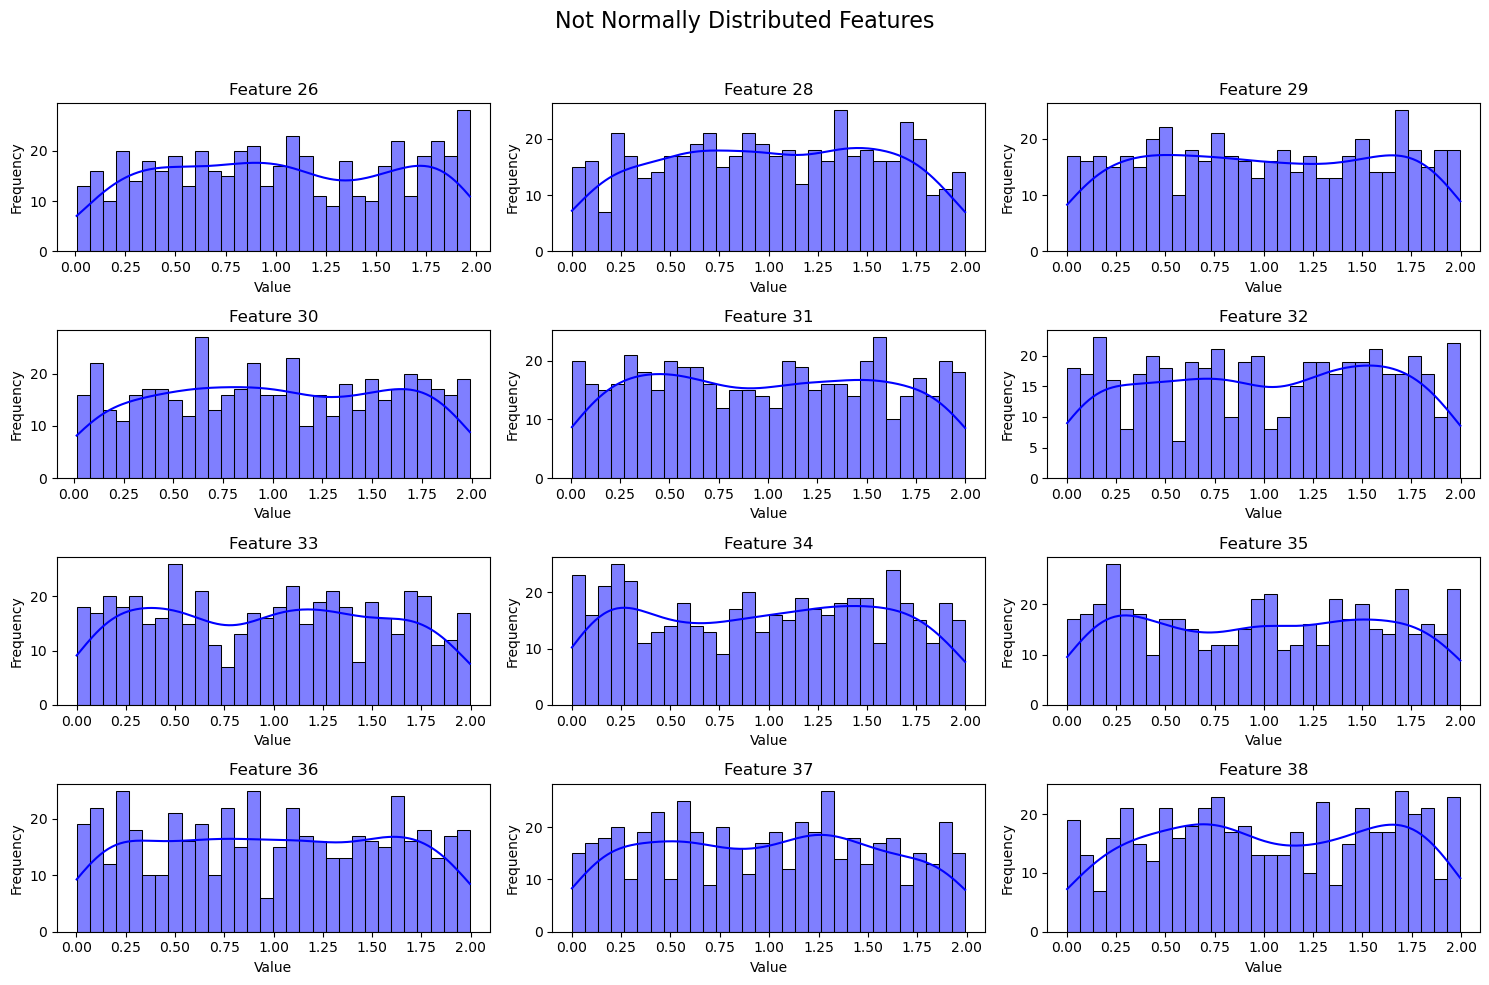

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

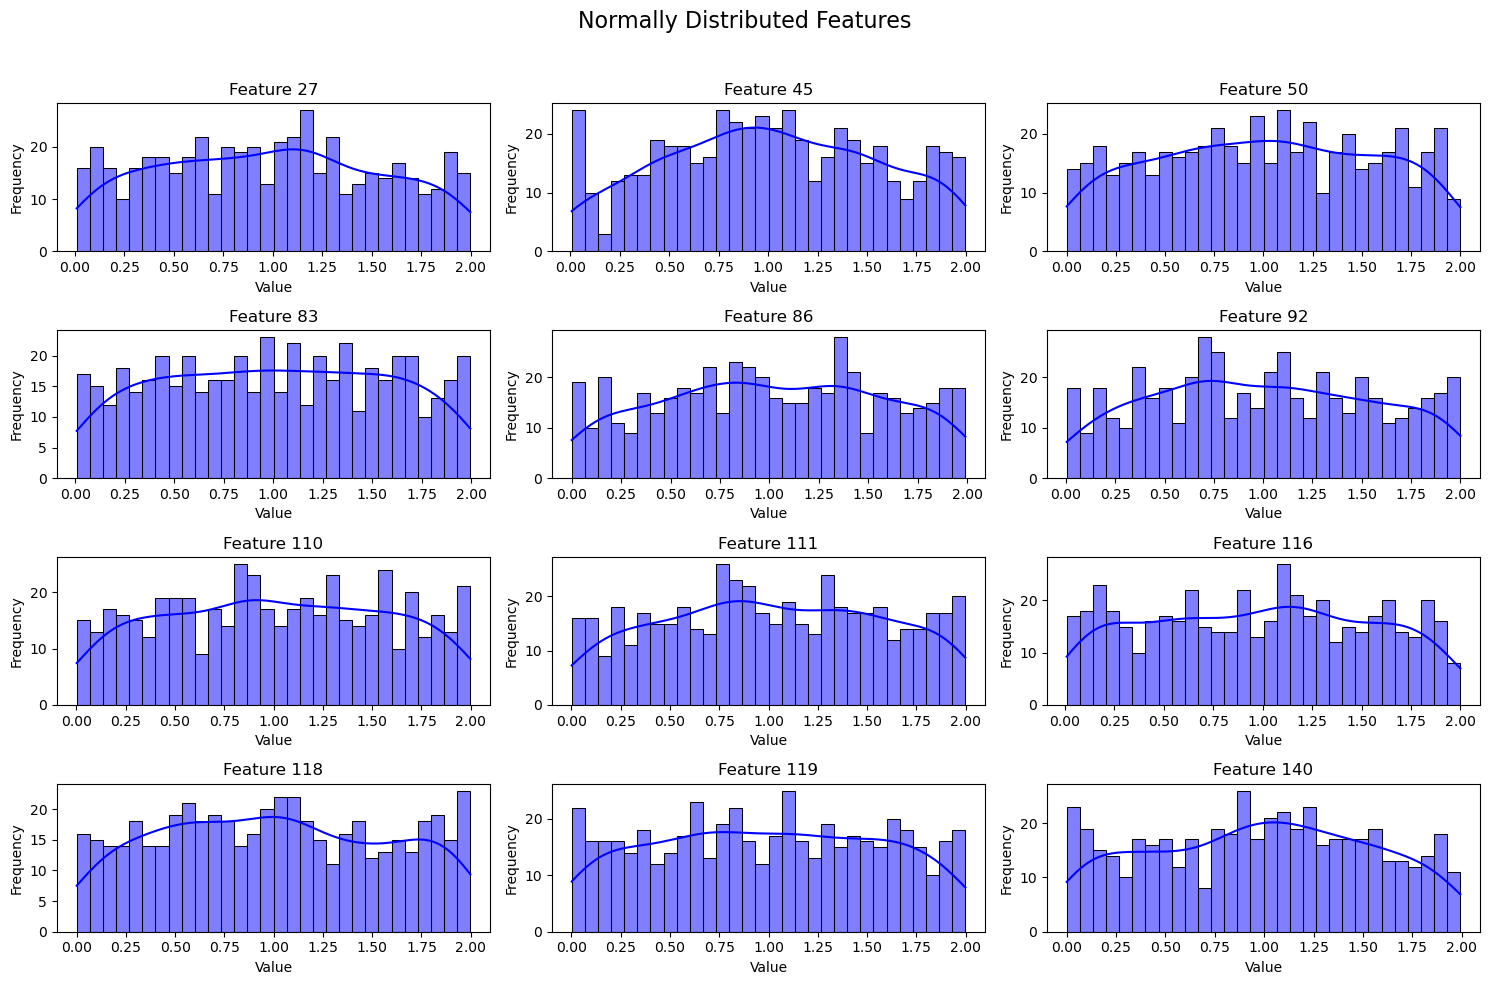

In [126]:
#######   SUBPLOTS 4X3 MATRIX OF NORMAL DIST AND NOT NORMAL DIST
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of columns based on KS test results
not_normal_columns = [26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
normal_columns = [27, 45, 50, 83, 86, 92, 110, 111, 116, 118, 119, 140]

# Function to plot histograms with KDE in a 4x3 grid
def plot_histograms_with_kde(df, columns, title):
    fig, axes = plt.subplots(4, 3, figsize=(15, 10))
    fig.suptitle(title, fontsize=16)
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(df.iloc[:, col], bins=30, kde=True, ax=axes[i], color='blue')
        axes[i].set_title(f'Feature {col}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot histograms with KDE for not normally distributed columns
plot_histograms_with_kde(df_table, not_normal_columns, 'Not Normally Distributed Features')

# Plot histograms with KDE for normally distributed columns
plot_histograms_with_kde(df_table, normal_columns, 'Normally Distributed Features')

Feature: 26, KS Statistic: 0.0847, P-Value: 1.010e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


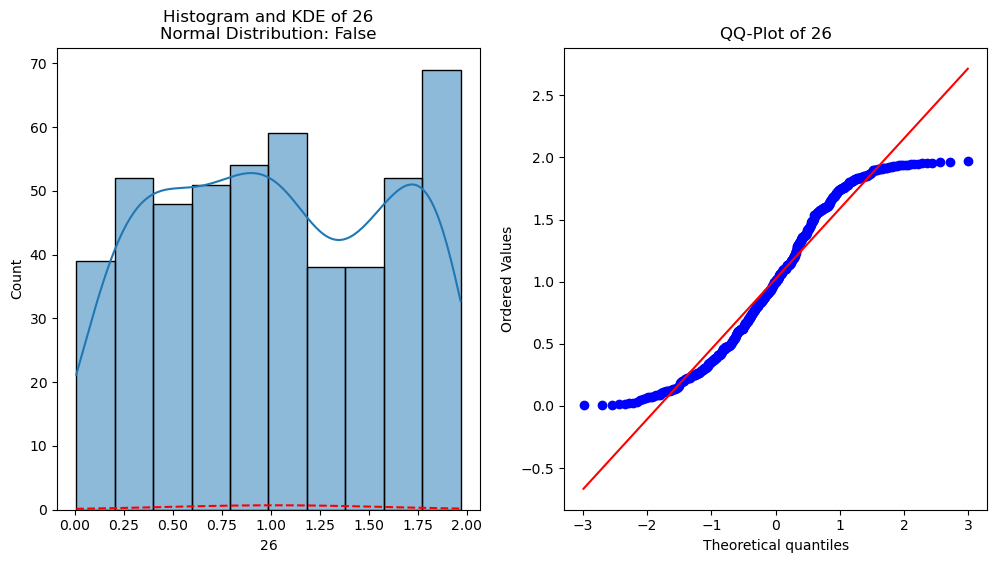

Feature: 27, KS Statistic: 0.0574, P-Value: 7.145e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


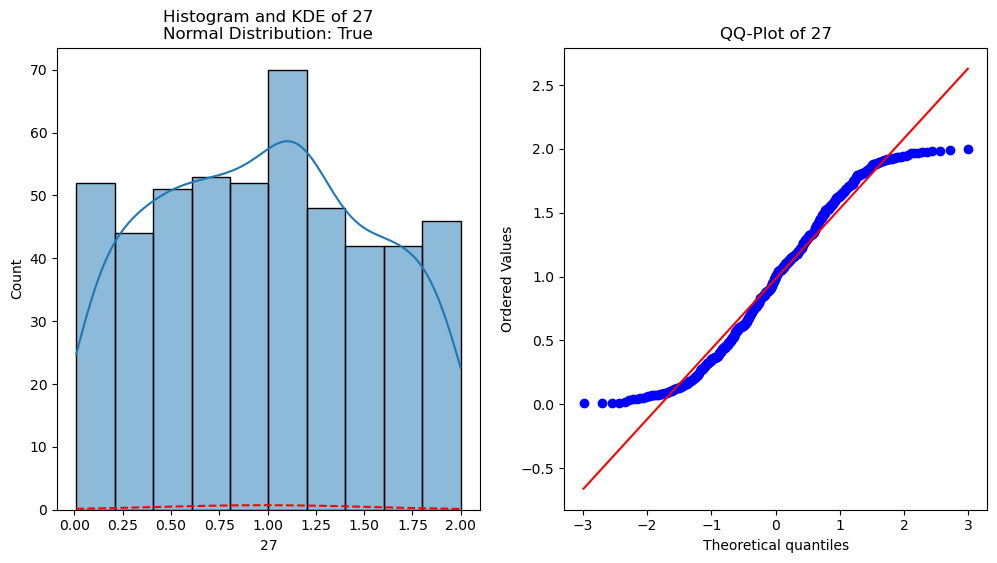

Feature: 28, KS Statistic: 0.0664, P-Value: 1.766e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


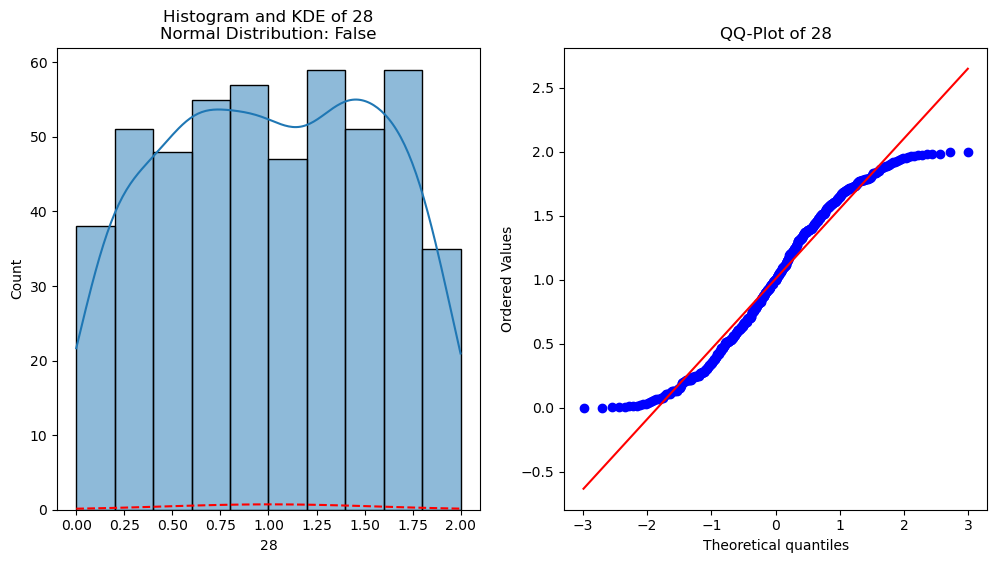

Feature: 29, KS Statistic: 0.0749, P-Value: 5.138e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


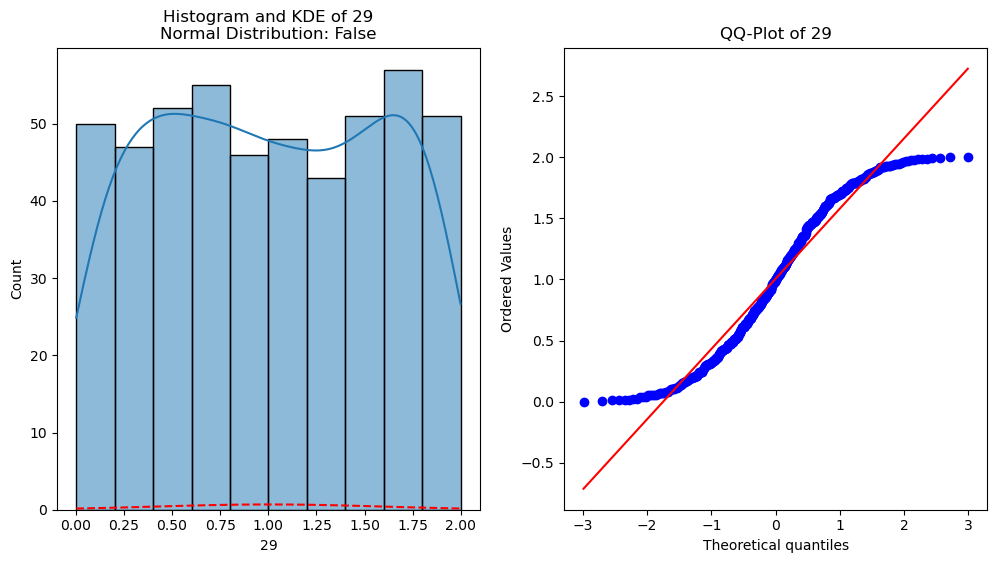

Feature: 30, KS Statistic: 0.0685, P-Value: 1.315e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


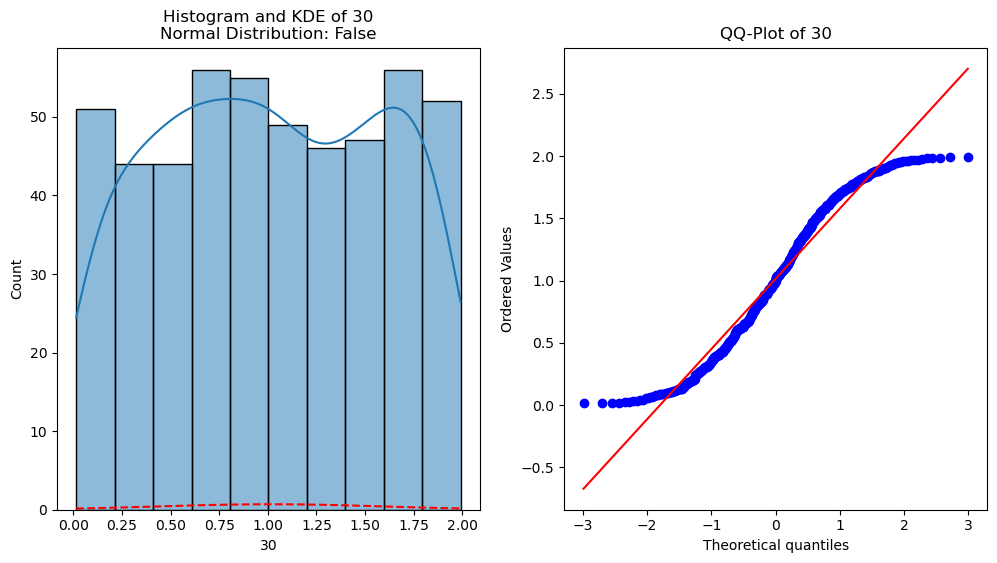

Feature: 31, KS Statistic: 0.0741, P-Value: 7.835e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


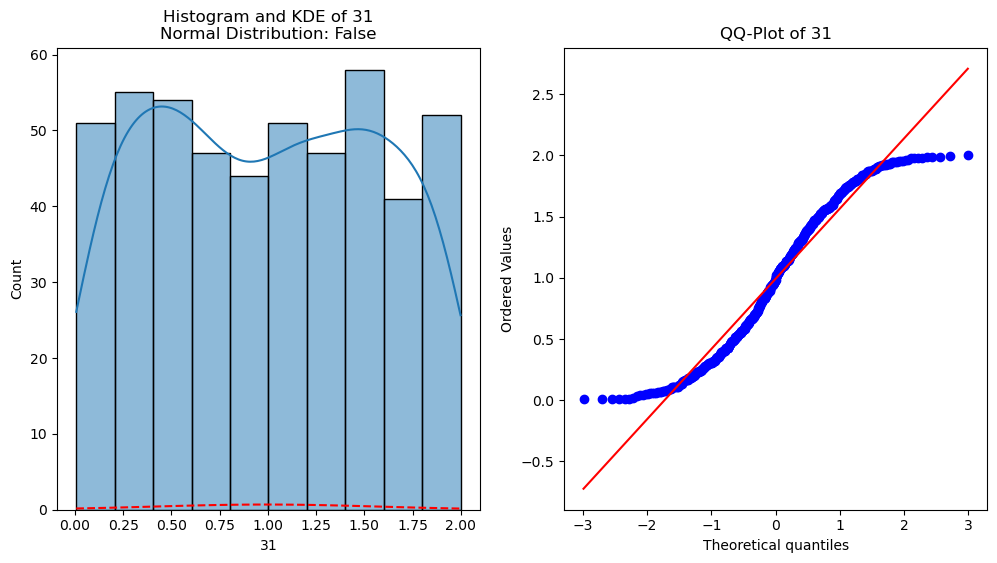

Feature: 32, KS Statistic: 0.0691, P-Value: 1.219e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


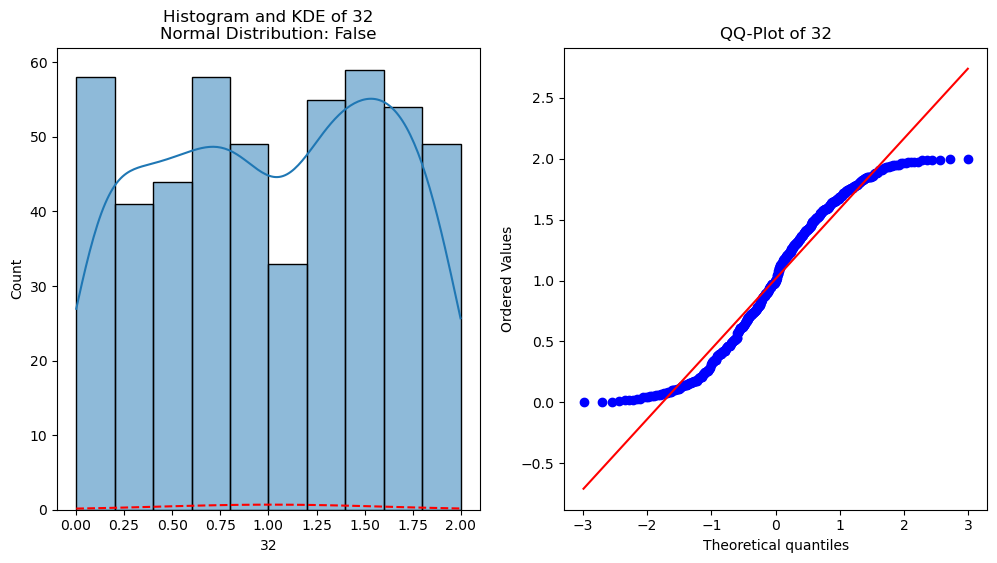

Feature: 33, KS Statistic: 0.0784, P-Value: 4.067e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


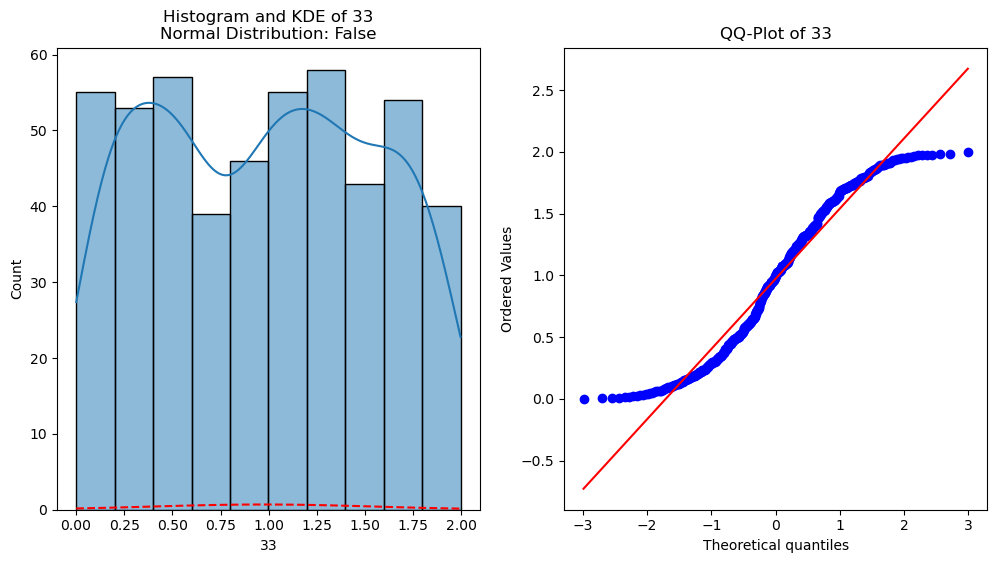

Feature: 34, KS Statistic: 0.0809, P-Value: 2.704e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


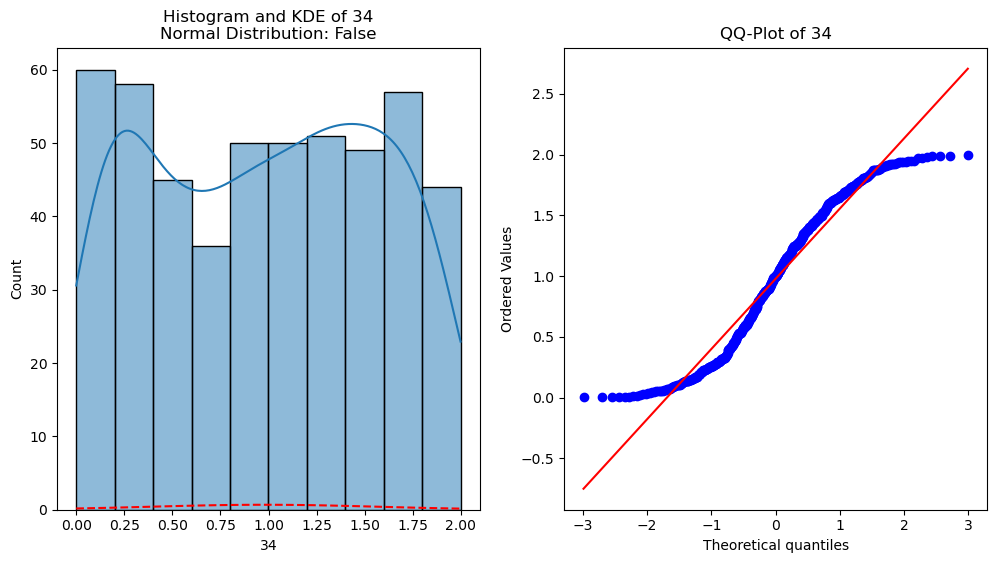

Feature: 35, KS Statistic: 0.0806, P-Value: 2.848e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


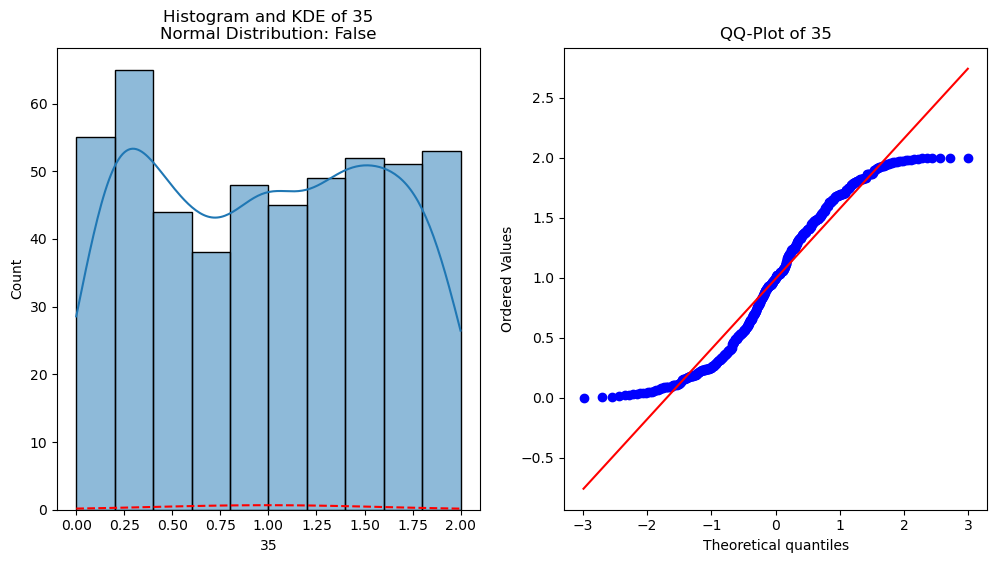

Feature: 36, KS Statistic: 0.0680, P-Value: 1.416e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


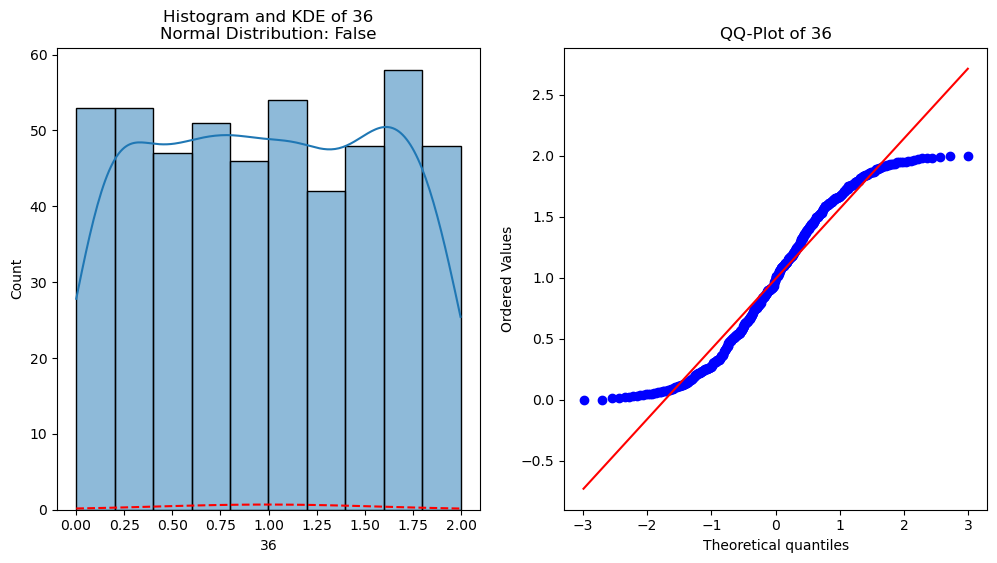

Feature: 37, KS Statistic: 0.0715, P-Value: 1.150e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


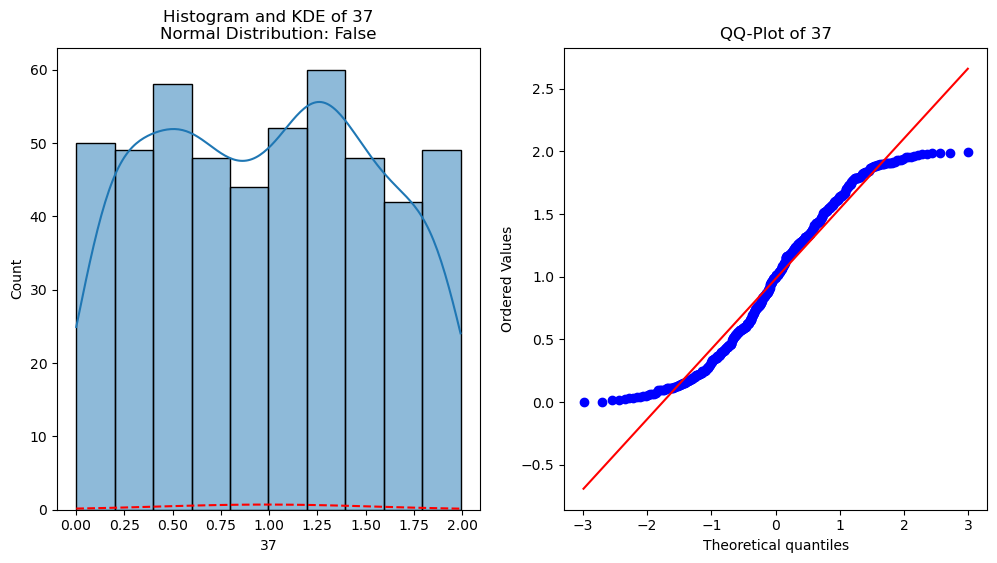

Feature: 38, KS Statistic: 0.0806, P-Value: 2.063e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


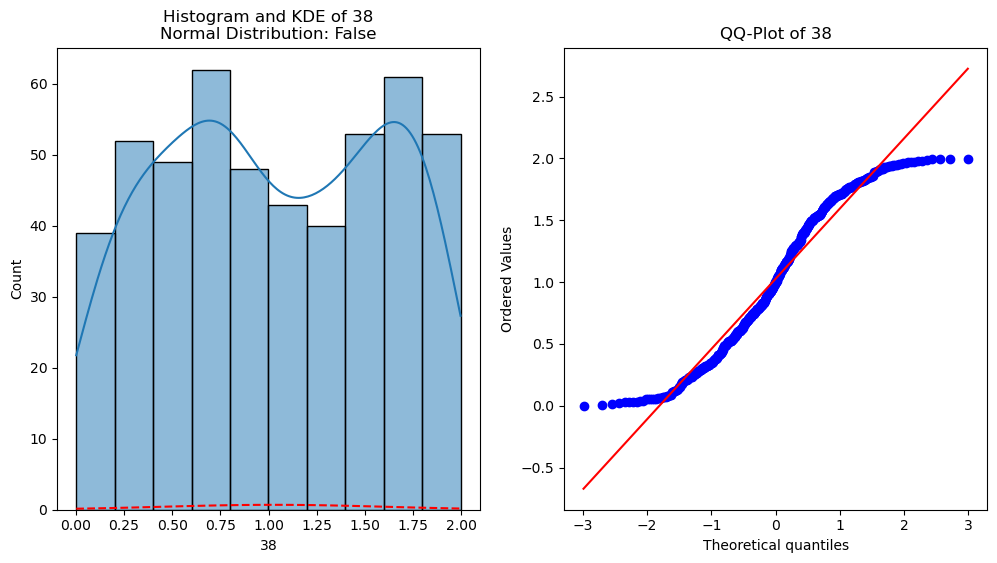

Feature: 39, KS Statistic: 0.0664, P-Value: 2.114e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


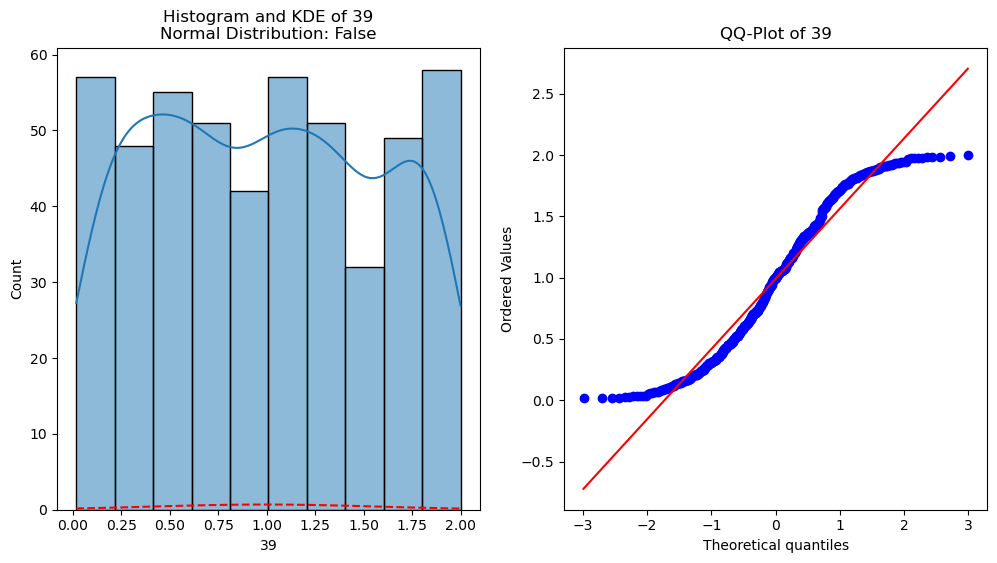

Feature: 40, KS Statistic: 0.0718, P-Value: 8.157e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


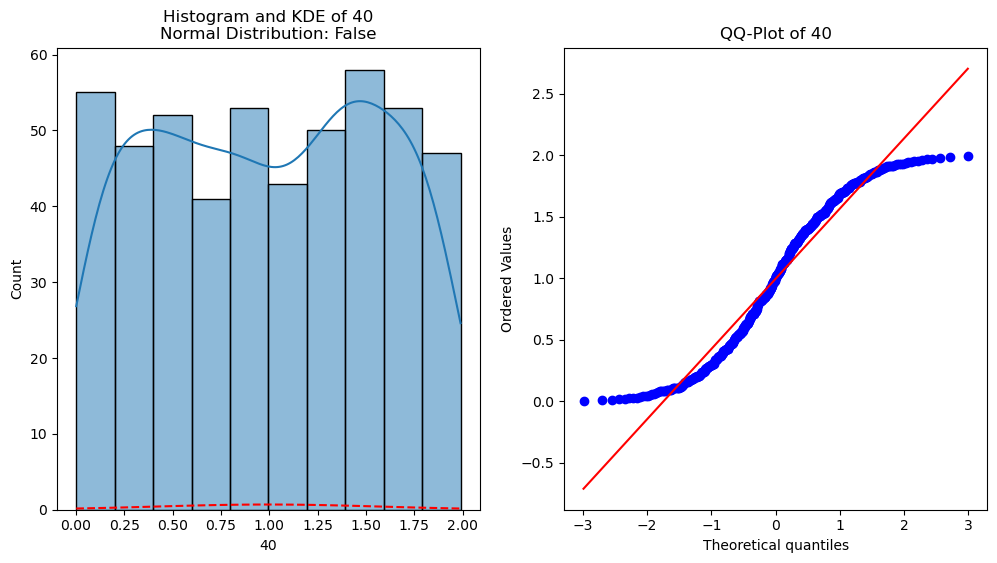

Feature: 41, KS Statistic: 0.0769, P-Value: 3.727e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


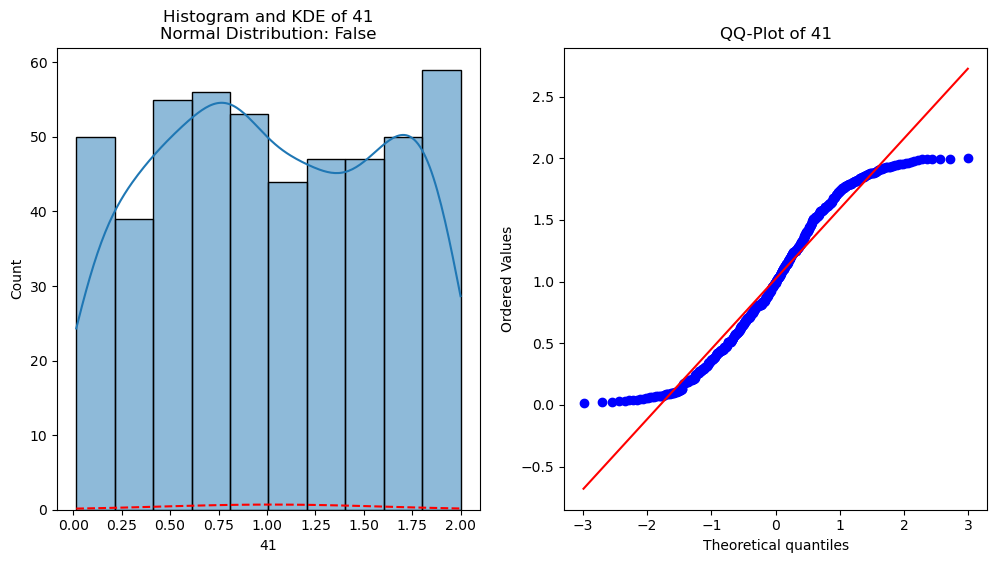

Feature: 42, KS Statistic: 0.0683, P-Value: 1.353e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


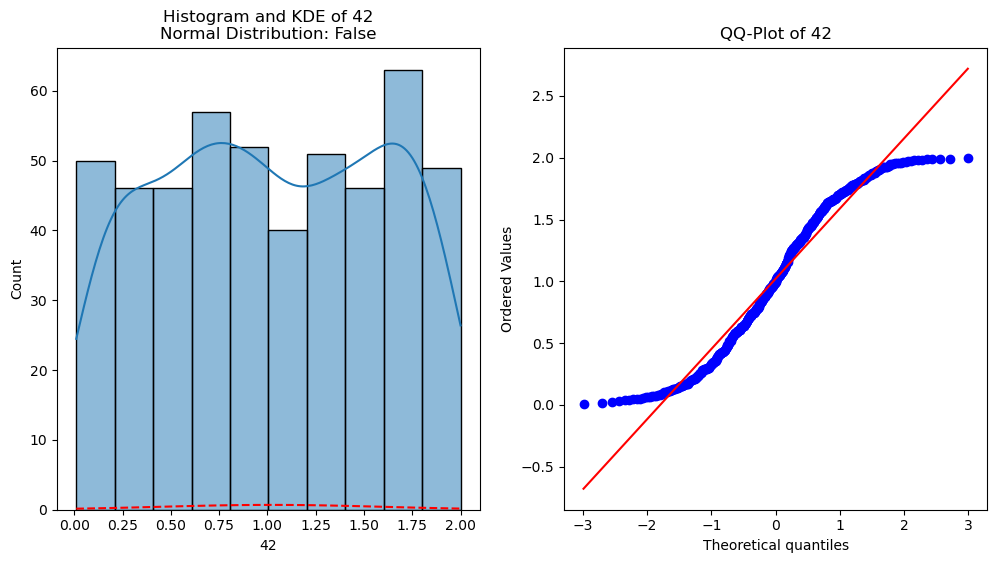

Feature: 43, KS Statistic: 0.0820, P-Value: 1.614e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


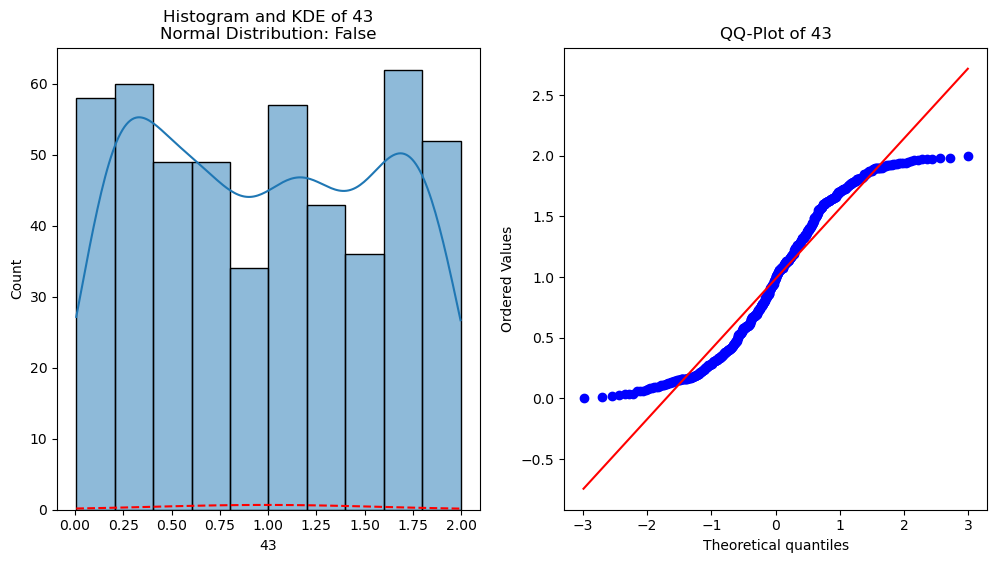

Feature: 44, KS Statistic: 0.0704, P-Value: 1.339e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


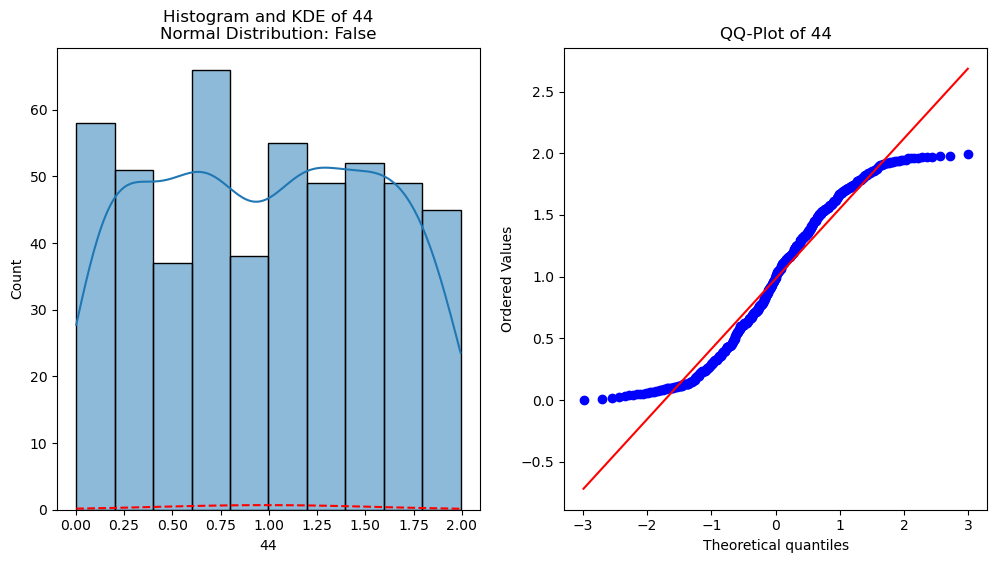

Feature: 45, KS Statistic: 0.0422, P-Value: 2.755e-01, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


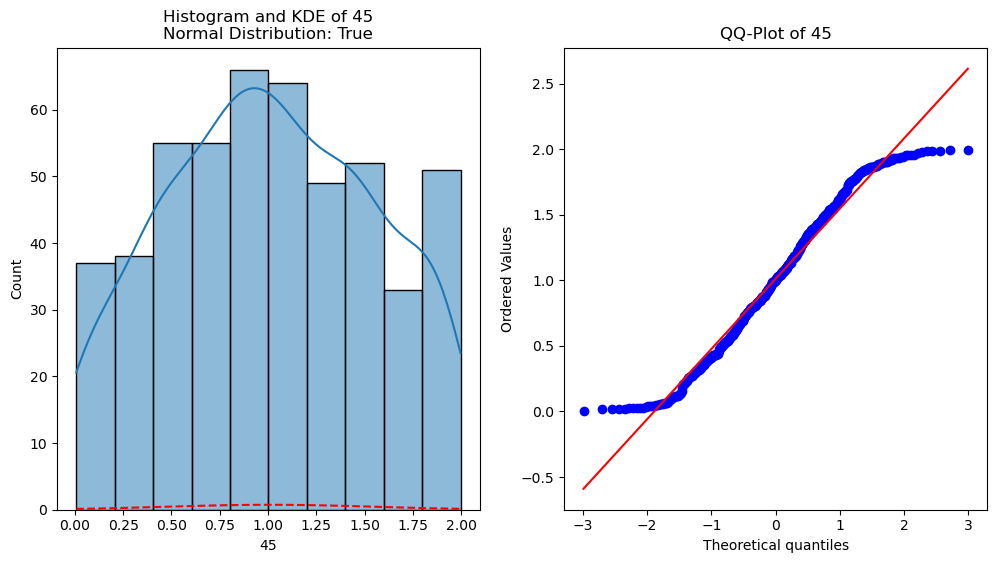

Feature: 46, KS Statistic: 0.0849, P-Value: 9.875e-04, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


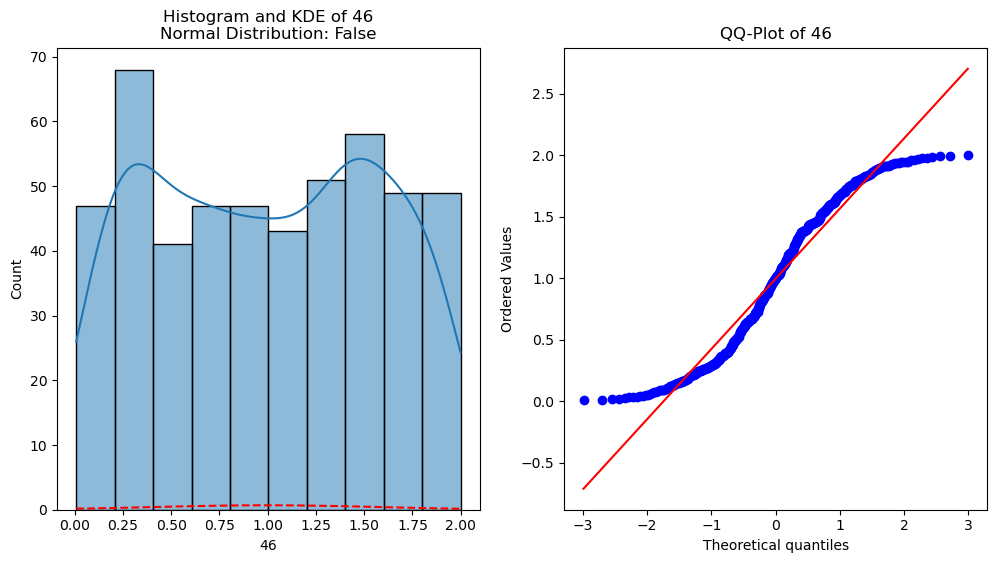

Feature: 47, KS Statistic: 0.0621, P-Value: 3.130e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


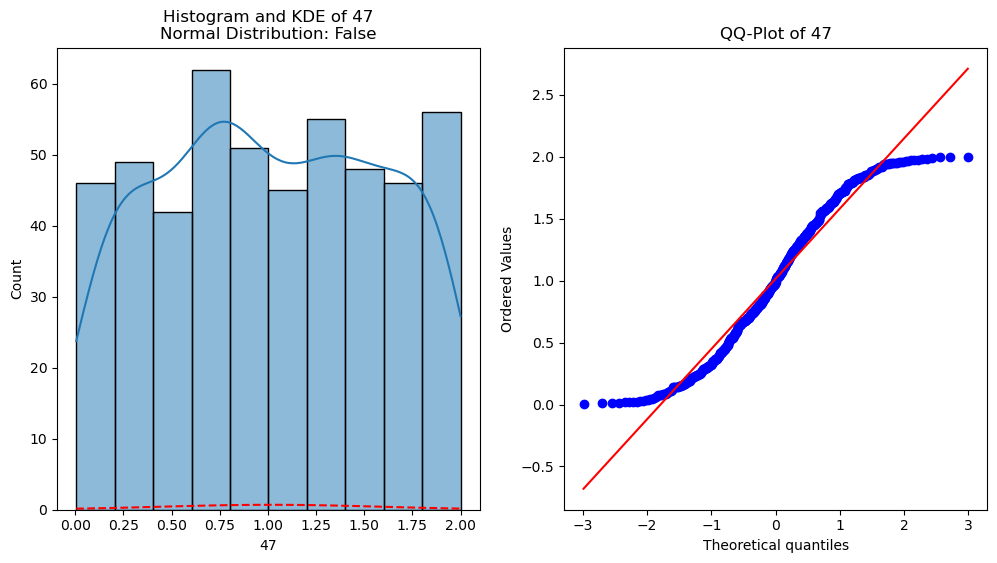

Feature: 48, KS Statistic: 0.0652, P-Value: 2.344e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


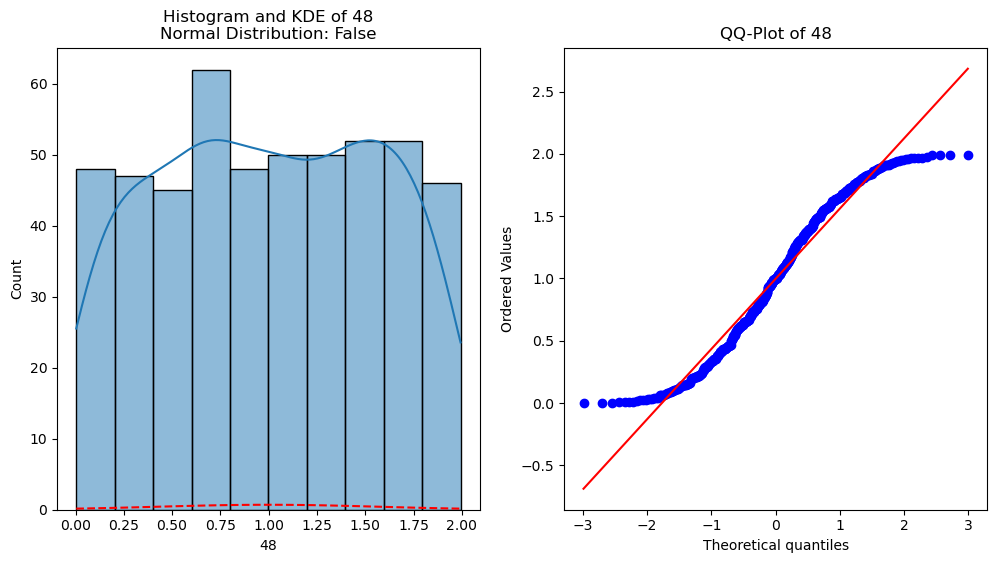

Feature: 49, KS Statistic: 0.0773, P-Value: 3.508e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


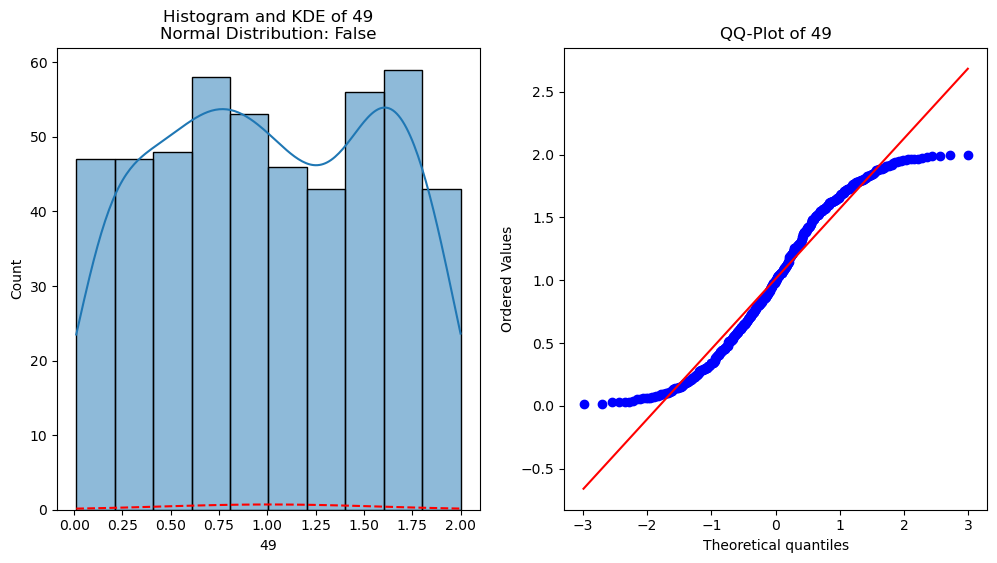

Feature: 50, KS Statistic: 0.0569, P-Value: 5.959e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


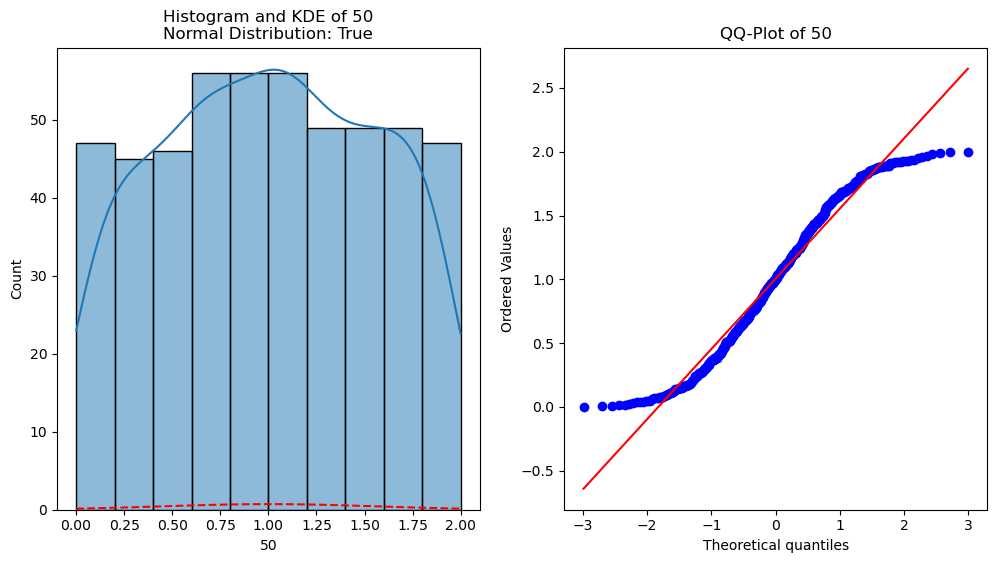

Feature: 51, KS Statistic: 0.0725, P-Value: 7.317e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


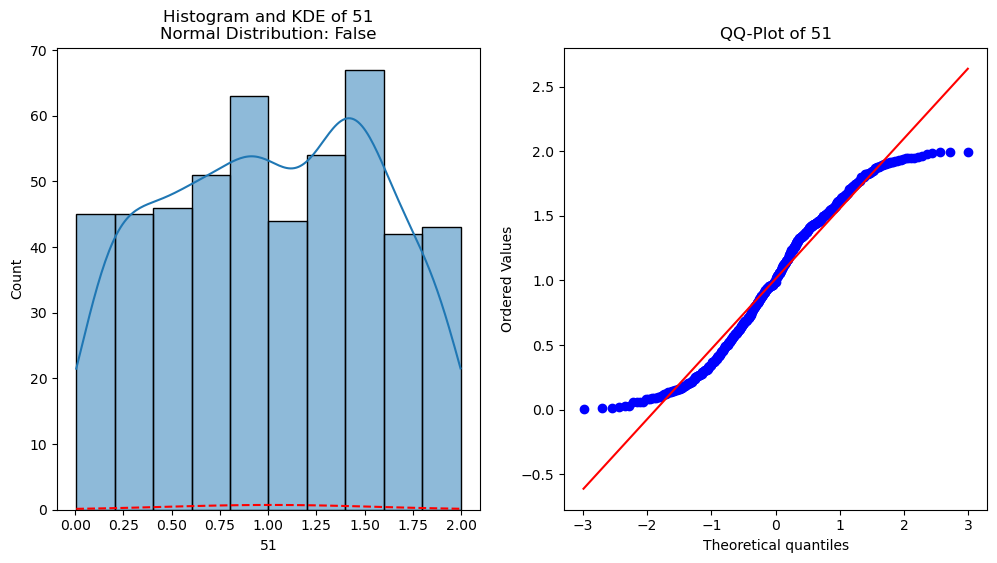

Feature: 52, KS Statistic: 0.0670, P-Value: 1.624e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


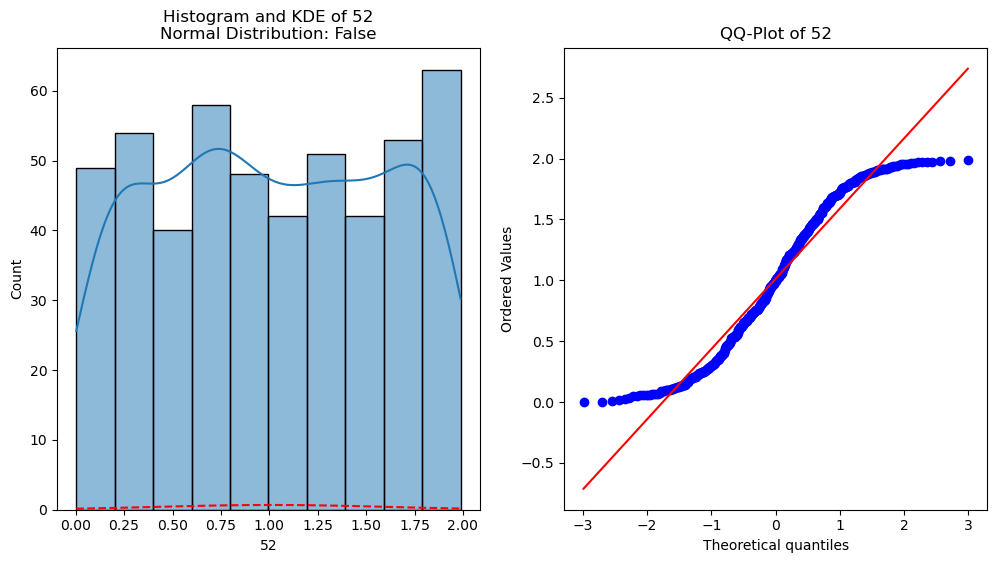

Feature: 53, KS Statistic: 0.0612, P-Value: 3.506e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


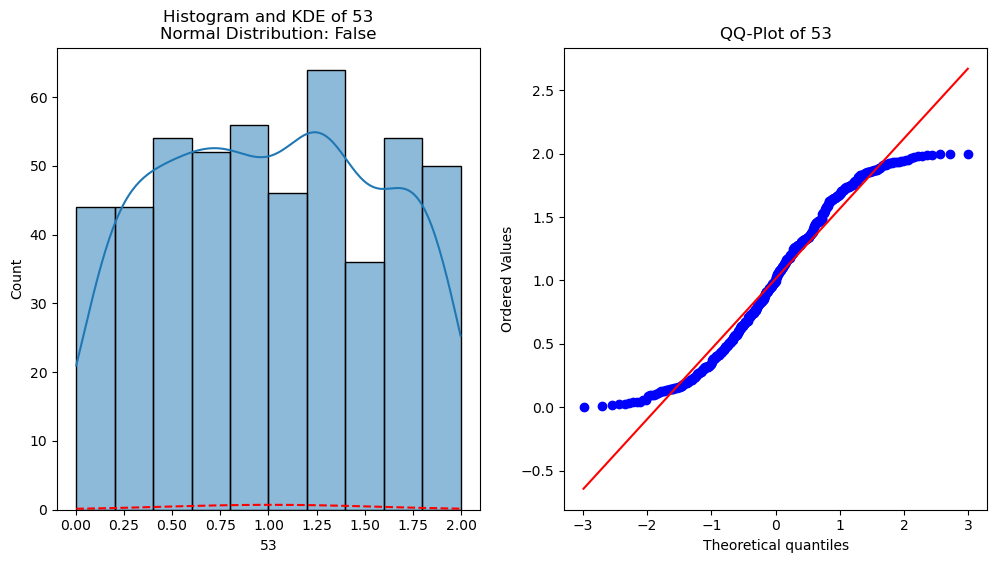

Feature: 54, KS Statistic: 0.0761, P-Value: 5.738e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


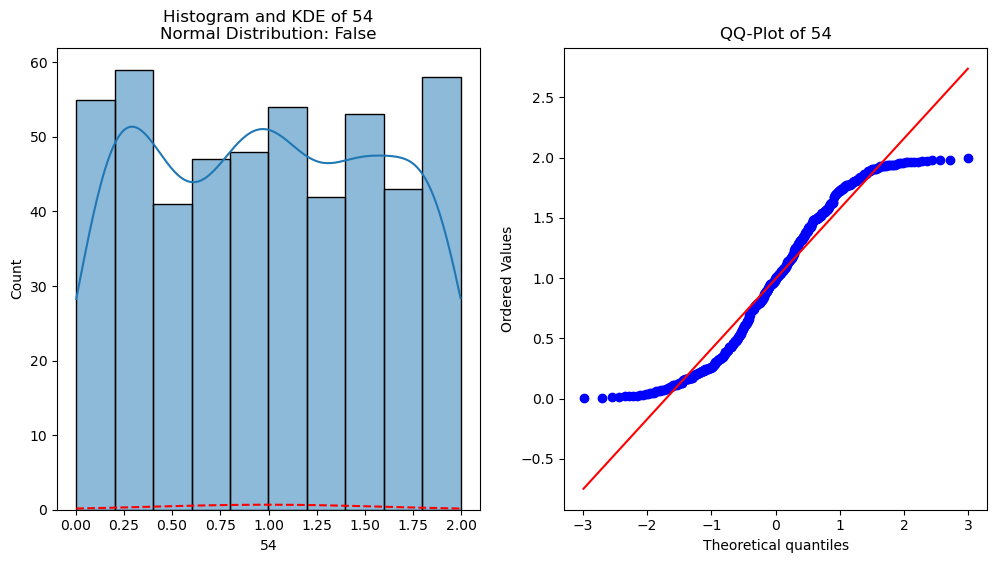

Feature: 55, KS Statistic: 0.0656, P-Value: 2.574e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


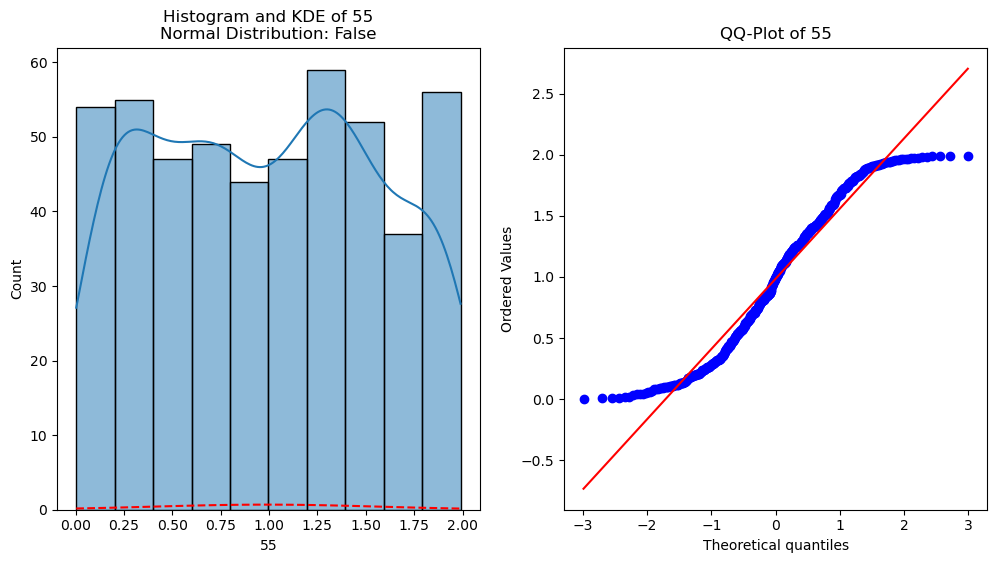

Feature: 56, KS Statistic: 0.0604, P-Value: 4.968e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


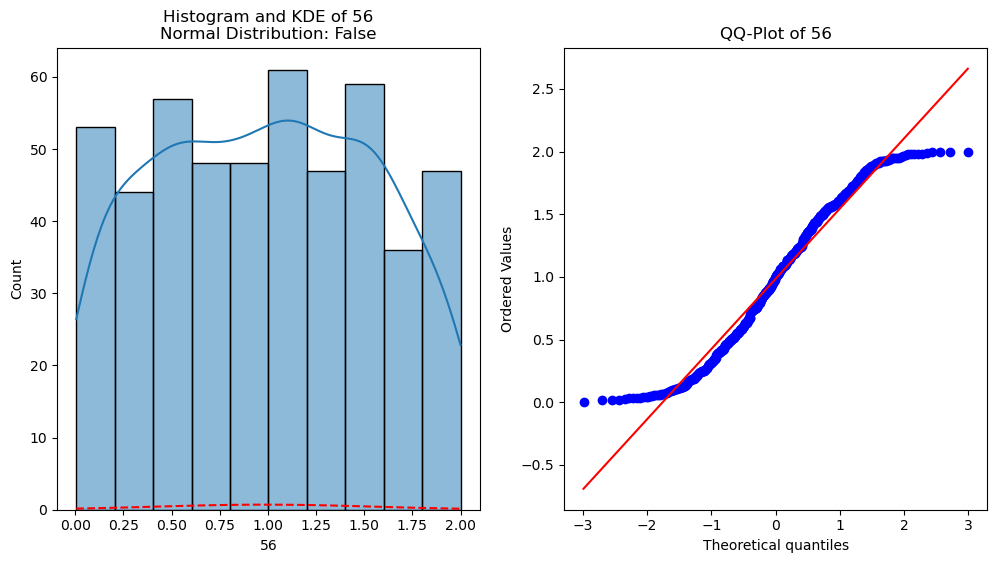

Feature: 57, KS Statistic: 0.0742, P-Value: 7.731e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


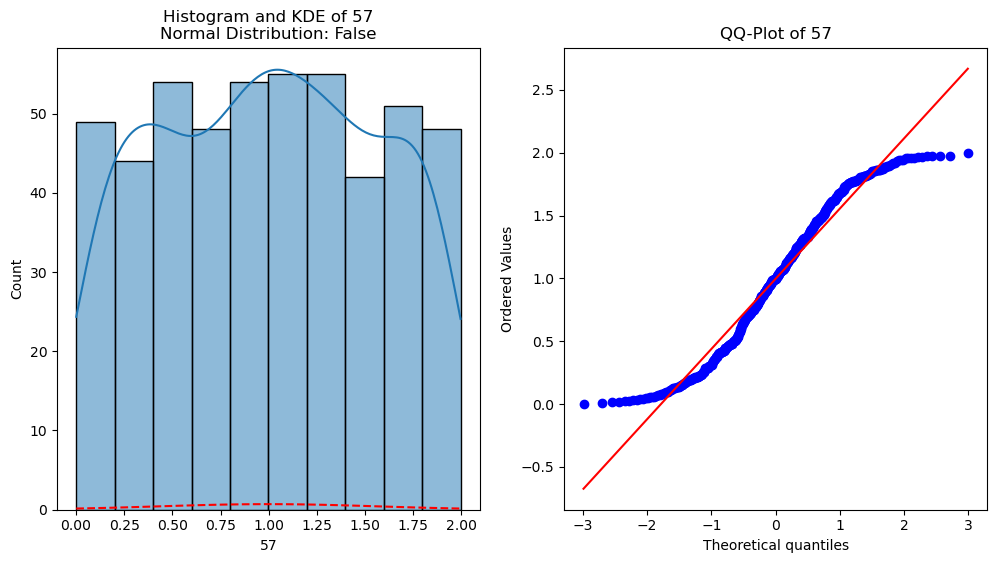

Feature: 58, KS Statistic: 0.0762, P-Value: 5.704e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


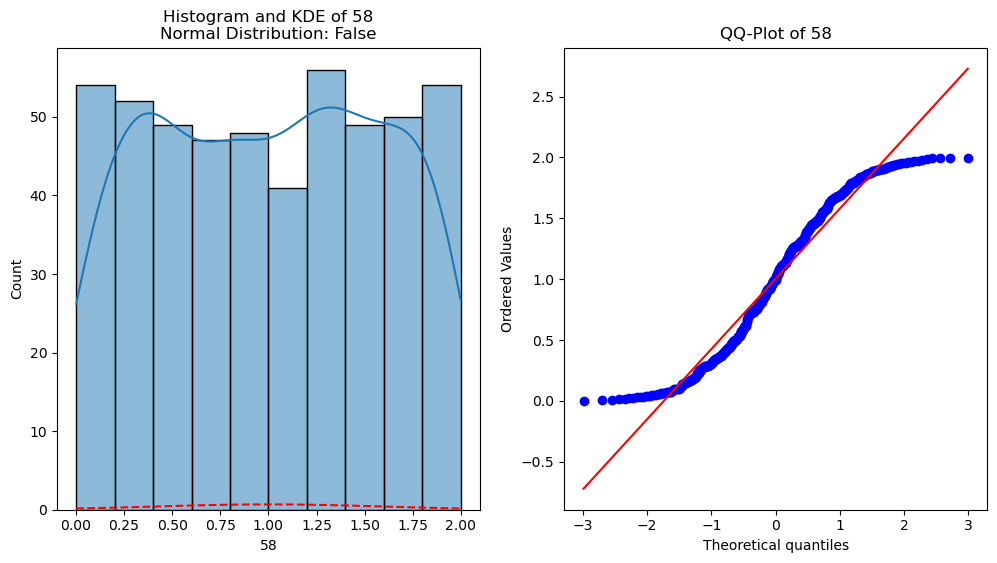

Feature: 59, KS Statistic: 0.0820, P-Value: 1.612e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


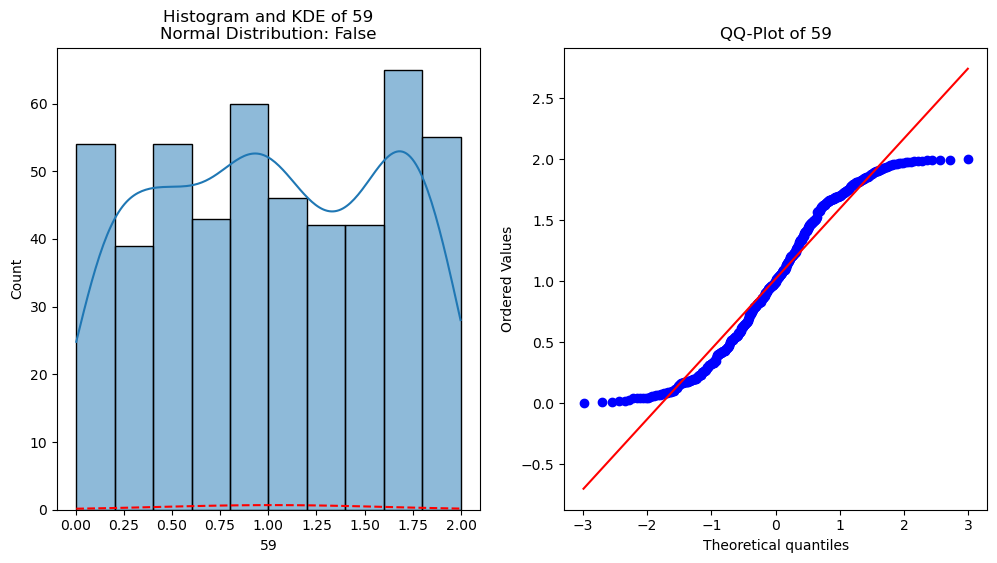

Feature: 60, KS Statistic: 0.0643, P-Value: 2.366e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


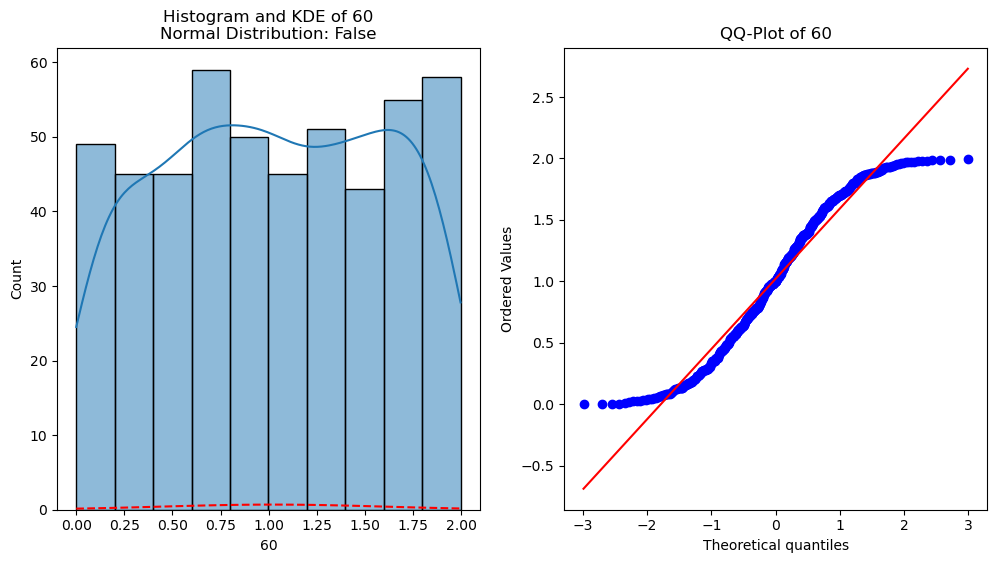

Feature: 61, KS Statistic: 0.0658, P-Value: 2.514e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


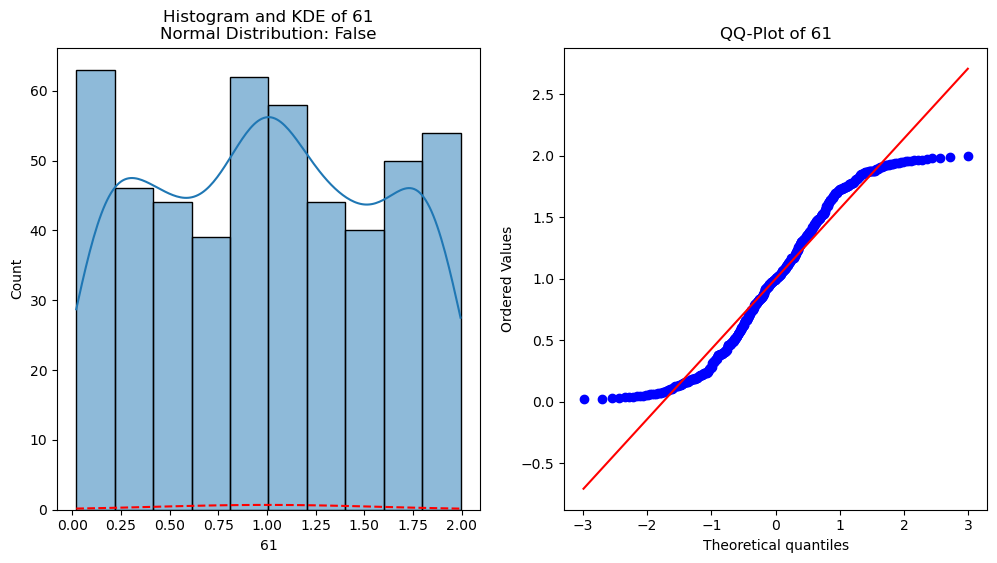

Feature: 62, KS Statistic: 0.0902, P-Value: 5.489e-04, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


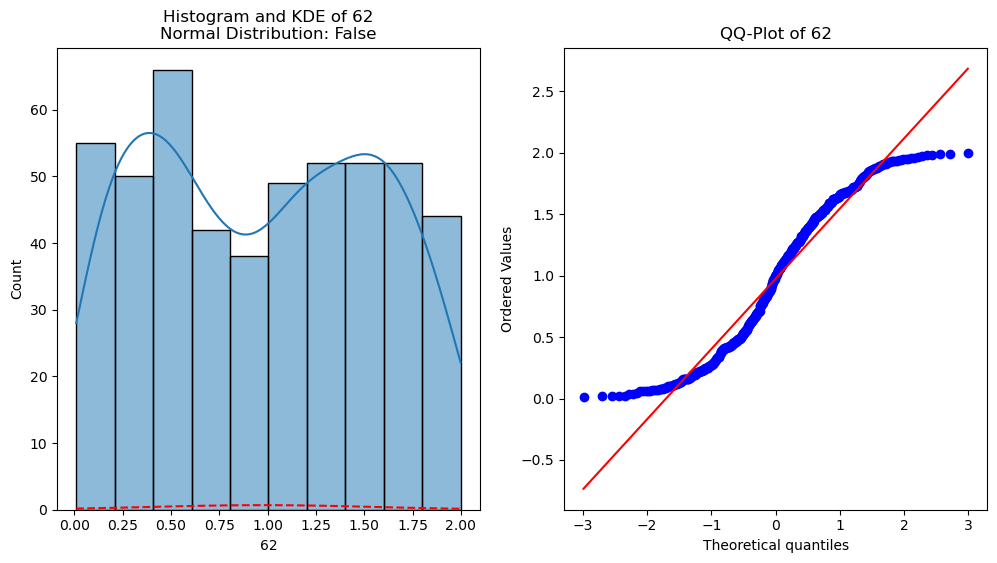

Feature: 63, KS Statistic: 0.0639, P-Value: 3.243e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


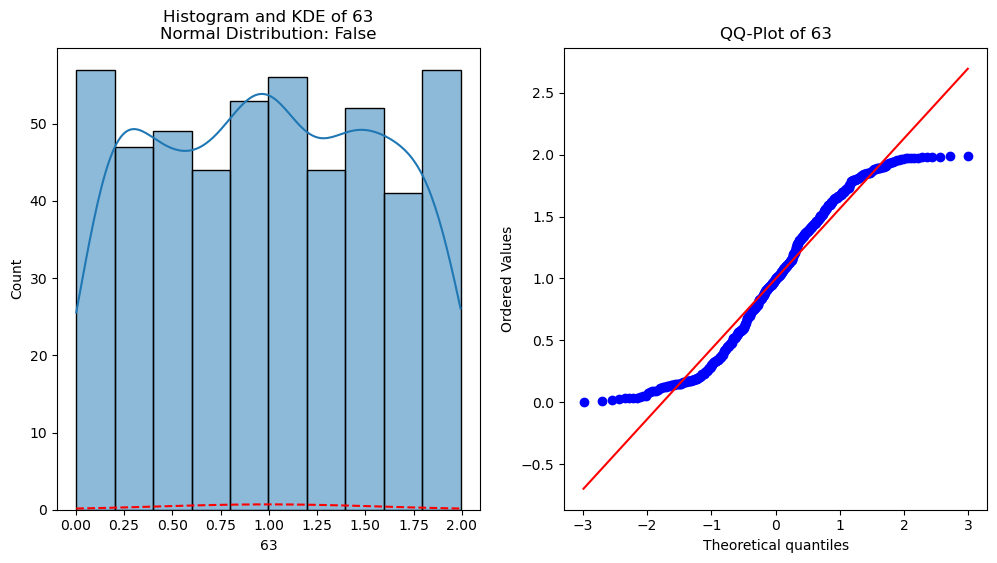

Feature: 64, KS Statistic: 0.0759, P-Value: 4.372e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


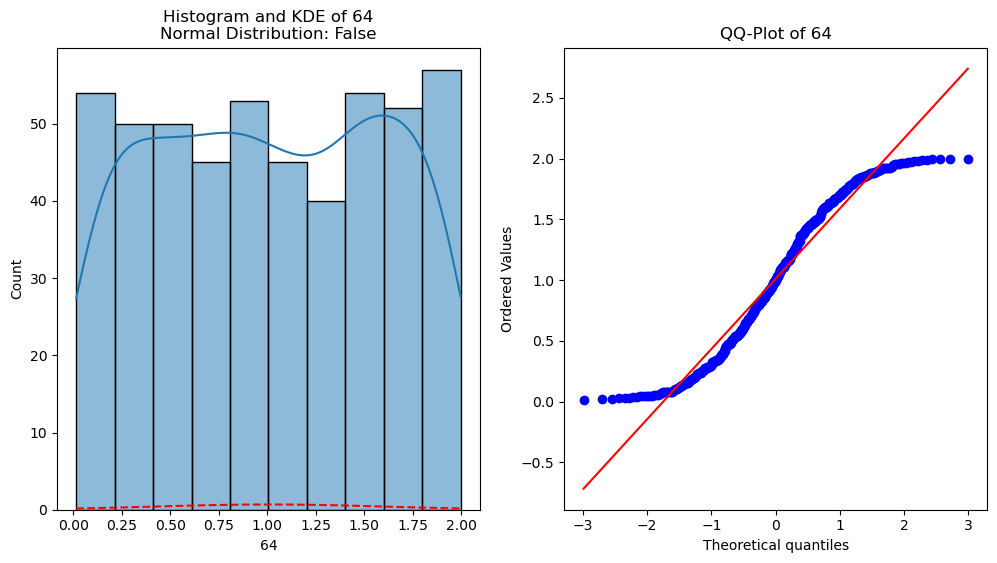

Feature: 65, KS Statistic: 0.0764, P-Value: 5.497e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


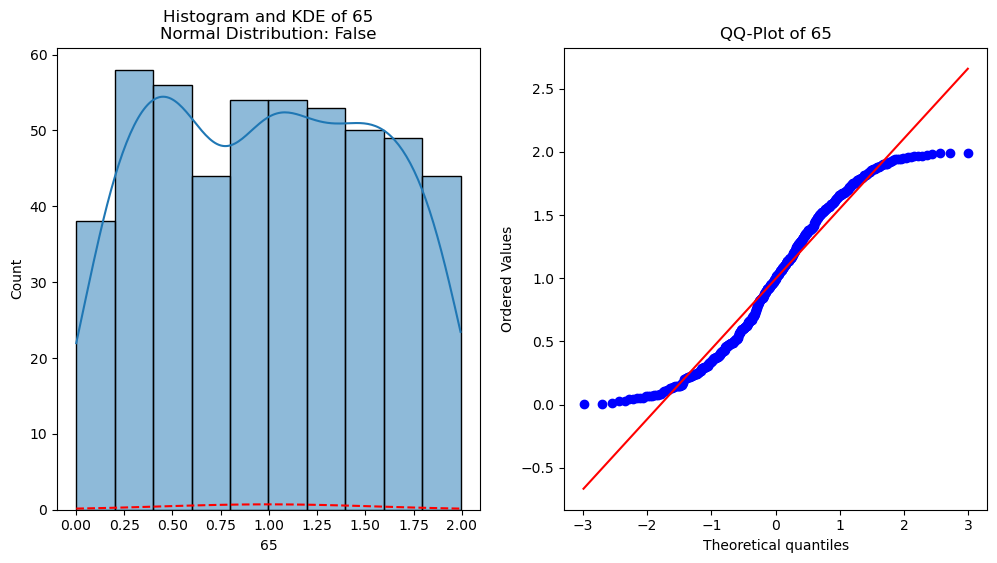

Feature: 66, KS Statistic: 0.0735, P-Value: 6.326e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


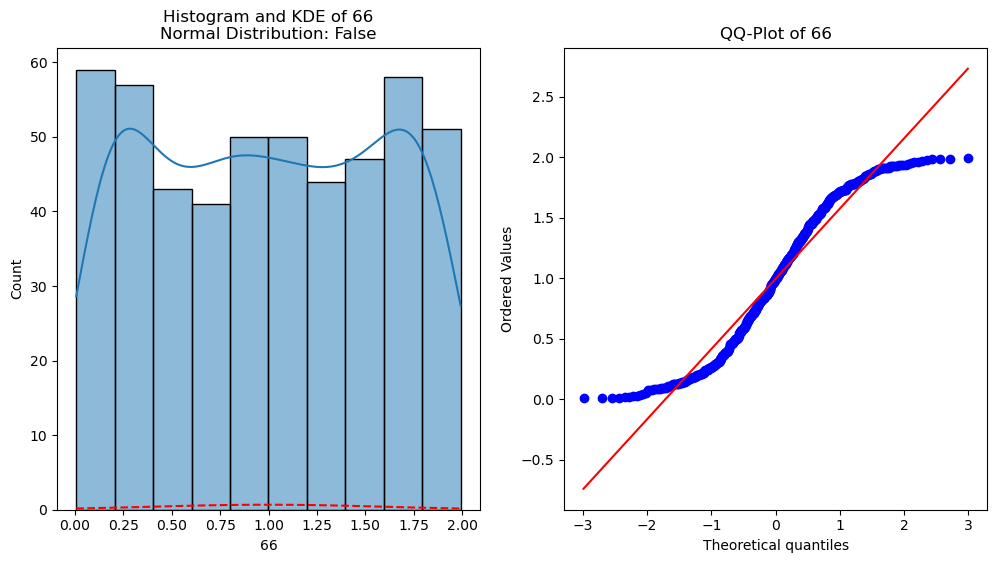

Feature: 67, KS Statistic: 0.0661, P-Value: 2.422e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


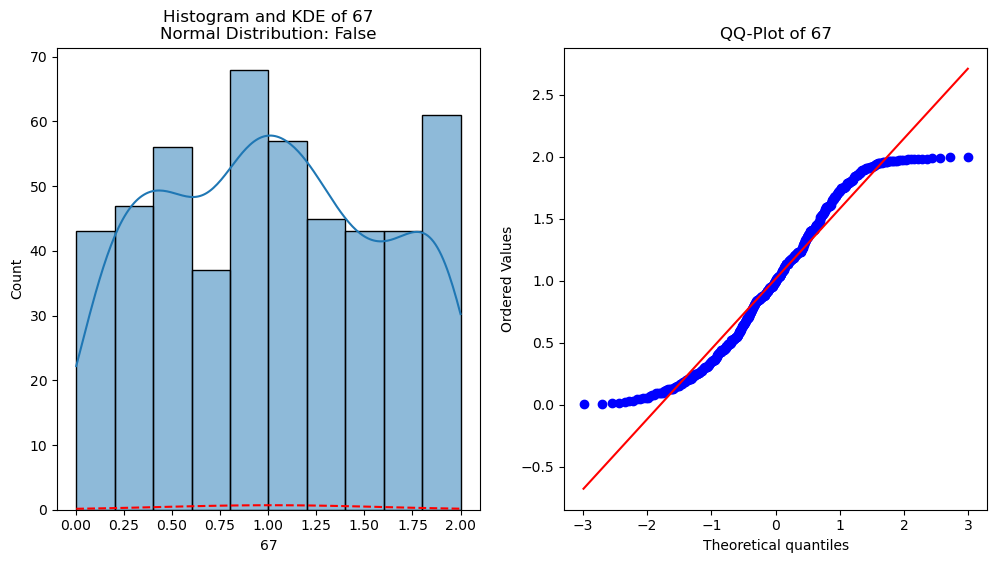

Feature: 68, KS Statistic: 0.0722, P-Value: 1.028e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


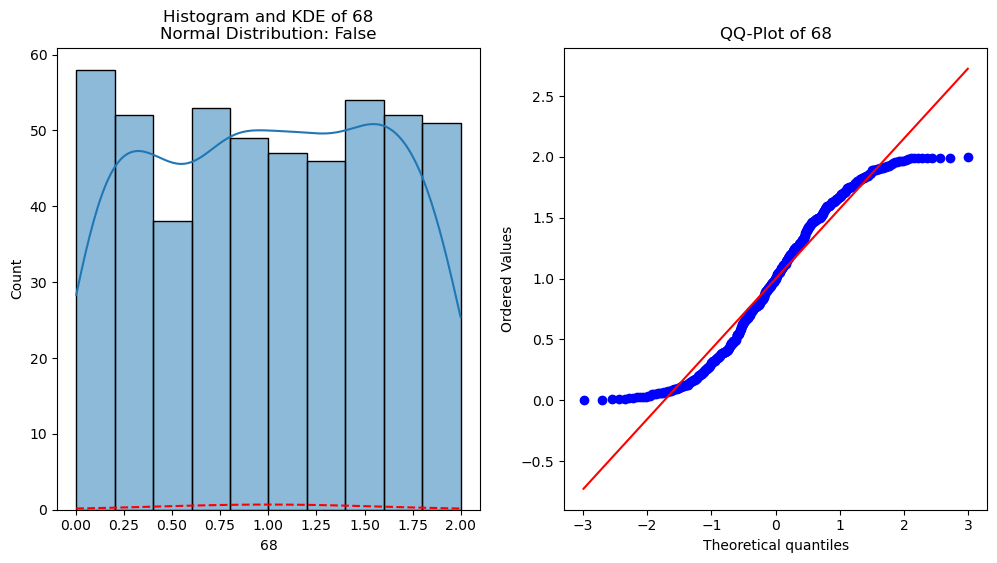

Feature: 69, KS Statistic: 0.0854, P-Value: 8.943e-04, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


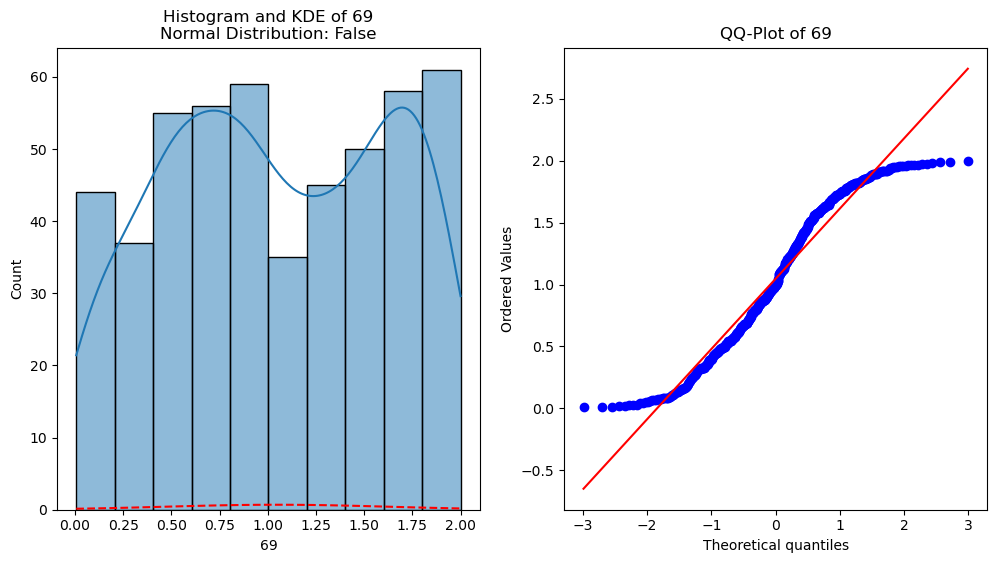

Feature: 70, KS Statistic: 0.0680, P-Value: 1.424e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


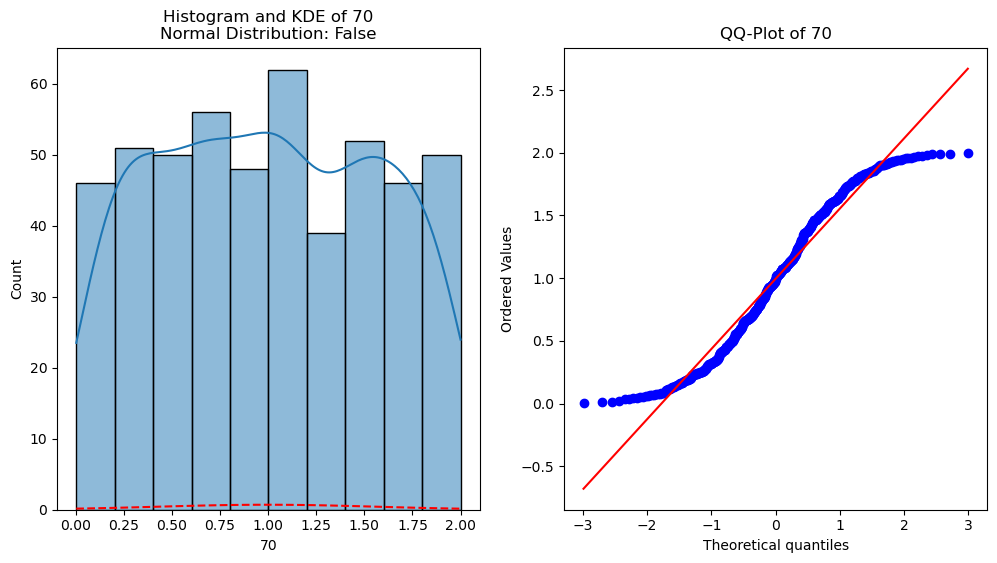

Feature: 71, KS Statistic: 0.0753, P-Value: 4.815e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


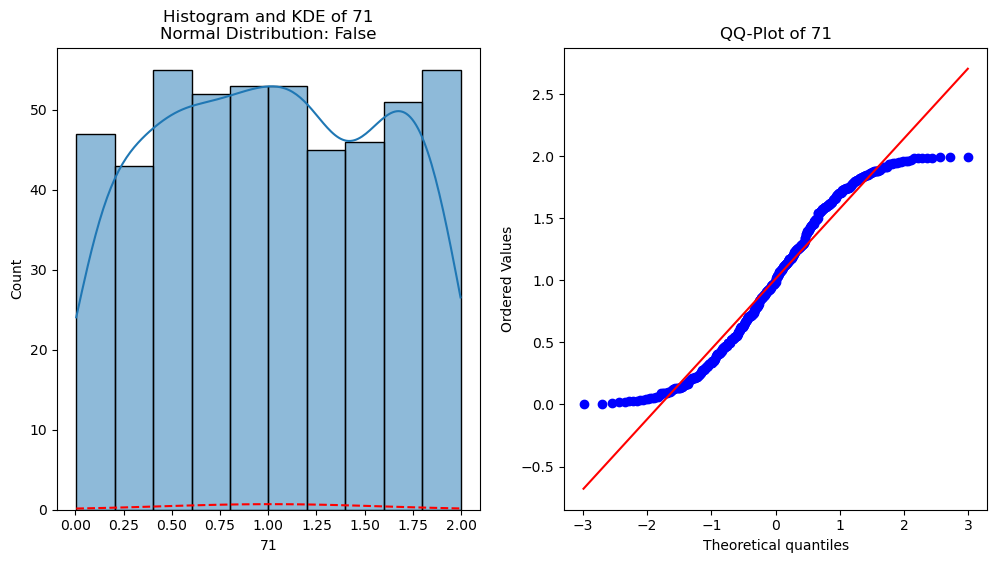

Feature: 72, KS Statistic: 0.0700, P-Value: 1.060e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


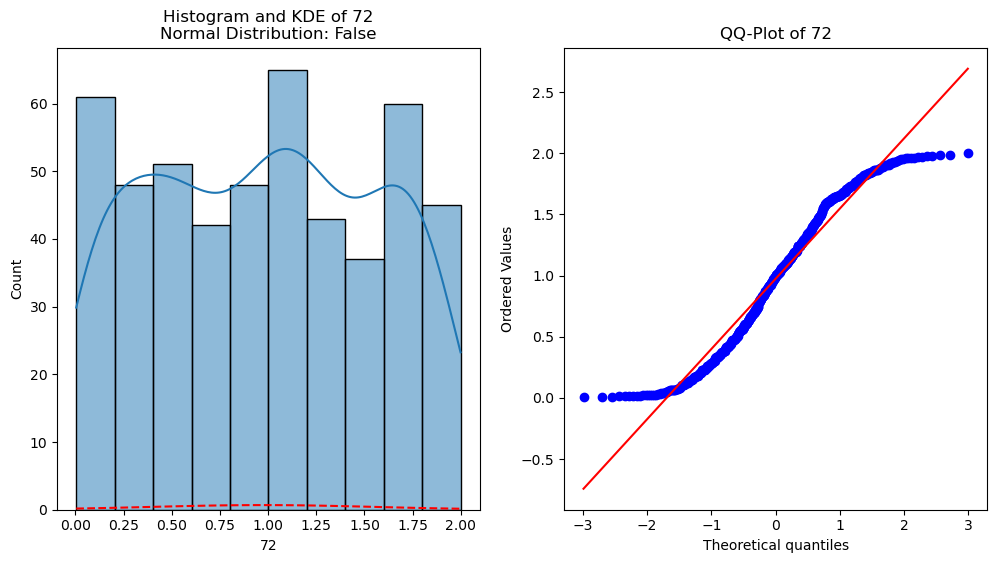

Feature: 73, KS Statistic: 0.0683, P-Value: 1.406e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


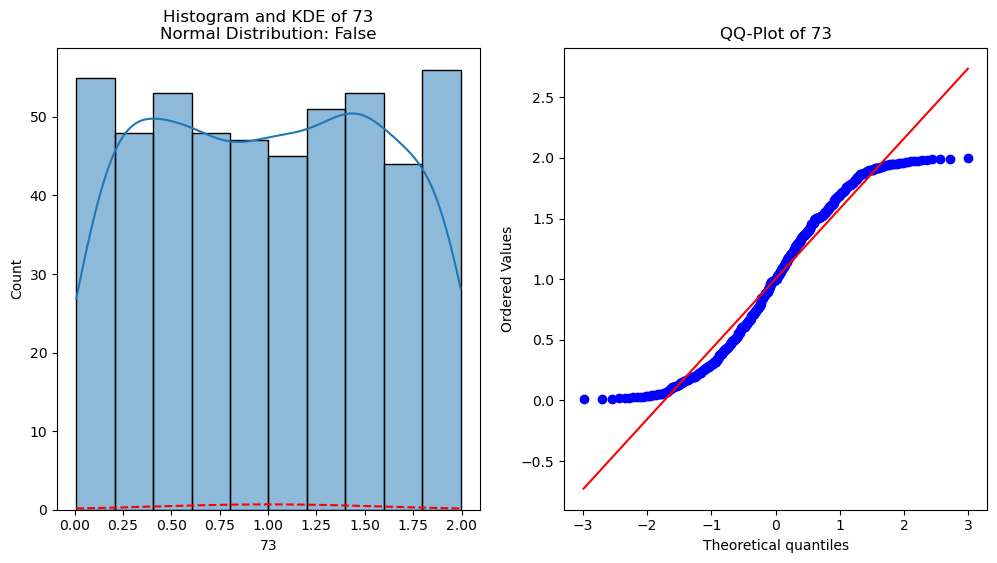

Feature: 74, KS Statistic: 0.0651, P-Value: 2.116e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


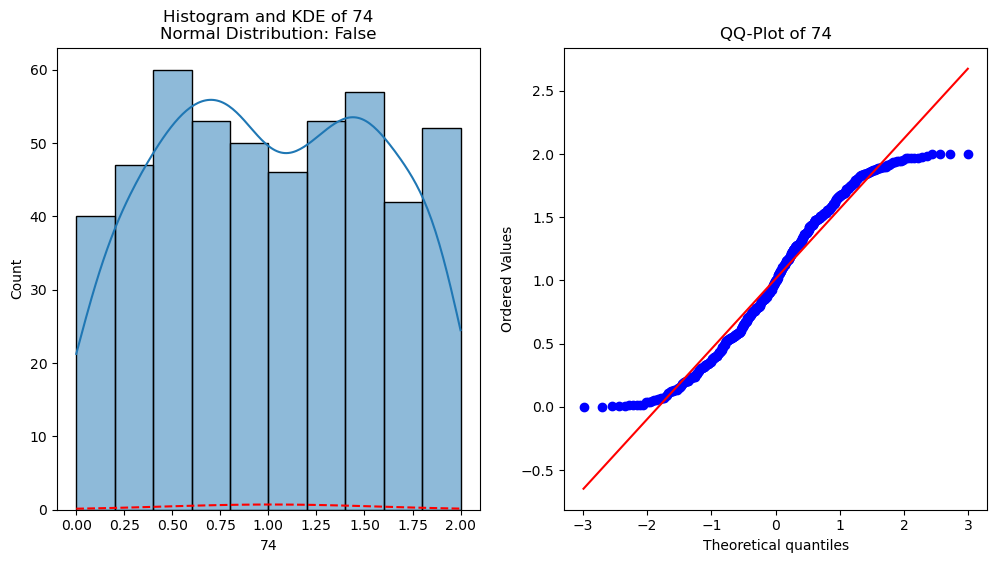

Feature: 75, KS Statistic: 0.0838, P-Value: 1.179e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


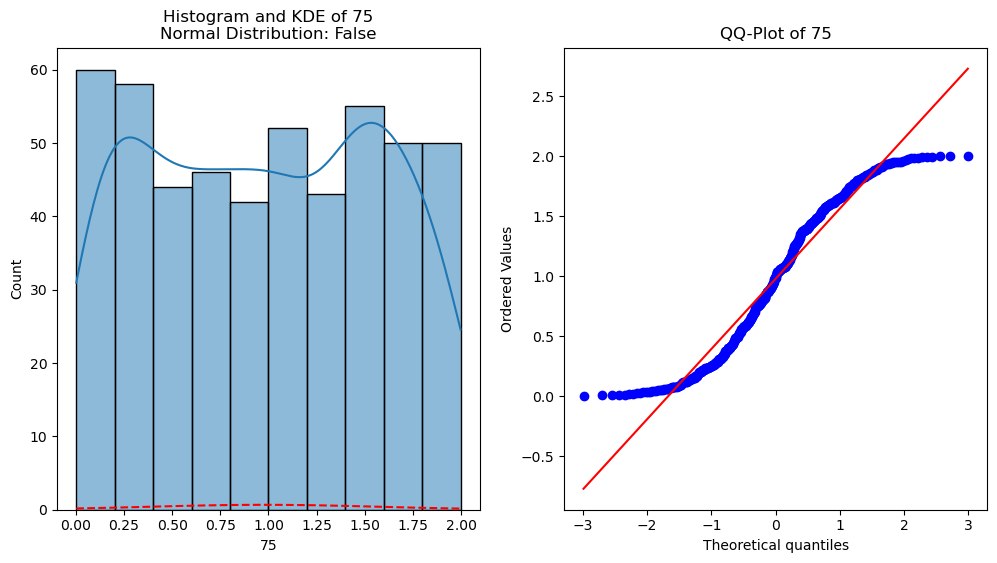

Feature: 76, KS Statistic: 0.0733, P-Value: 8.789e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


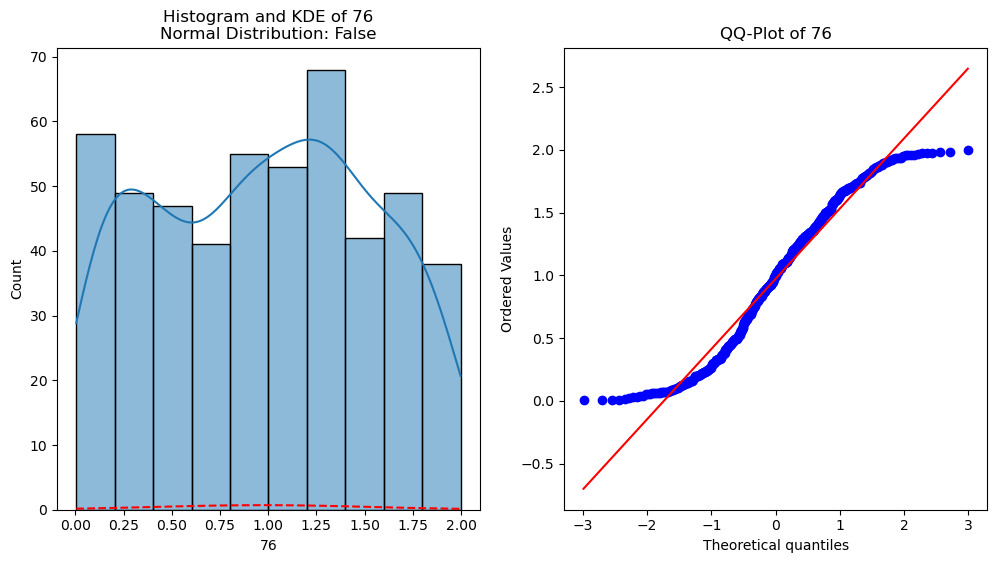

Feature: 77, KS Statistic: 0.0771, P-Value: 3.640e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


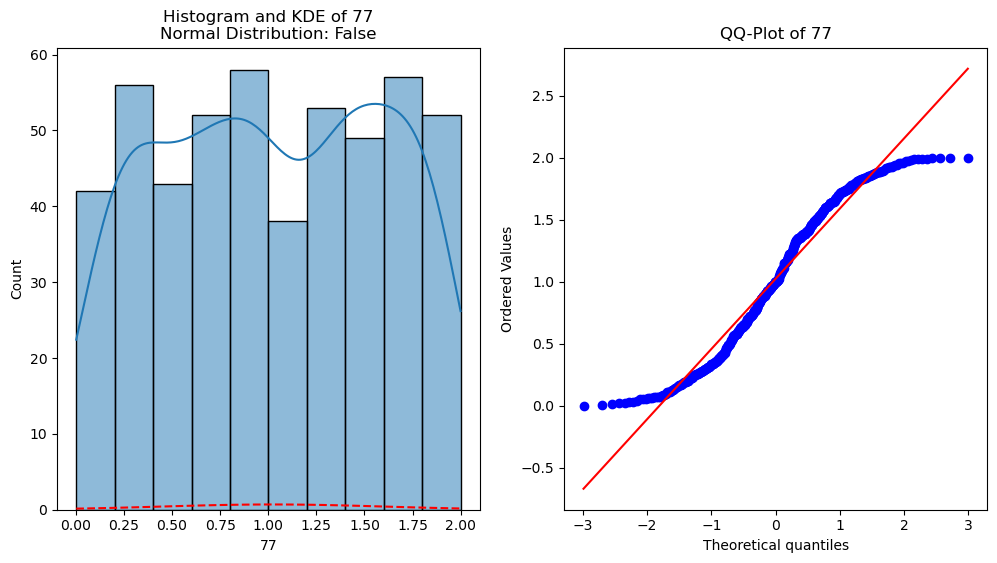

Feature: 78, KS Statistic: 0.0624, P-Value: 3.897e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


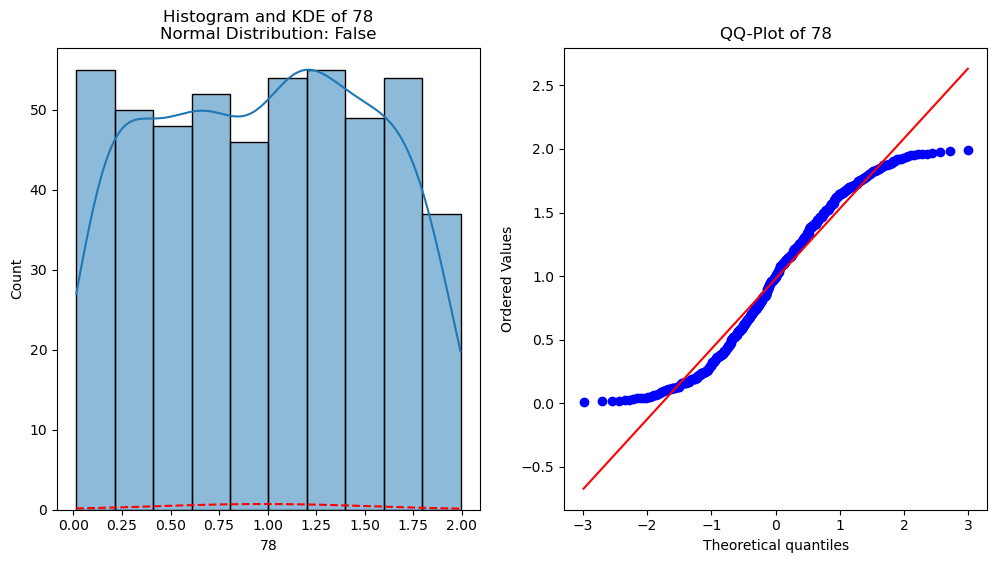

Feature: 79, KS Statistic: 0.0760, P-Value: 5.877e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


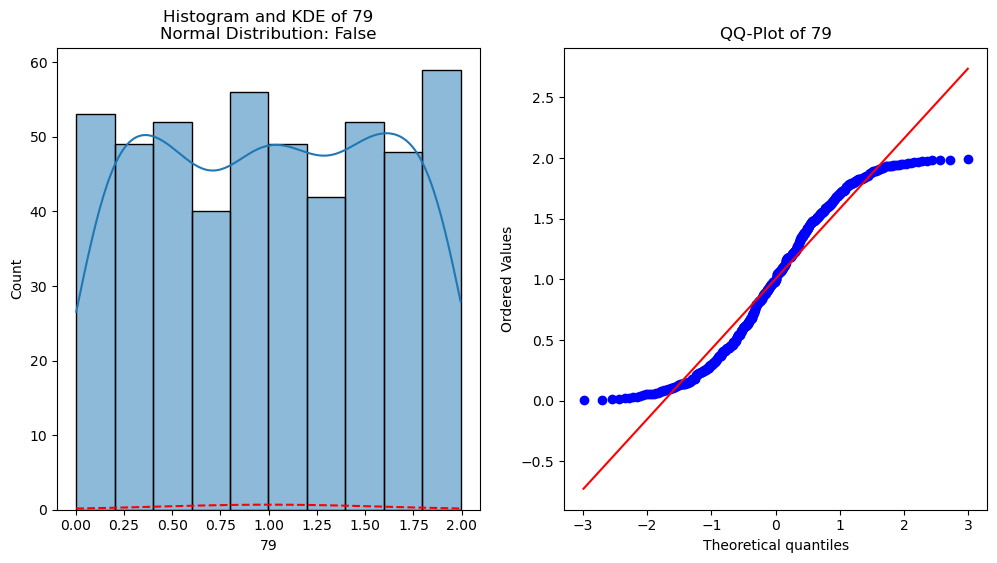

Feature: 80, KS Statistic: 0.0717, P-Value: 8.283e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


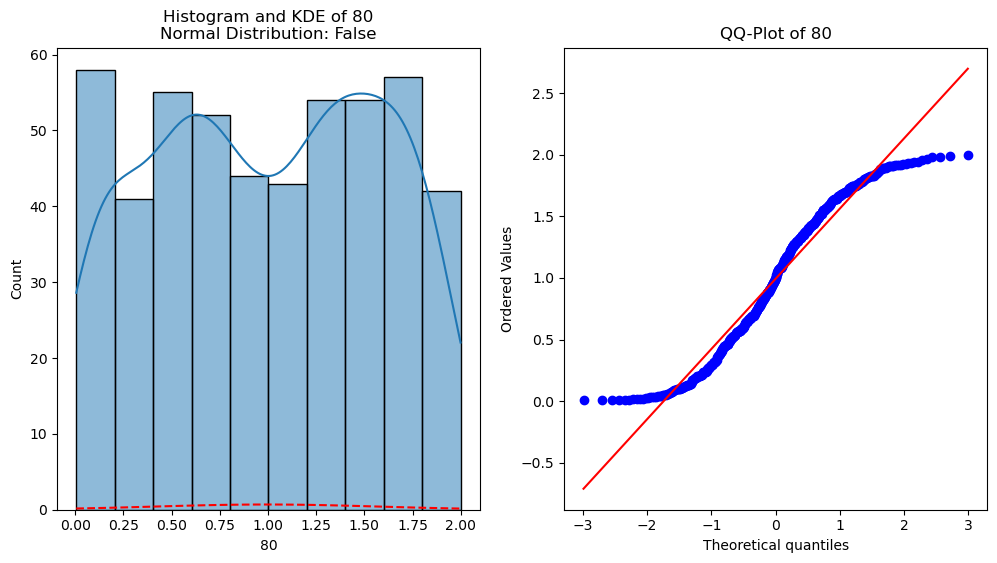

Feature: 81, KS Statistic: 0.0756, P-Value: 4.559e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


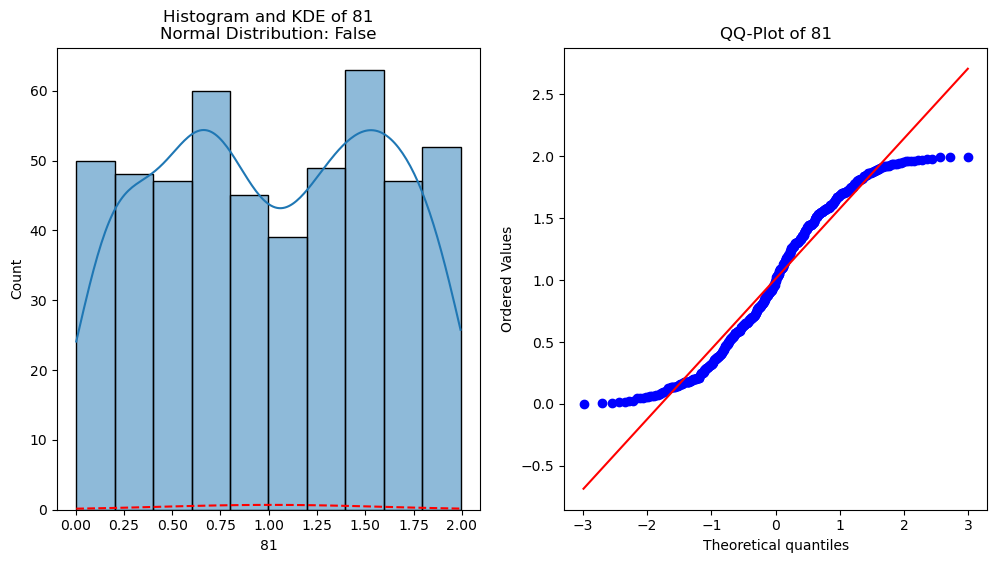

Feature: 82, KS Statistic: 0.0679, P-Value: 1.902e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


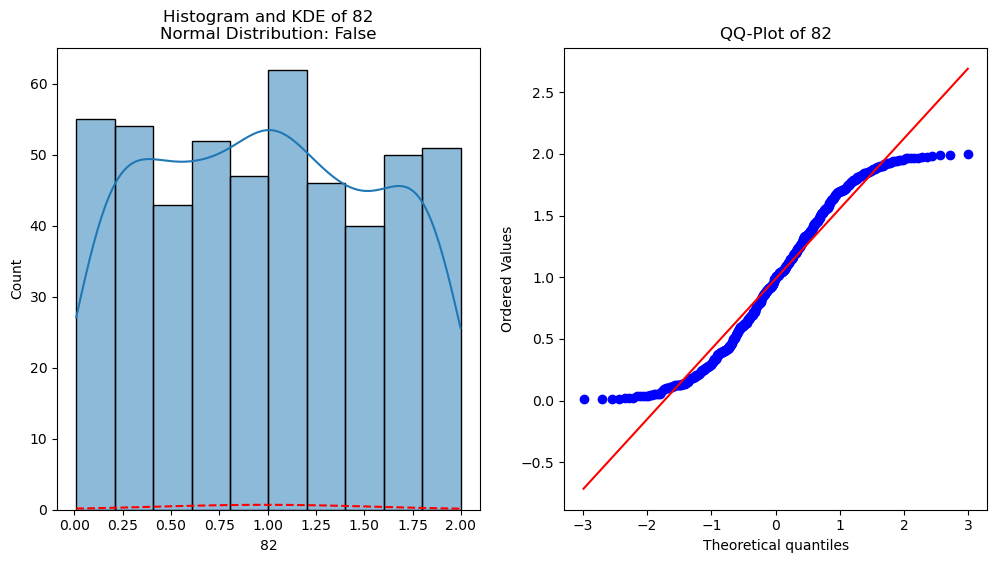

Feature: 83, KS Statistic: 0.0594, P-Value: 5.641e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


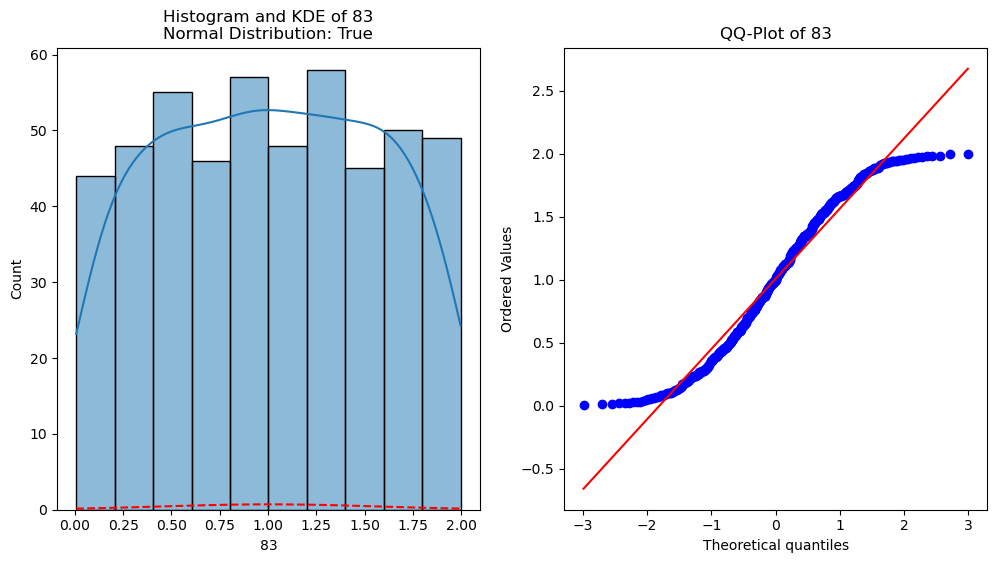

Feature: 84, KS Statistic: 0.0662, P-Value: 2.399e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


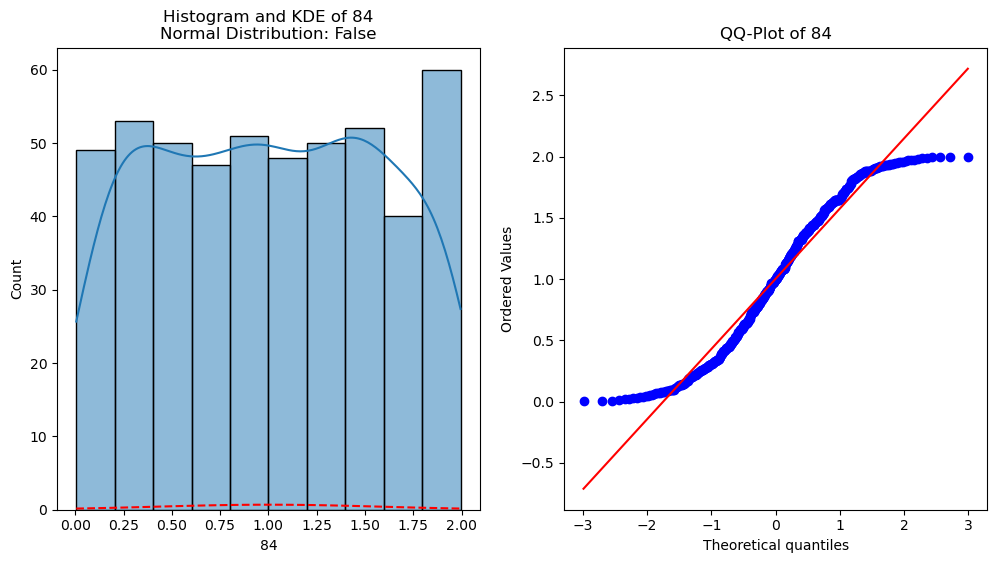

Feature: 85, KS Statistic: 0.0804, P-Value: 2.951e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


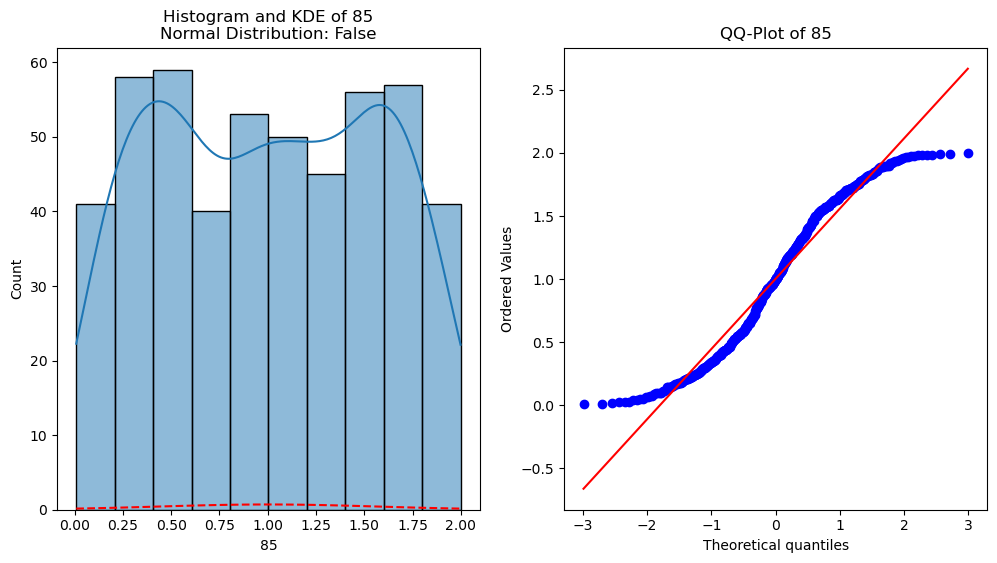

Feature: 86, KS Statistic: 0.0556, P-Value: 6.943e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


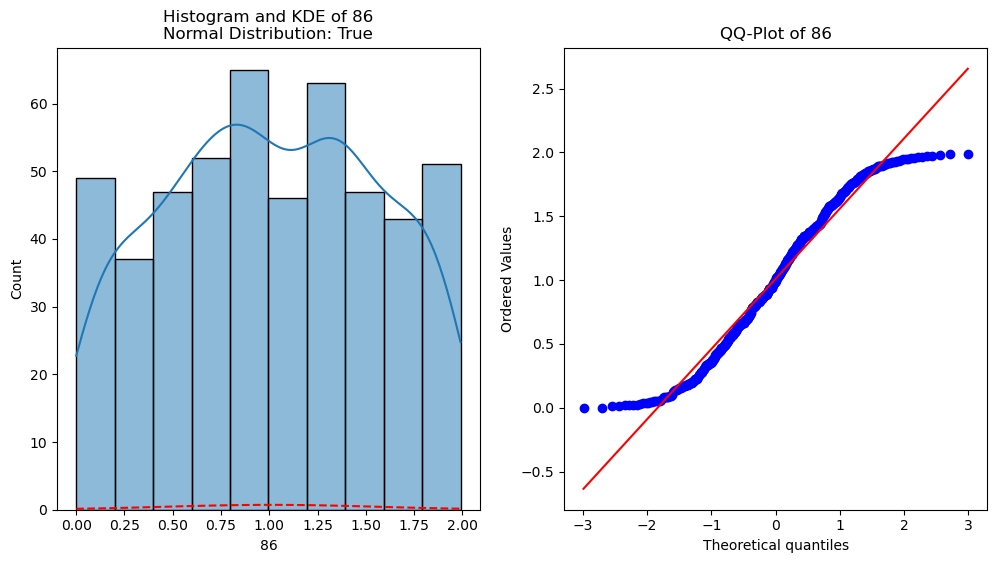

Feature: 87, KS Statistic: 0.0702, P-Value: 1.379e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


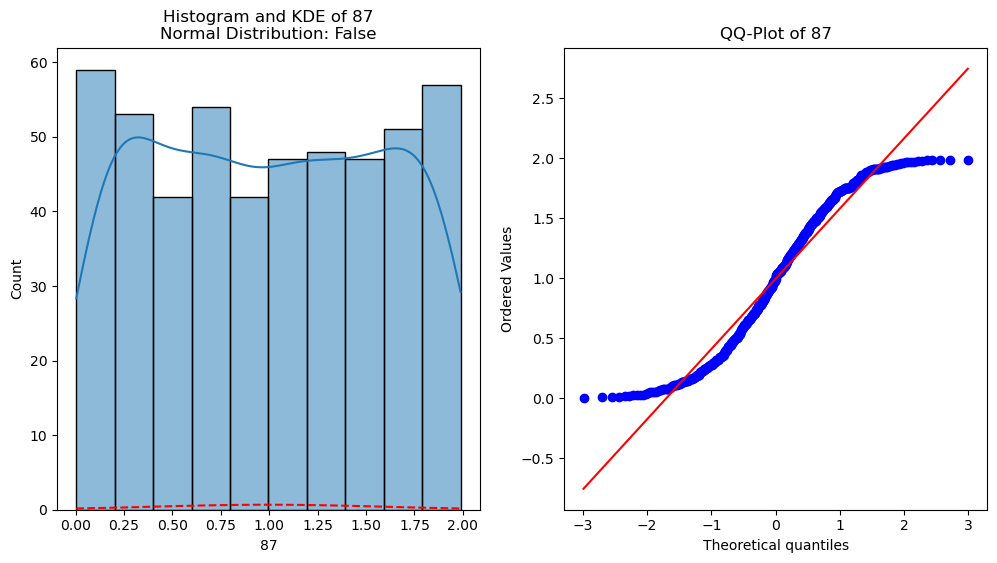

Feature: 88, KS Statistic: 0.0753, P-Value: 4.766e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


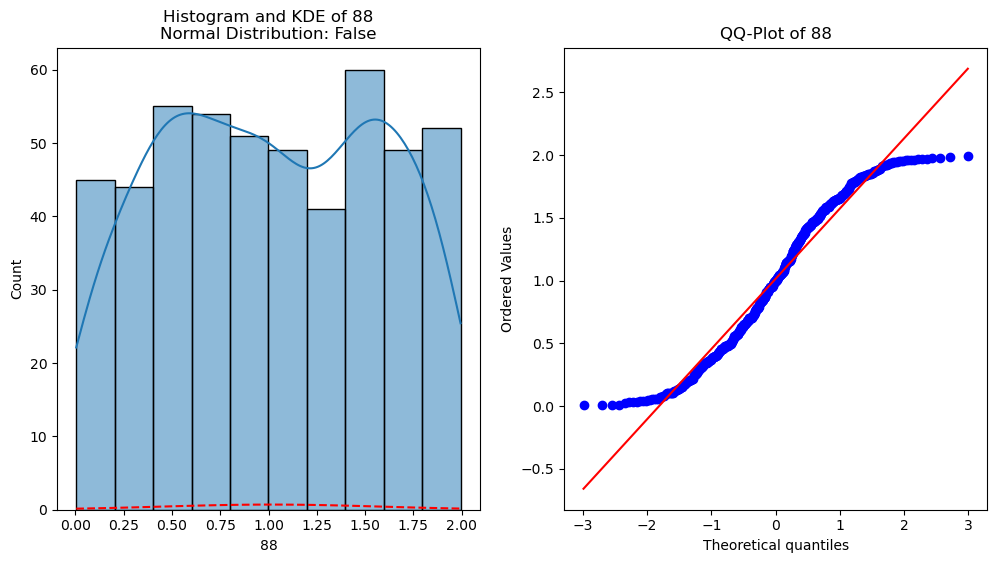

Feature: 89, KS Statistic: 0.0652, P-Value: 2.724e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


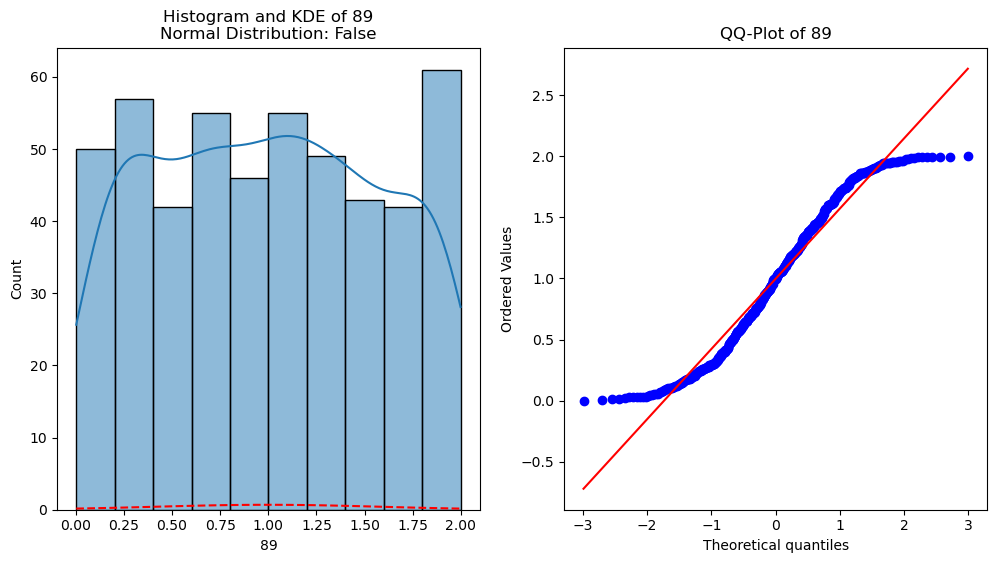

Feature: 90, KS Statistic: 0.0652, P-Value: 2.716e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


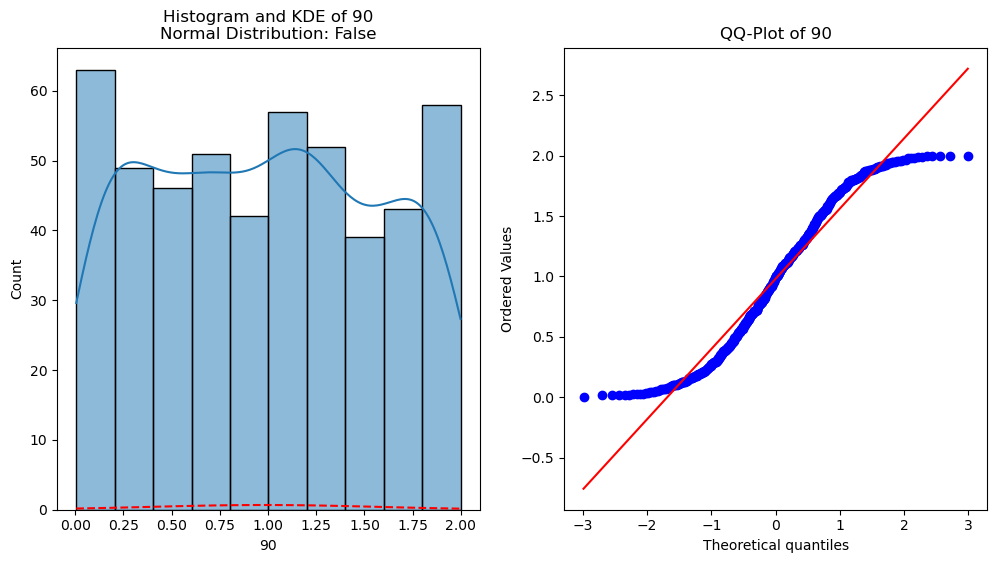

Feature: 91, KS Statistic: 0.0695, P-Value: 1.148e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


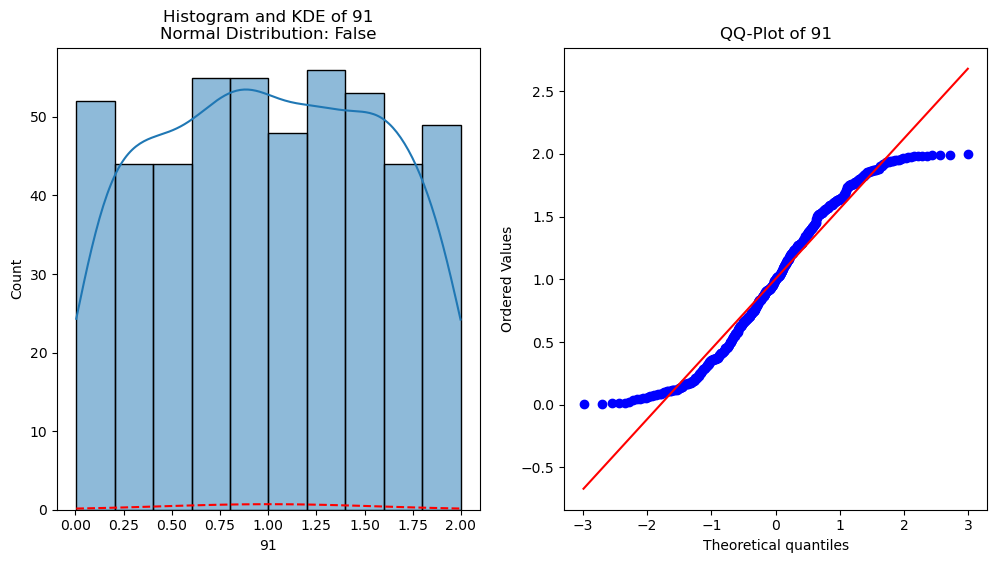

Feature: 92, KS Statistic: 0.0570, P-Value: 7.434e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


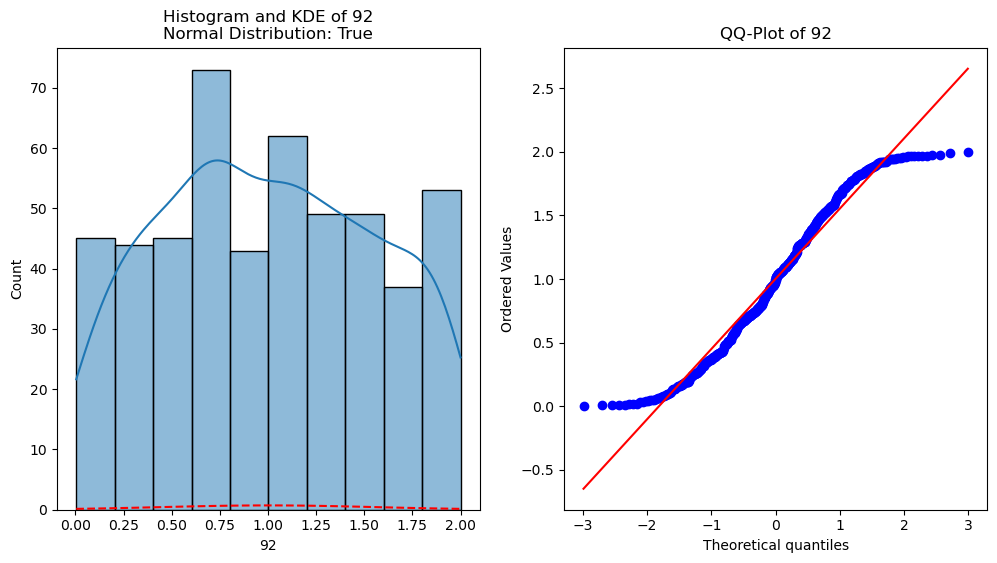

Feature: 93, KS Statistic: 0.0748, P-Value: 7.079e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


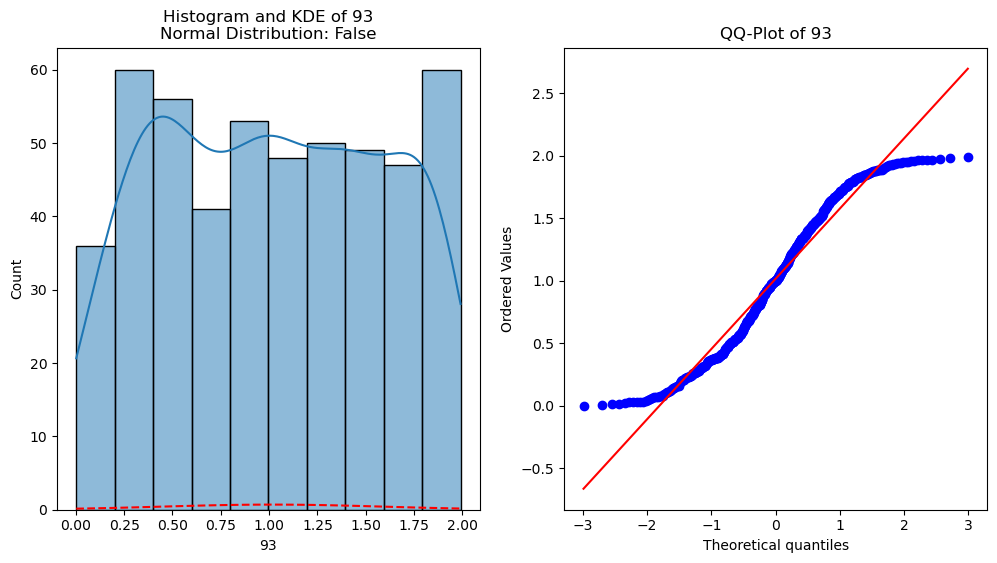

Feature: 94, KS Statistic: 0.0720, P-Value: 7.975e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


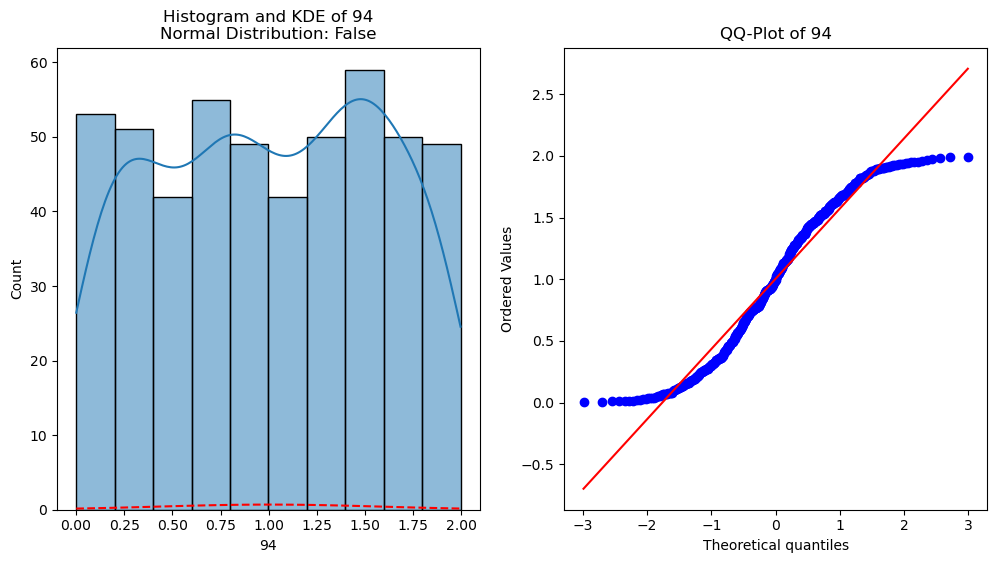

Feature: 95, KS Statistic: 0.0741, P-Value: 5.735e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


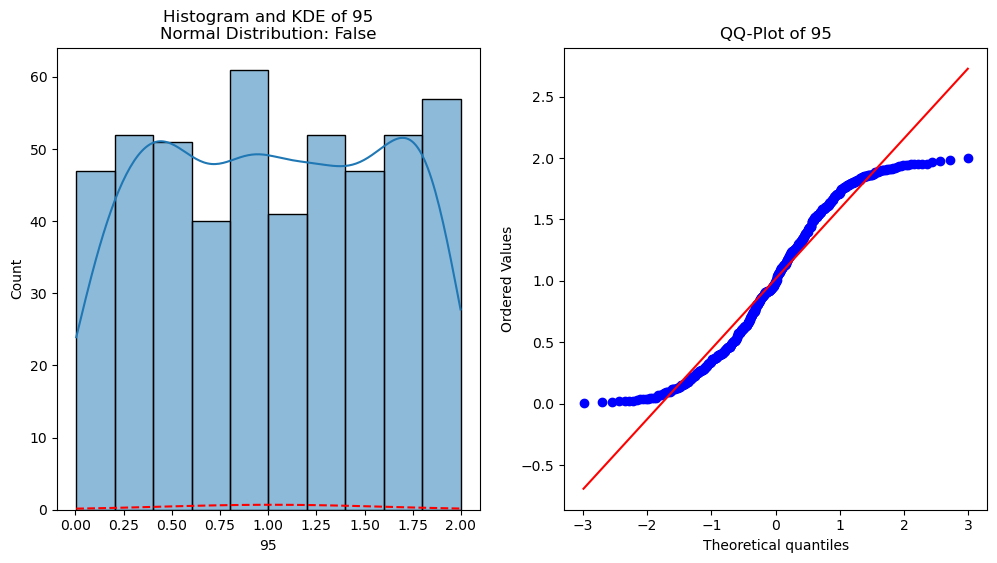

Feature: 96, KS Statistic: 0.0606, P-Value: 3.900e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


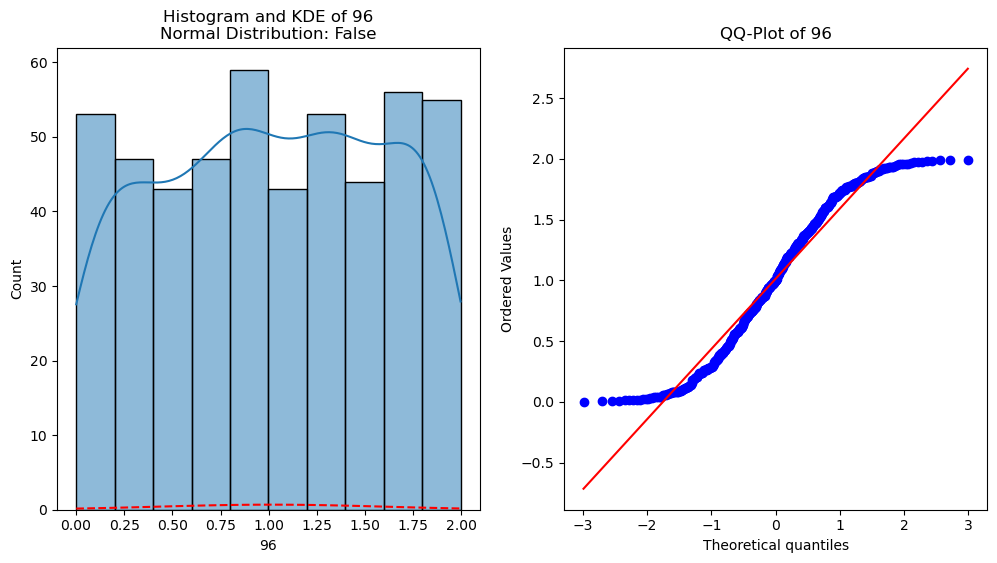

Feature: 97, KS Statistic: 0.0698, P-Value: 1.458e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


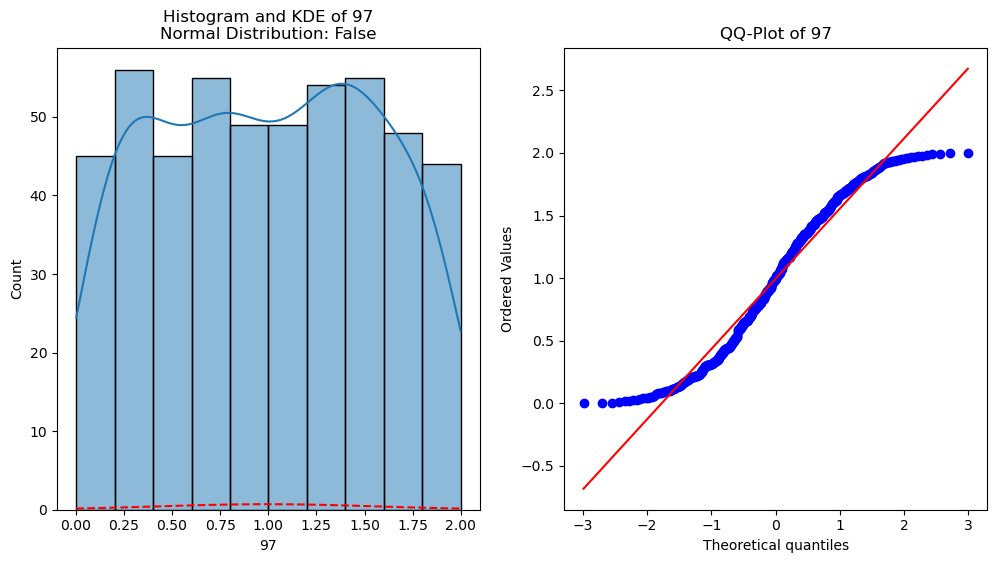

Feature: 98, KS Statistic: 0.0654, P-Value: 2.646e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


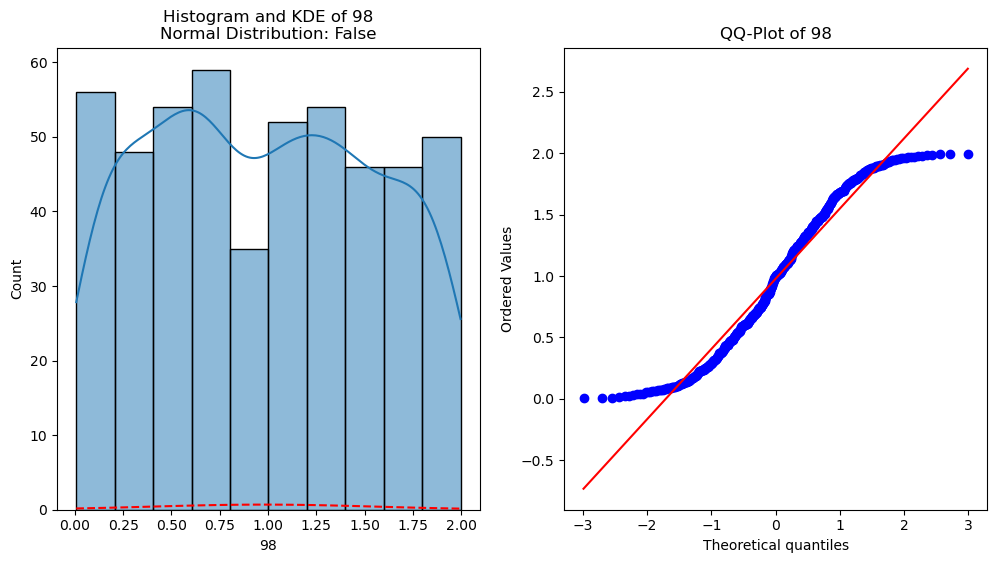

Feature: 99, KS Statistic: 0.0673, P-Value: 2.054e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


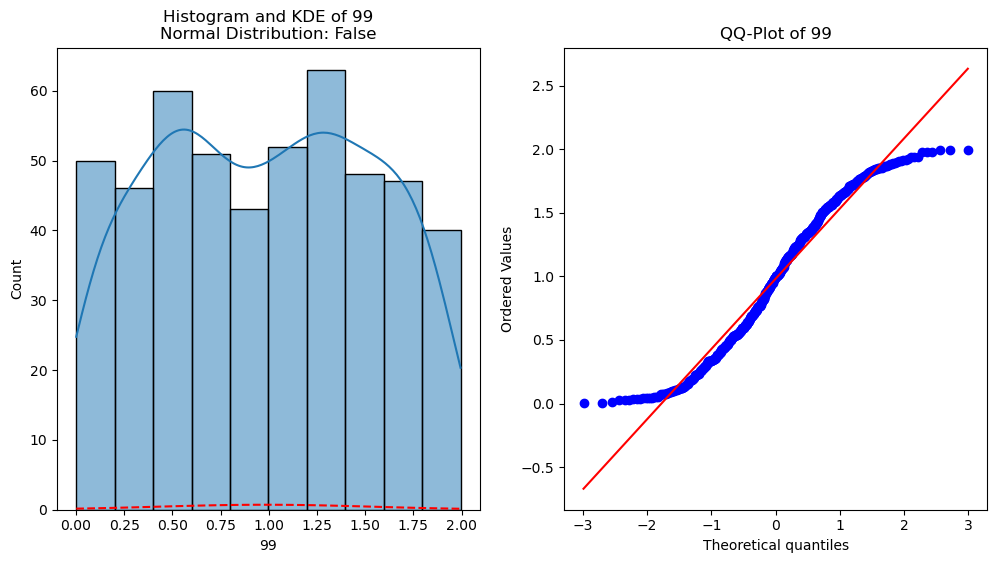

Feature: 100, KS Statistic: 0.0700, P-Value: 1.411e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


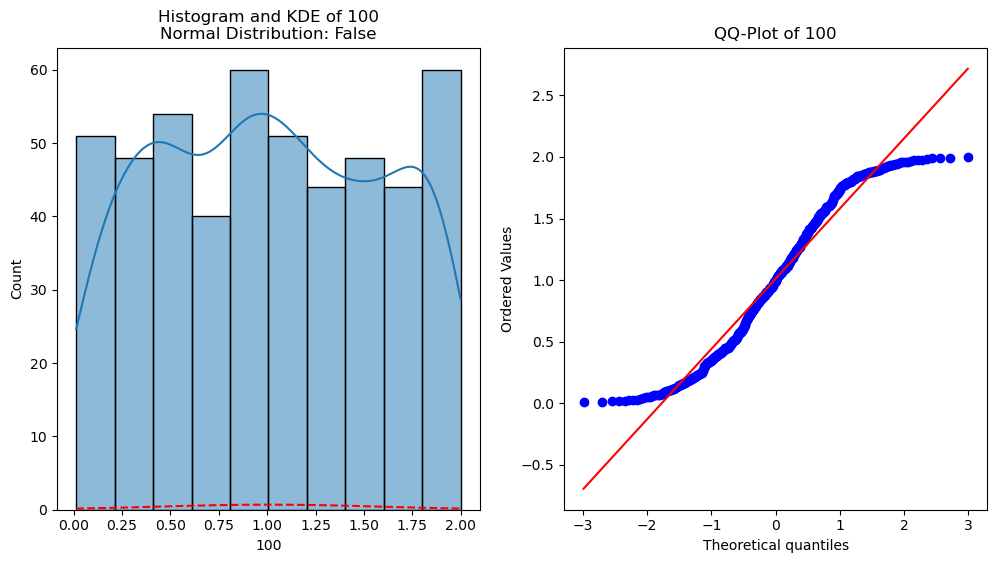

Feature: 101, KS Statistic: 0.0664, P-Value: 1.762e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


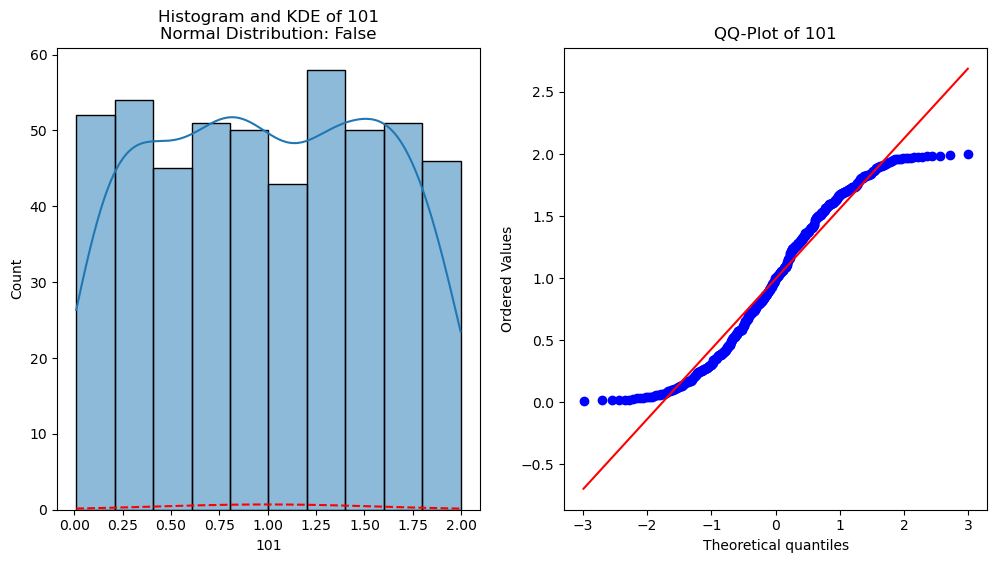

Feature: 102, KS Statistic: 0.0774, P-Value: 3.427e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


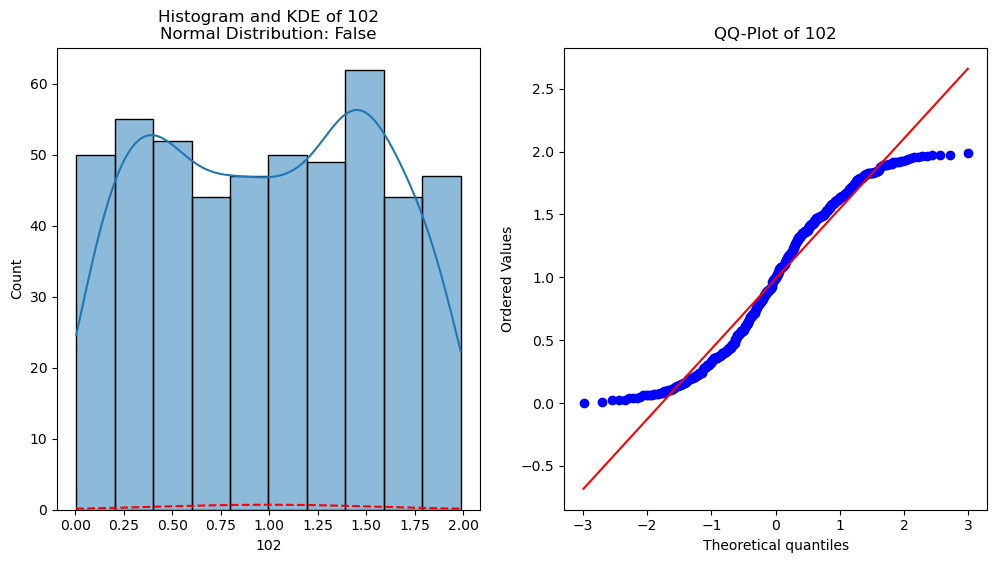

Feature: 103, KS Statistic: 0.0638, P-Value: 3.254e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


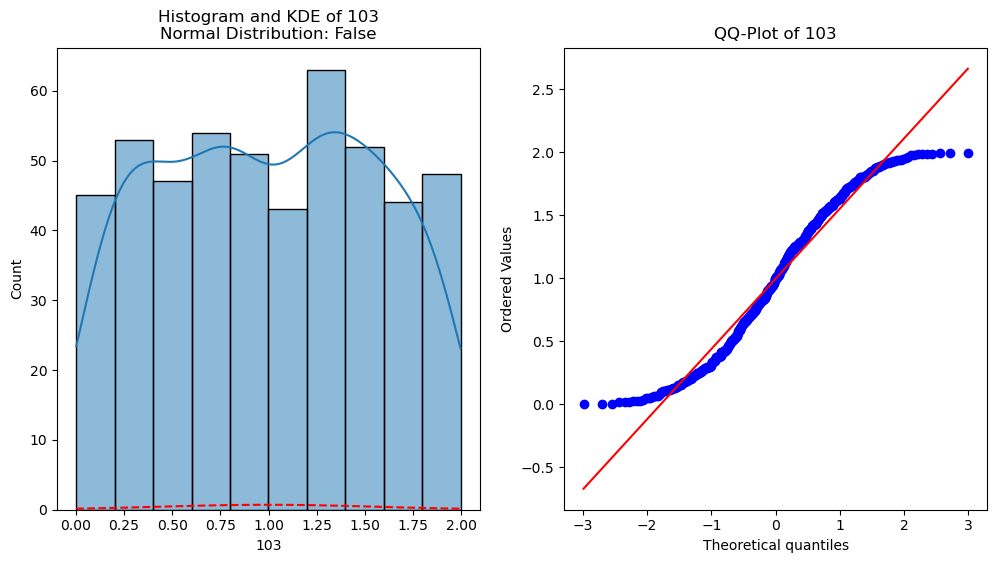

Feature: 104, KS Statistic: 0.0681, P-Value: 1.846e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


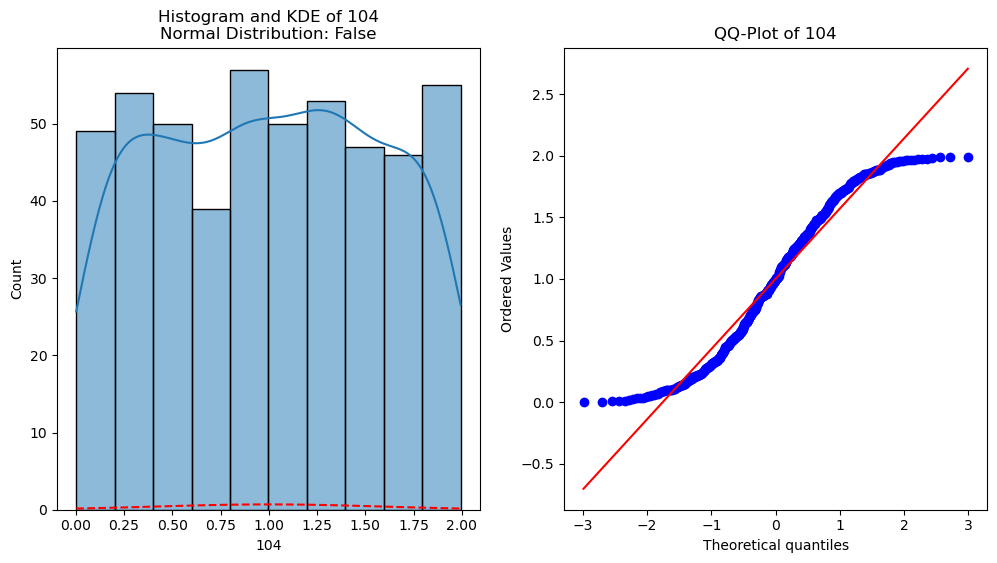

Feature: 105, KS Statistic: 0.0613, P-Value: 3.484e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


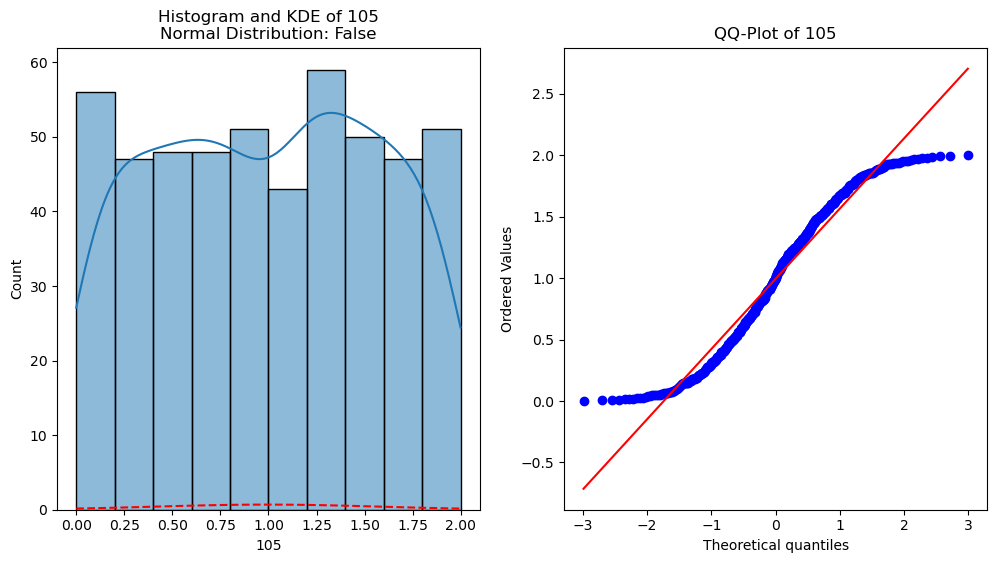

Feature: 106, KS Statistic: 0.0766, P-Value: 5.357e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


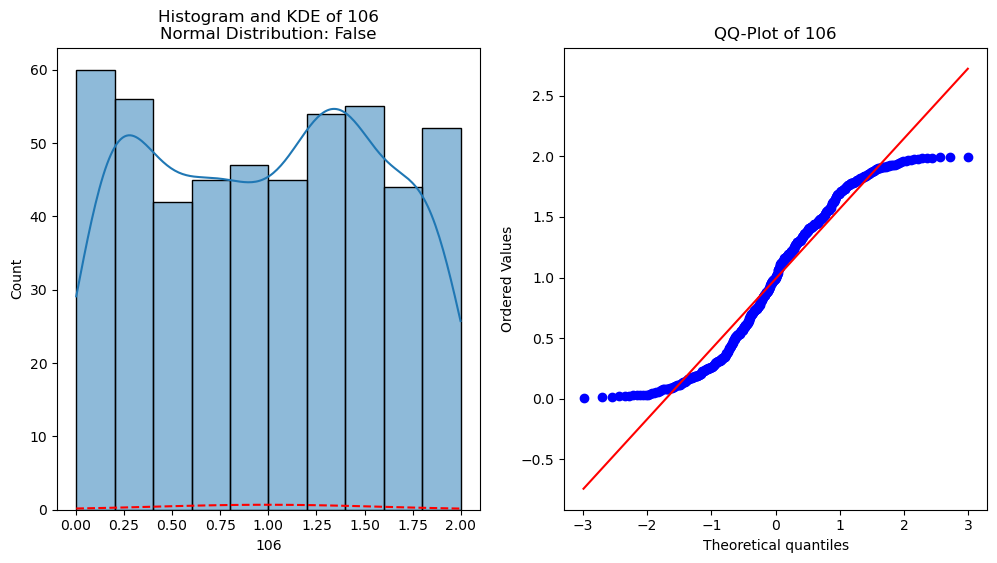

Feature: 107, KS Statistic: 0.0754, P-Value: 4.748e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


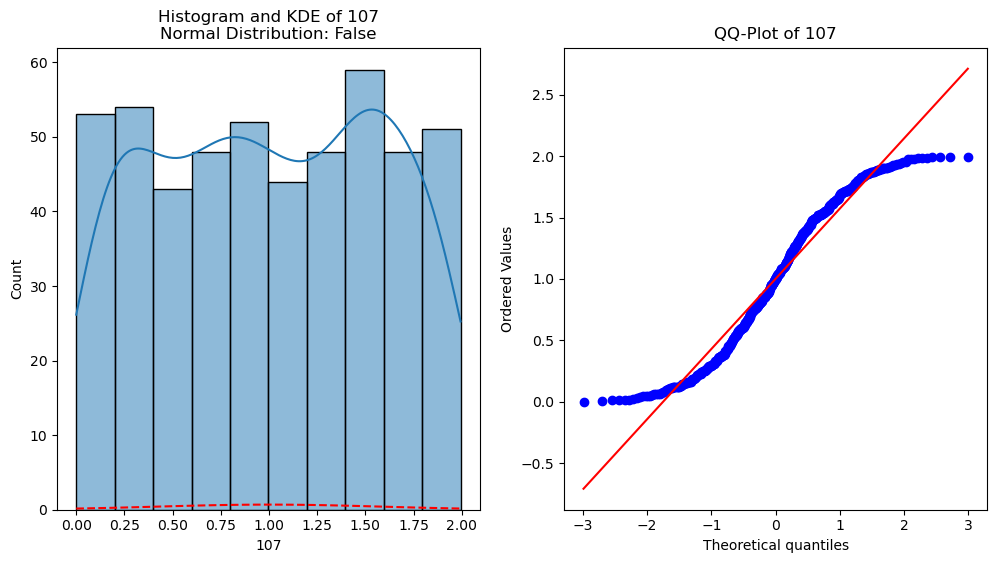

Feature: 108, KS Statistic: 0.0750, P-Value: 6.784e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


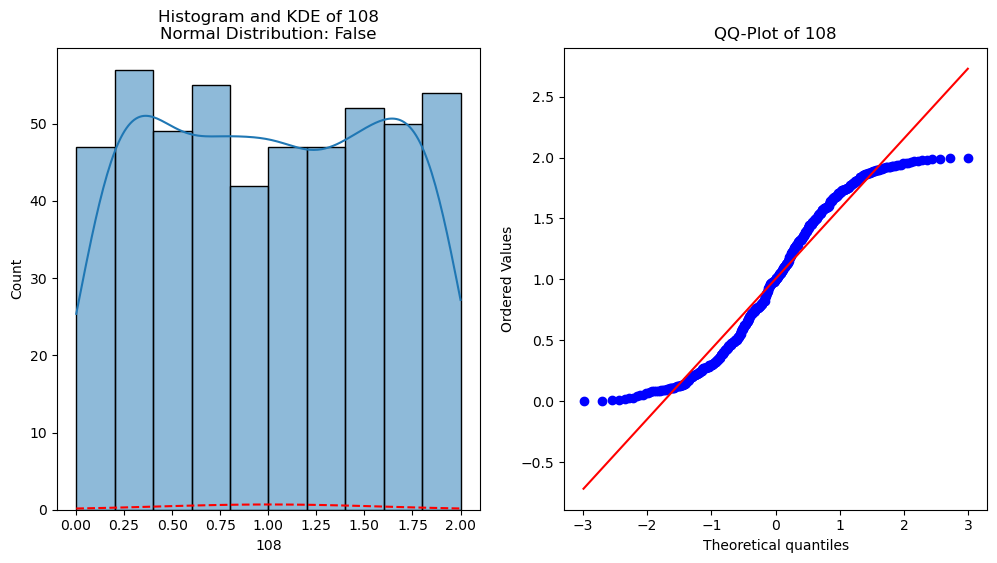

Feature: 109, KS Statistic: 0.0696, P-Value: 1.126e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


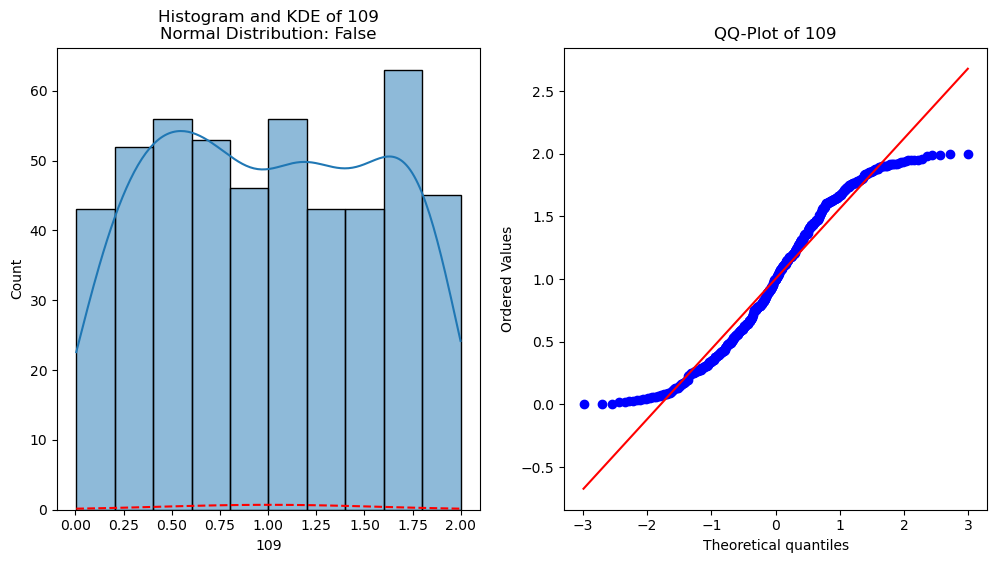

Feature: 110, KS Statistic: 0.0581, P-Value: 5.191e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


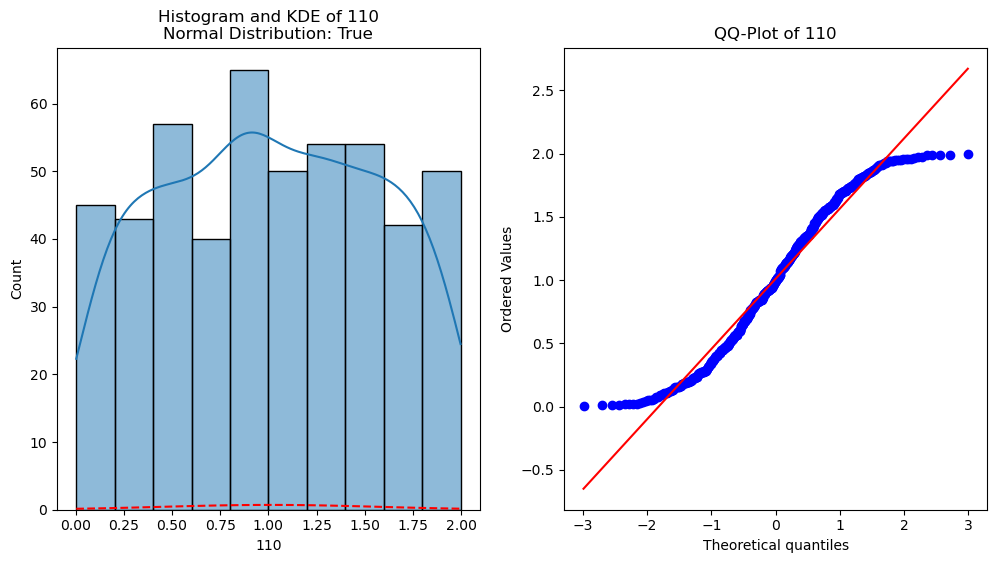

Feature: 111, KS Statistic: 0.0532, P-Value: 9.185e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


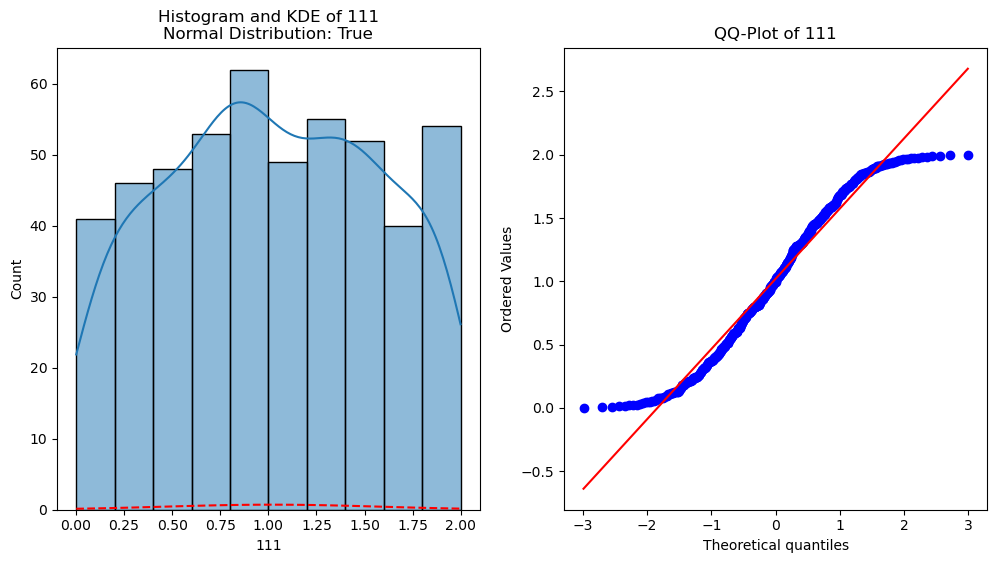

Feature: 112, KS Statistic: 0.0623, P-Value: 3.934e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


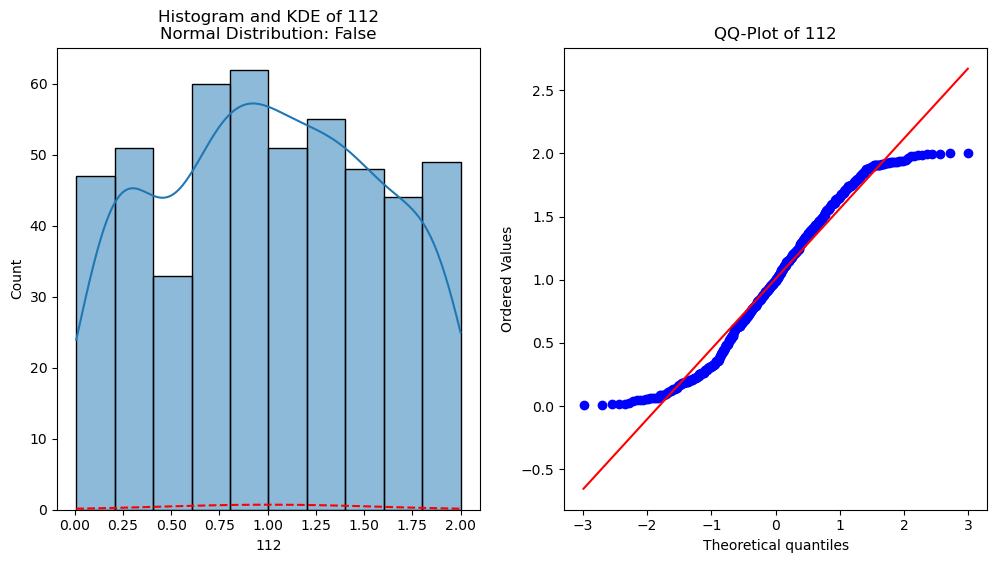

Feature: 113, KS Statistic: 0.0732, P-Value: 8.889e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


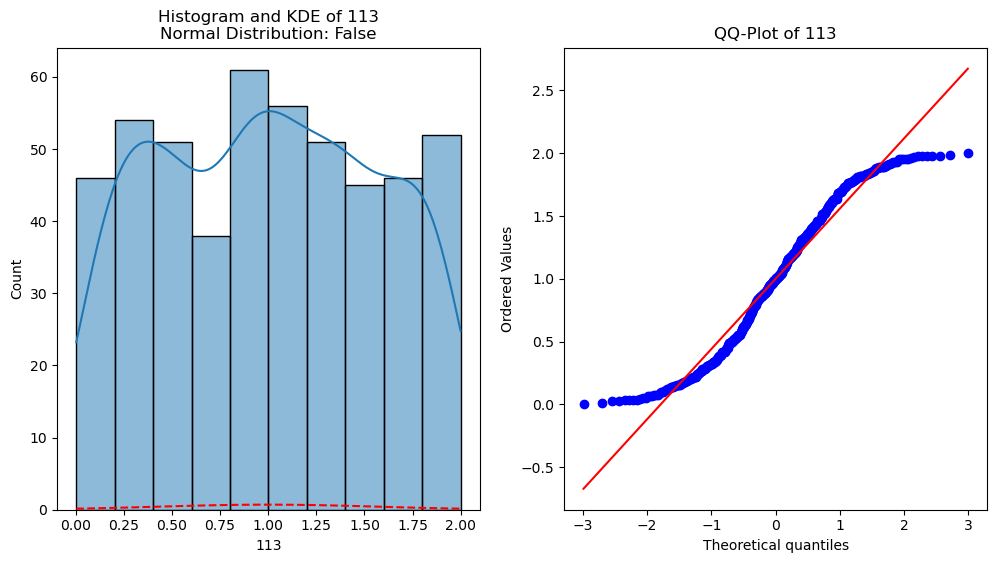

Feature: 114, KS Statistic: 0.0794, P-Value: 3.445e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


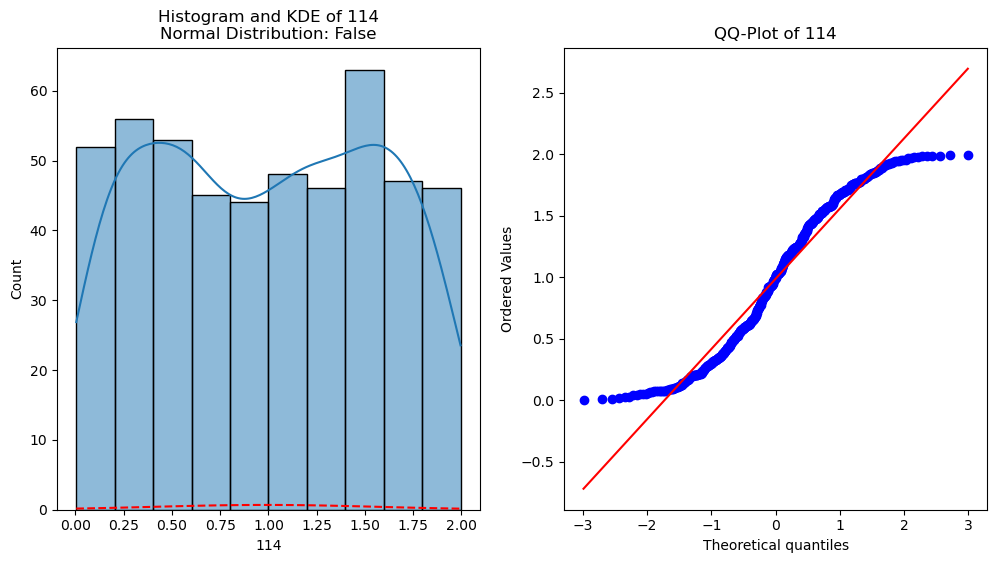

Feature: 115, KS Statistic: 0.0720, P-Value: 7.954e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


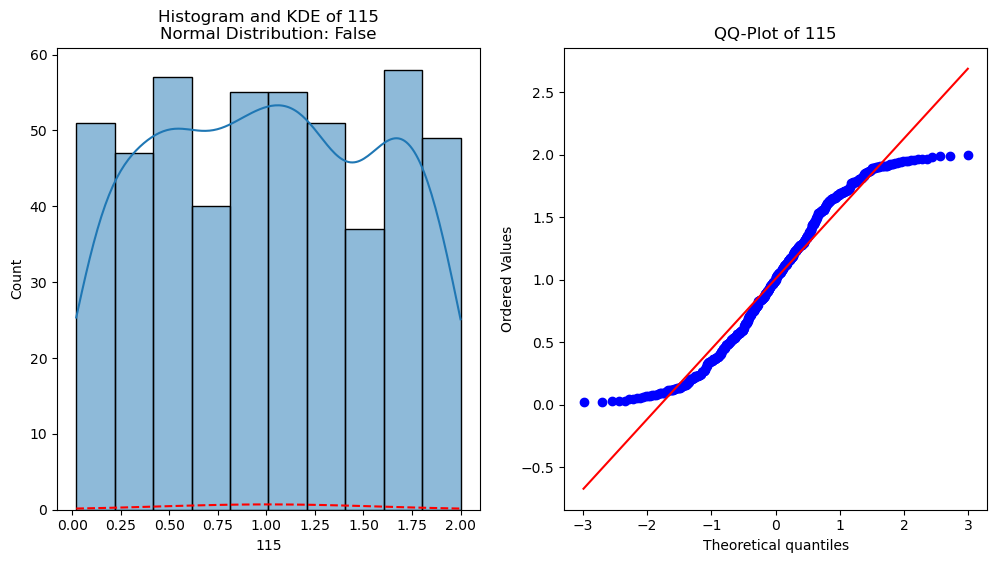

Feature: 116, KS Statistic: 0.0563, P-Value: 7.199e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


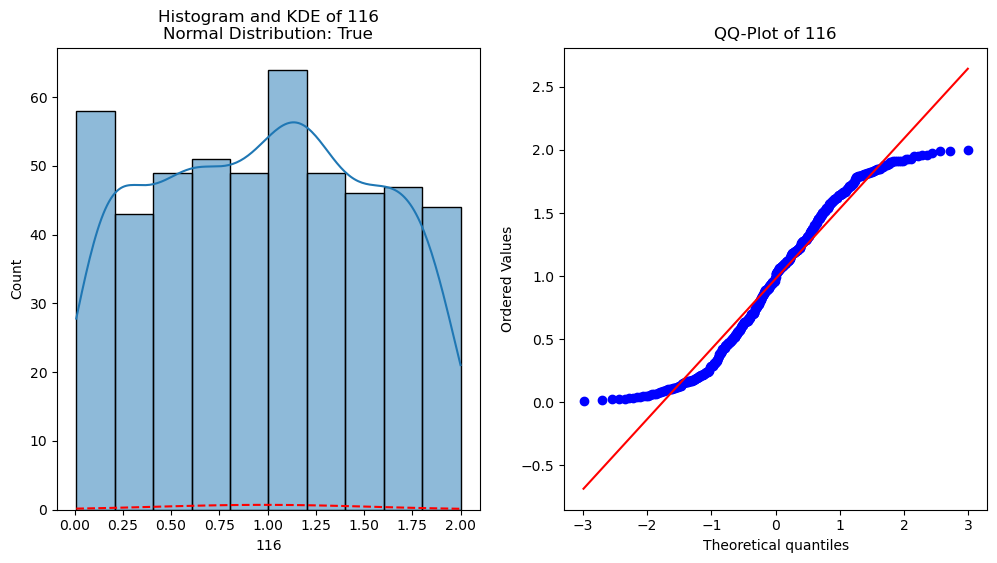

Feature: 117, KS Statistic: 0.0608, P-Value: 4.747e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


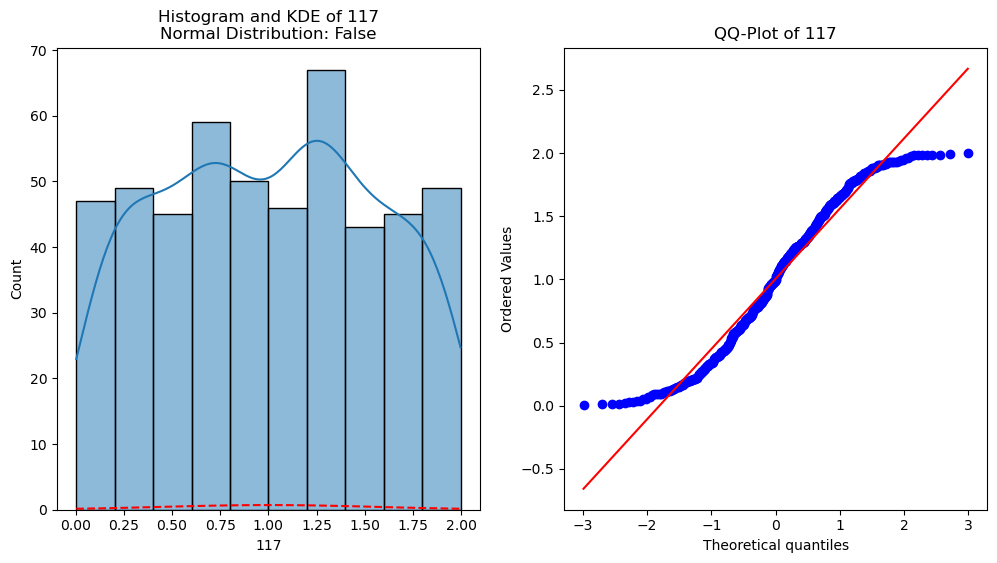

Feature: 118, KS Statistic: 0.0572, P-Value: 5.771e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


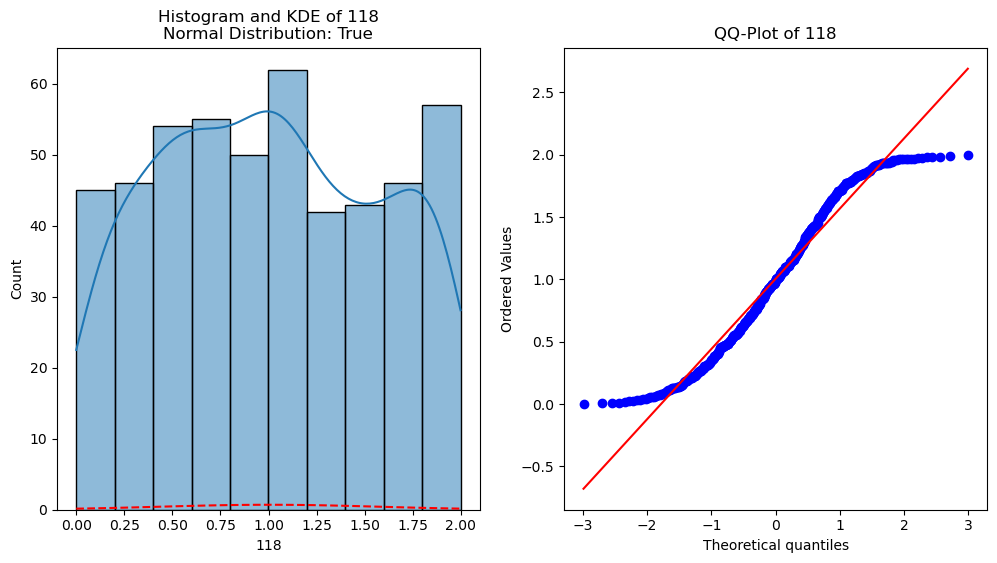

Feature: 119, KS Statistic: 0.0563, P-Value: 6.410e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


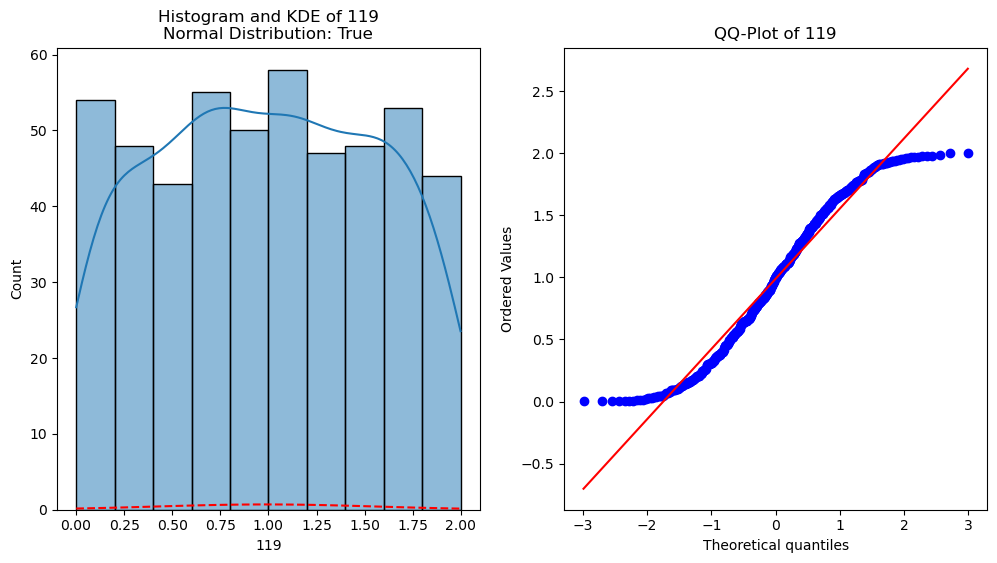

Feature: 120, KS Statistic: 0.0687, P-Value: 1.278e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


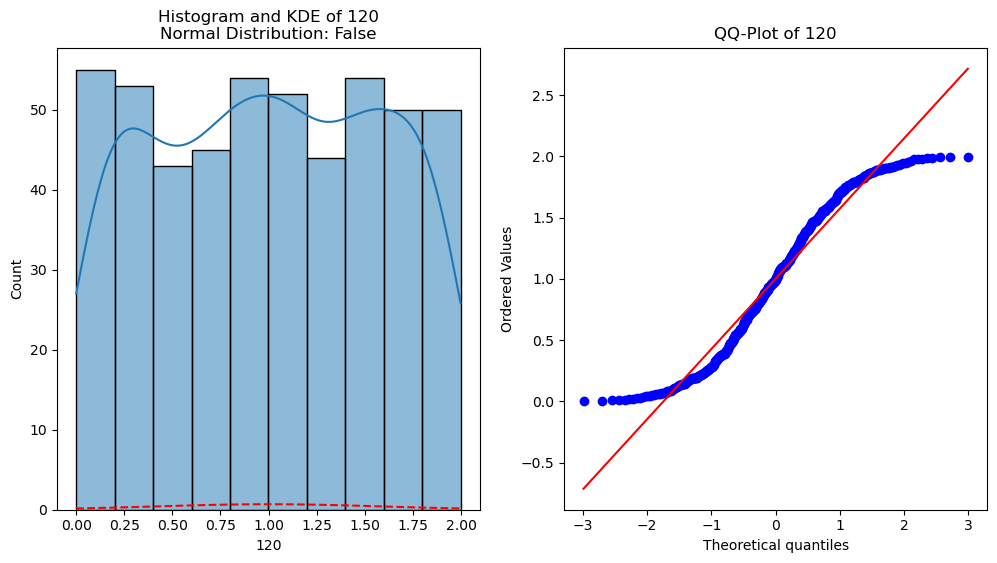

Feature: 121, KS Statistic: 0.0655, P-Value: 1.989e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


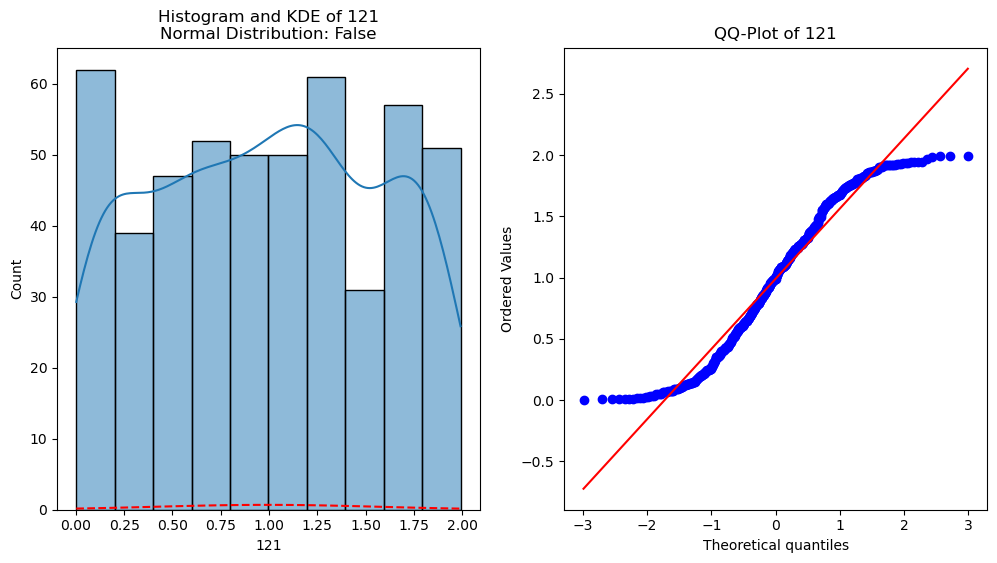

Feature: 122, KS Statistic: 0.0764, P-Value: 4.710e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


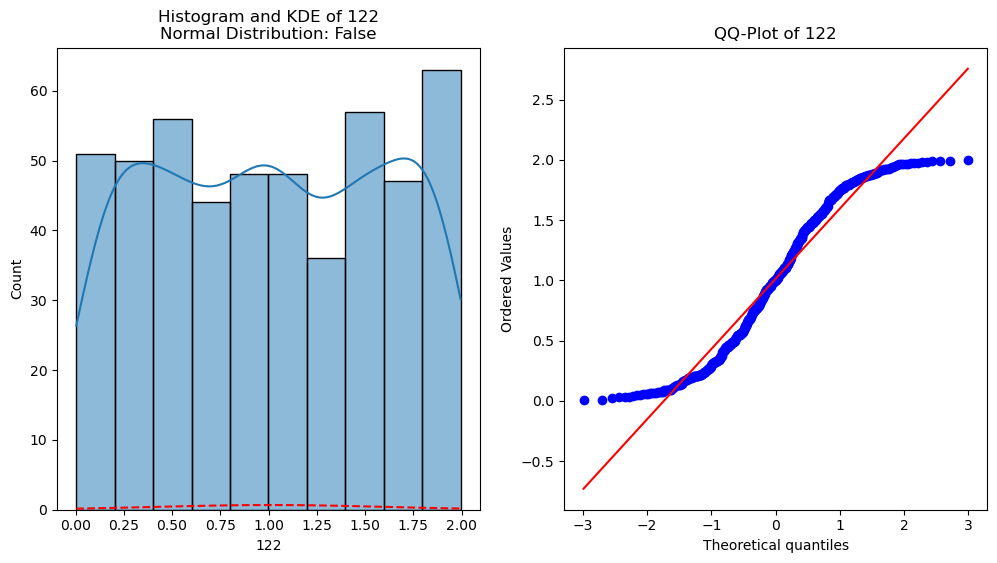

Feature: 123, KS Statistic: 0.0744, P-Value: 7.492e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


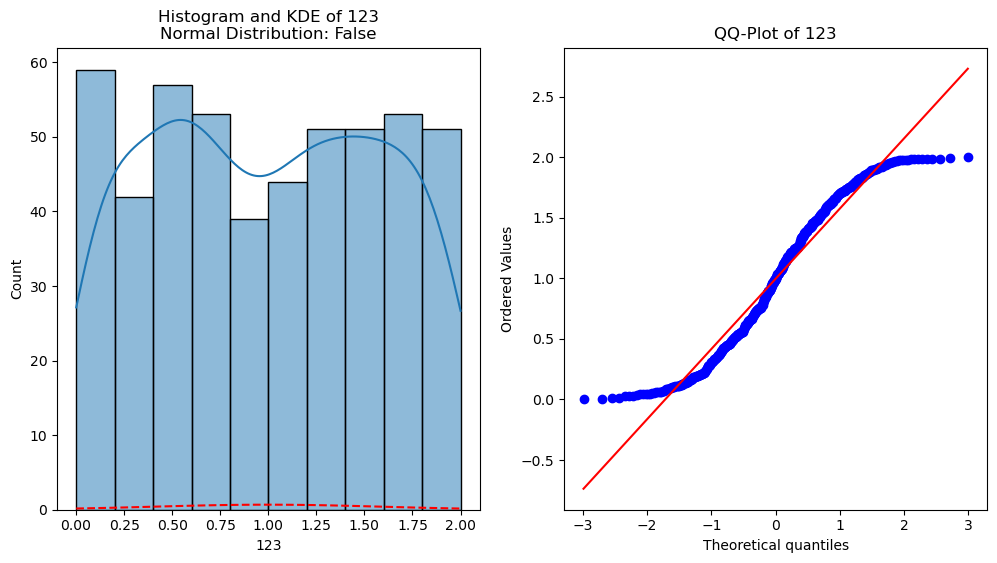

Feature: 124, KS Statistic: 0.0634, P-Value: 3.434e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


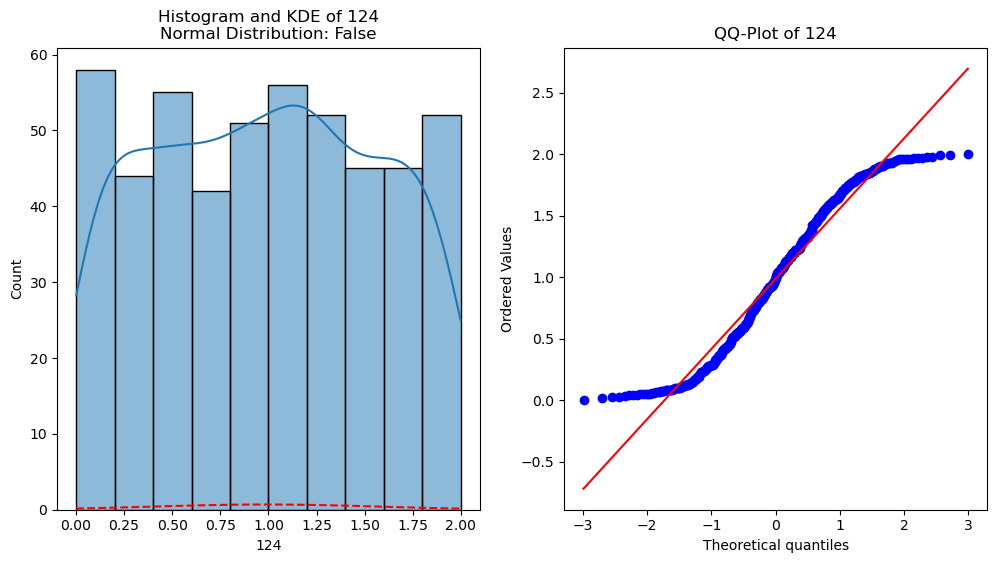

Feature: 125, KS Statistic: 0.0763, P-Value: 5.588e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


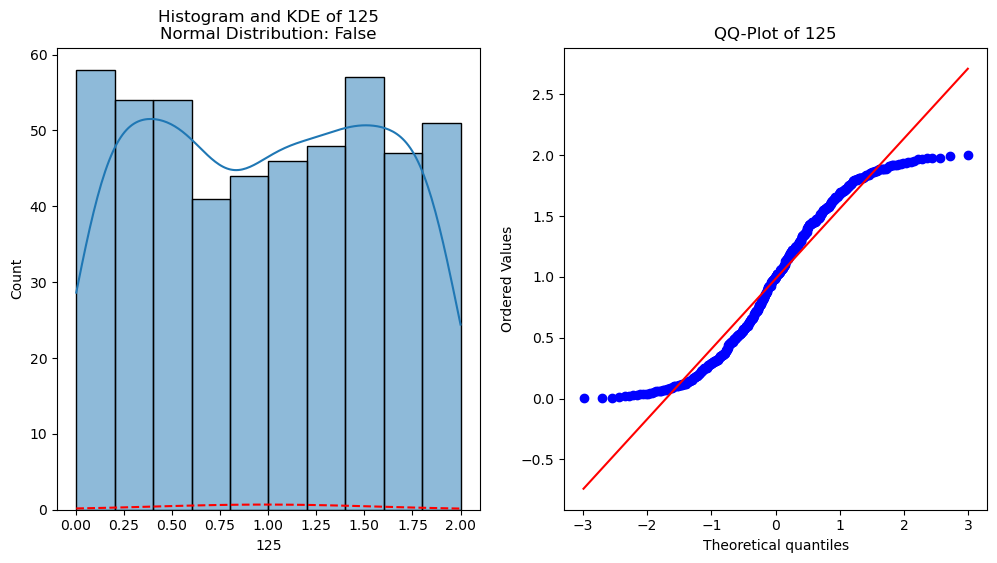

Feature: 126, KS Statistic: 0.0781, P-Value: 3.062e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


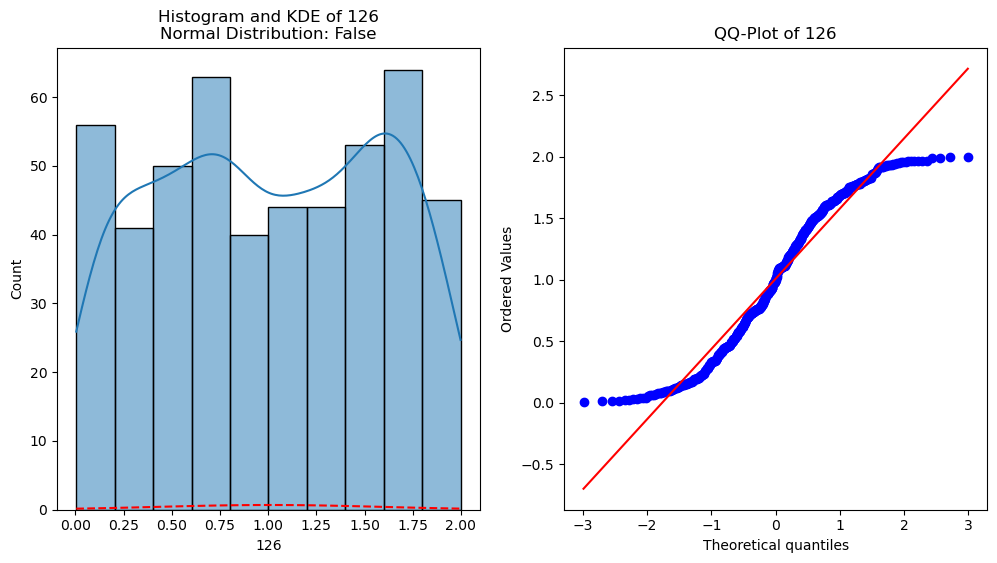

Feature: 127, KS Statistic: 0.0671, P-Value: 1.602e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


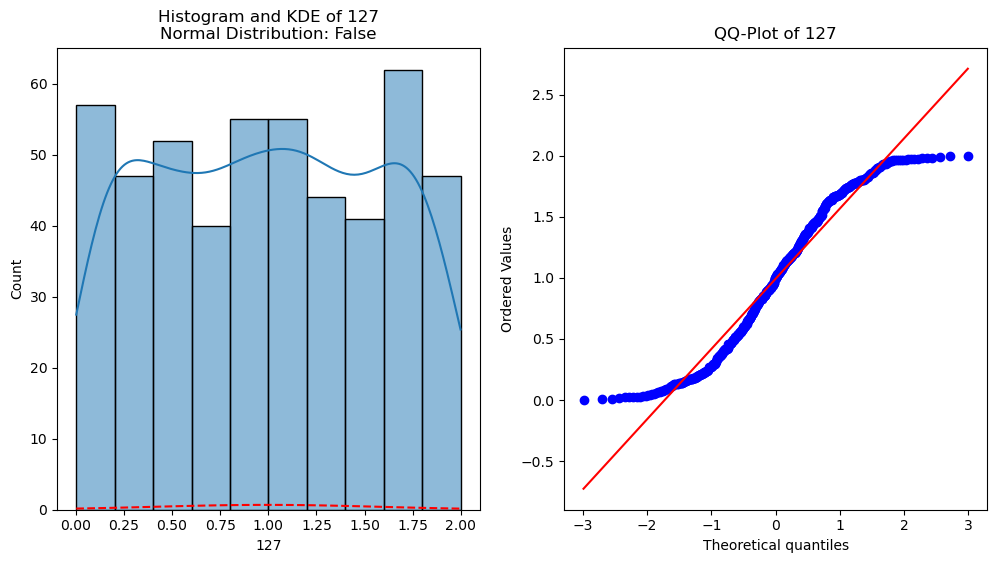

Feature: 128, KS Statistic: 0.0772, P-Value: 3.531e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


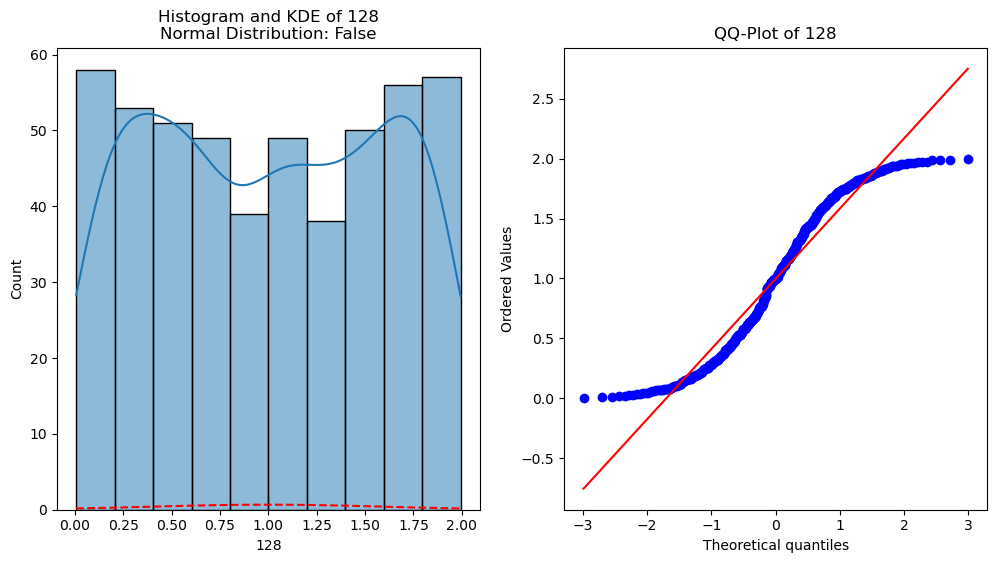

Feature: 129, KS Statistic: 0.0720, P-Value: 1.066e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


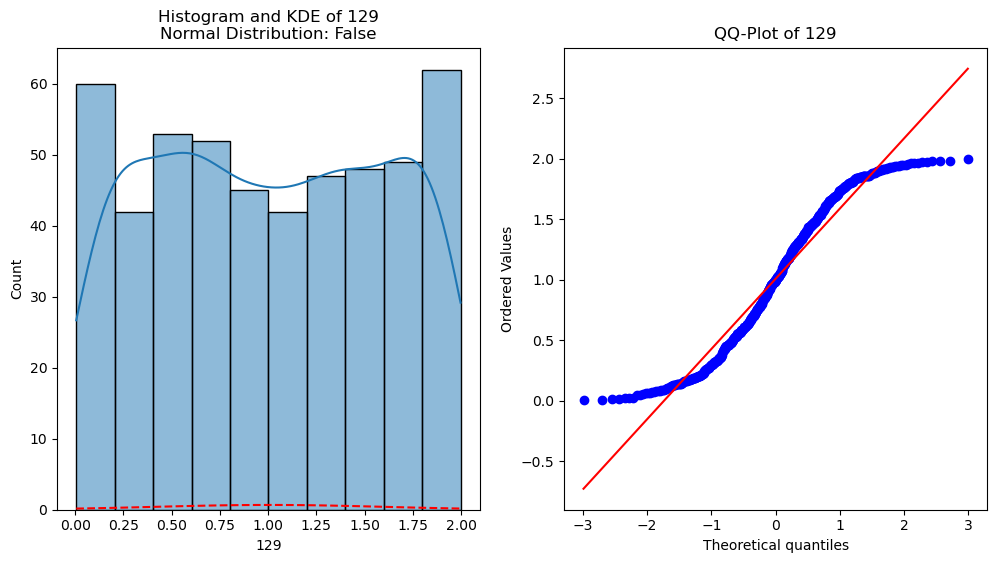

Feature: 130, KS Statistic: 0.0691, P-Value: 1.204e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


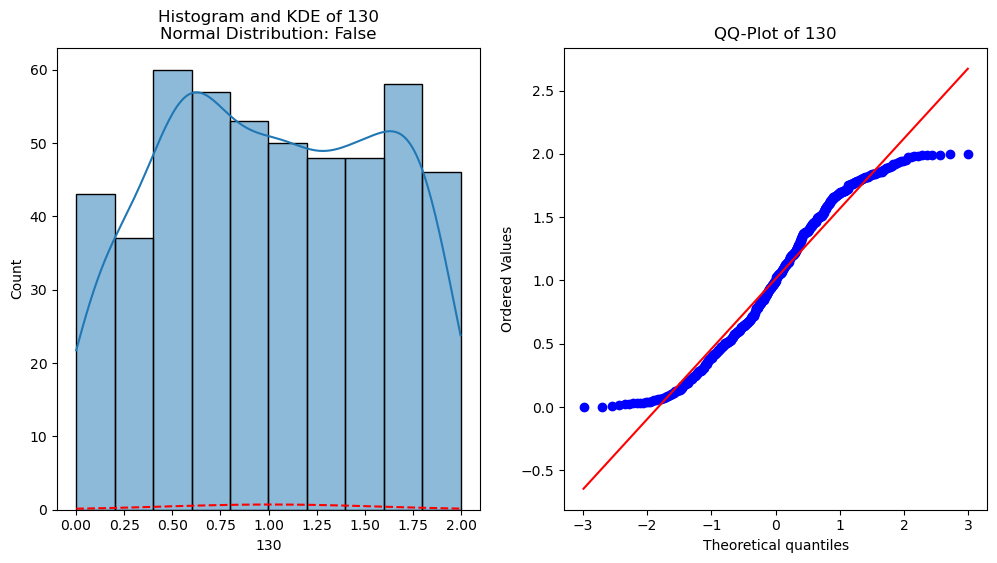

Feature: 131, KS Statistic: 0.0762, P-Value: 5.722e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


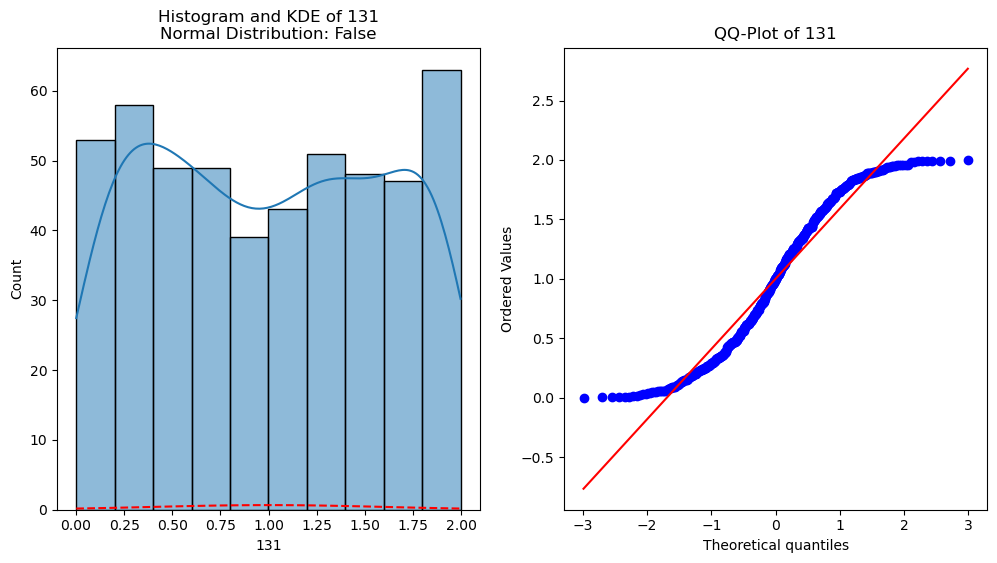

Feature: 132, KS Statistic: 0.0745, P-Value: 7.389e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


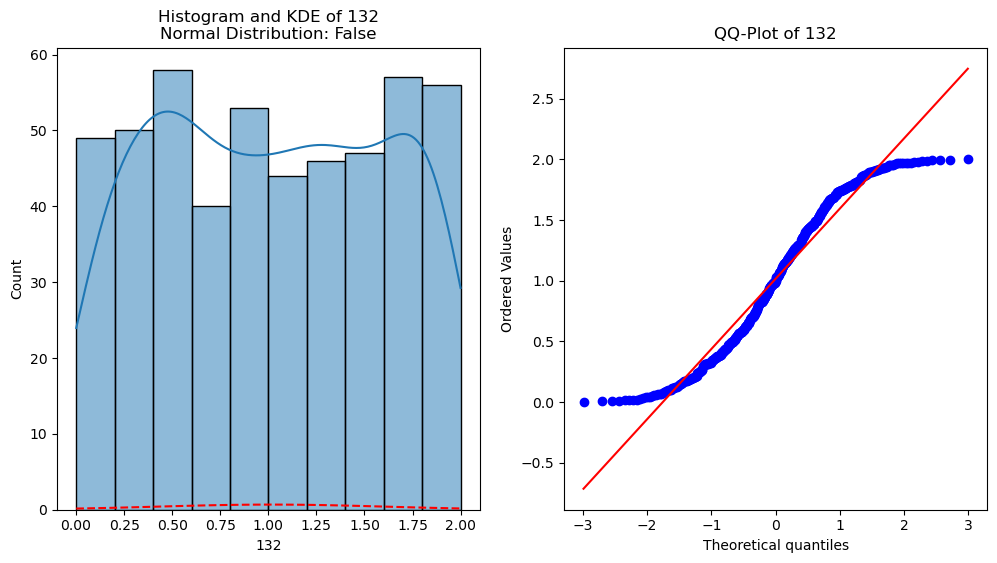

Feature: 133, KS Statistic: 0.0598, P-Value: 4.293e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


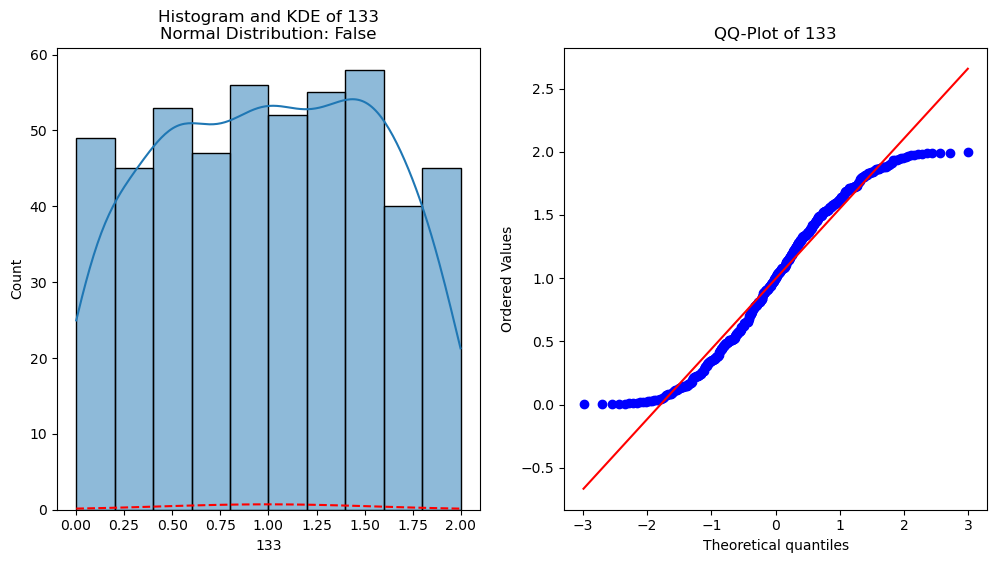

Feature: 134, KS Statistic: 0.0677, P-Value: 1.473e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


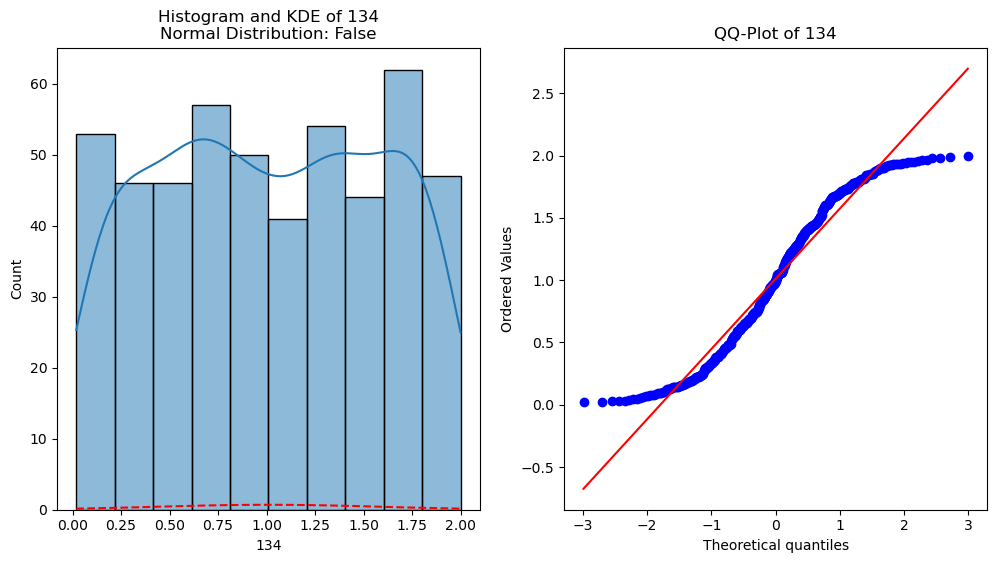

Feature: 135, KS Statistic: 0.0684, P-Value: 1.336e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


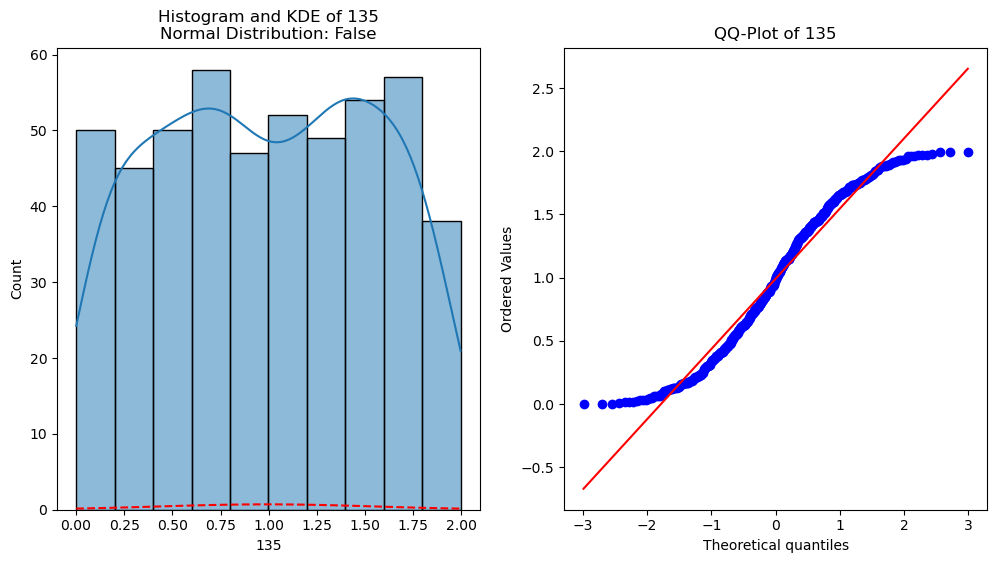

Feature: 136, KS Statistic: 0.0632, P-Value: 3.522e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


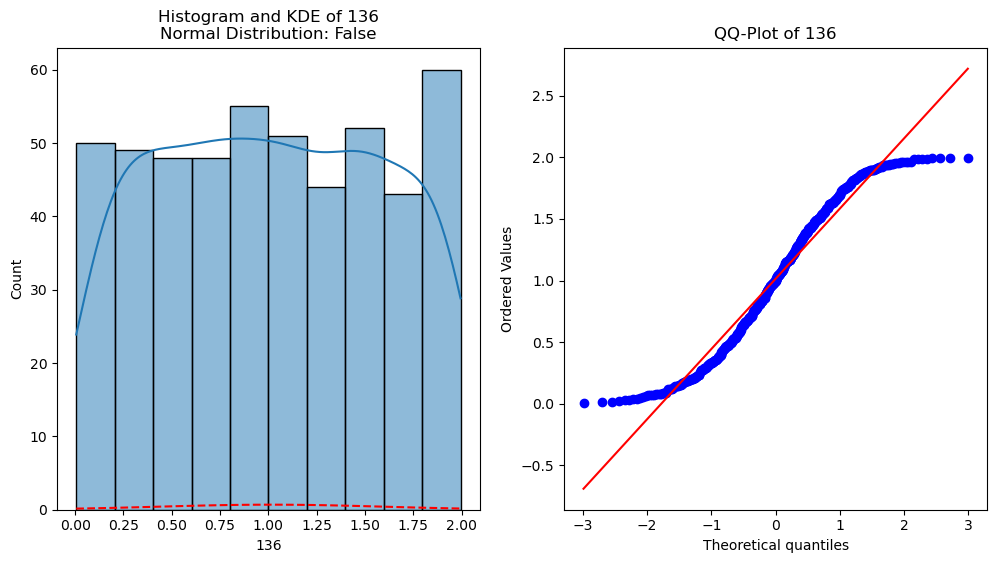

Feature: 137, KS Statistic: 0.0720, P-Value: 1.068e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


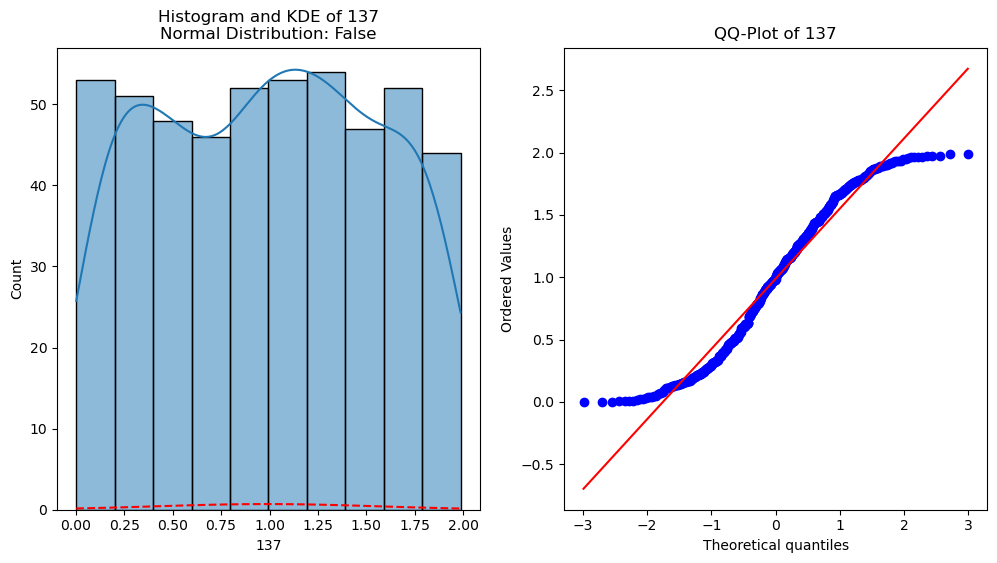

Feature: 138, KS Statistic: 0.0621, P-Value: 4.052e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


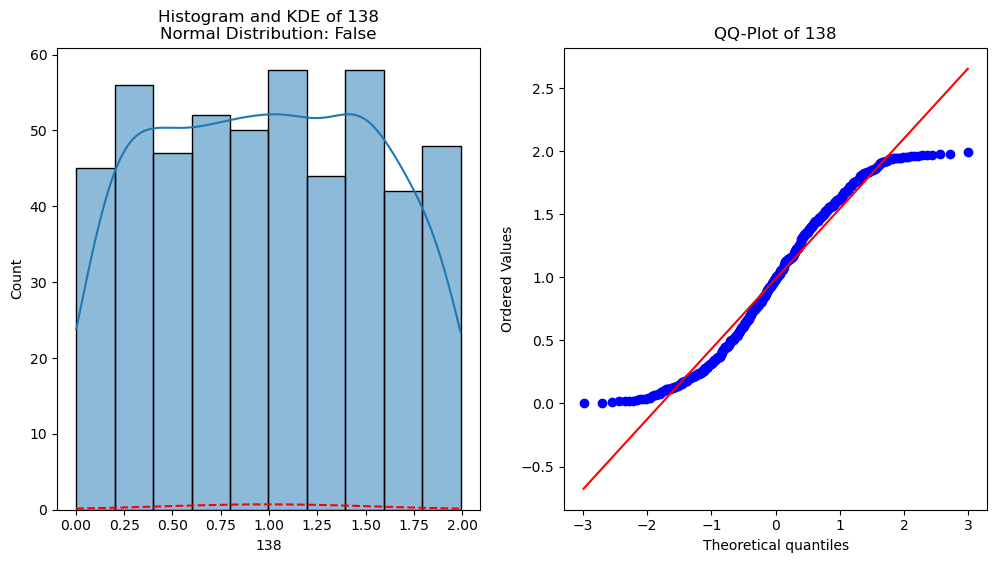

Feature: 139, KS Statistic: 0.0837, P-Value: 1.697e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


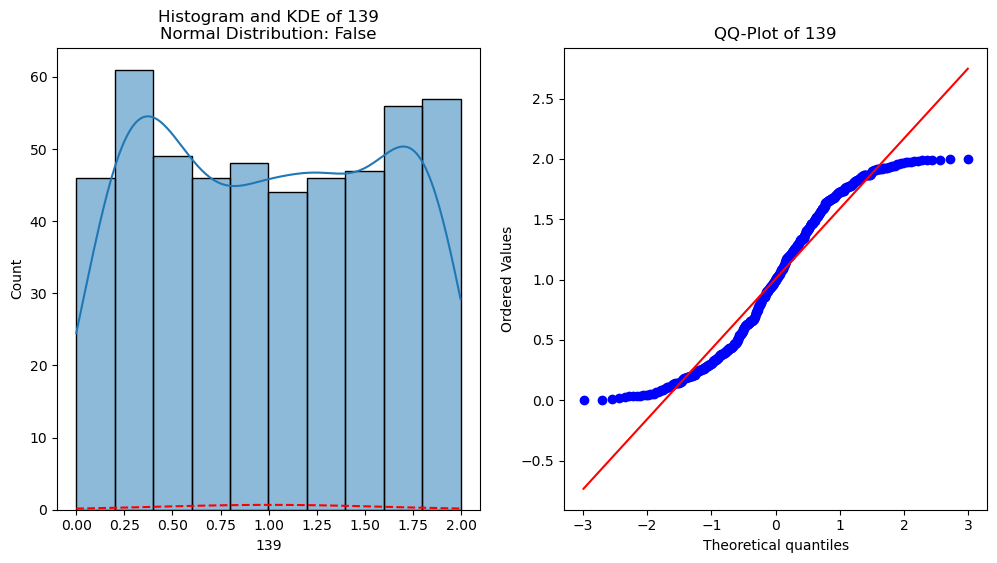

Feature: 140, KS Statistic: 0.0589, P-Value: 5.967e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


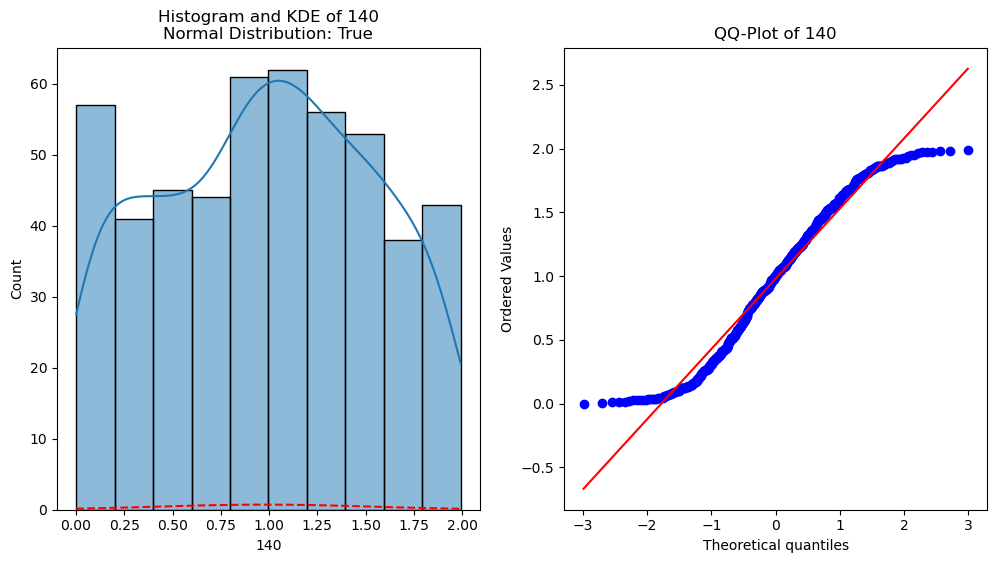

Feature: 141, KS Statistic: 0.0652, P-Value: 2.706e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


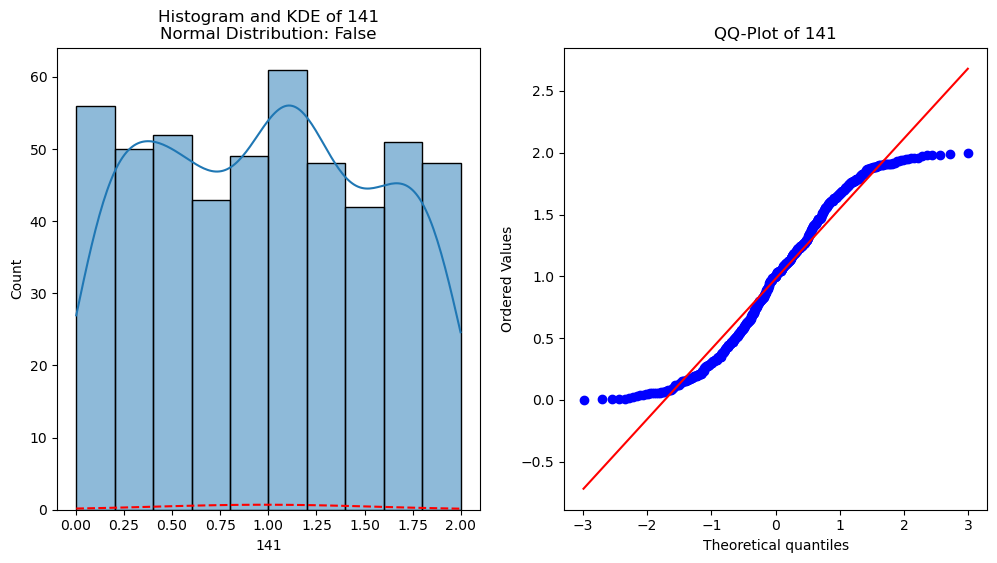

Feature: 142, KS Statistic: 0.0855, P-Value: 1.254e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


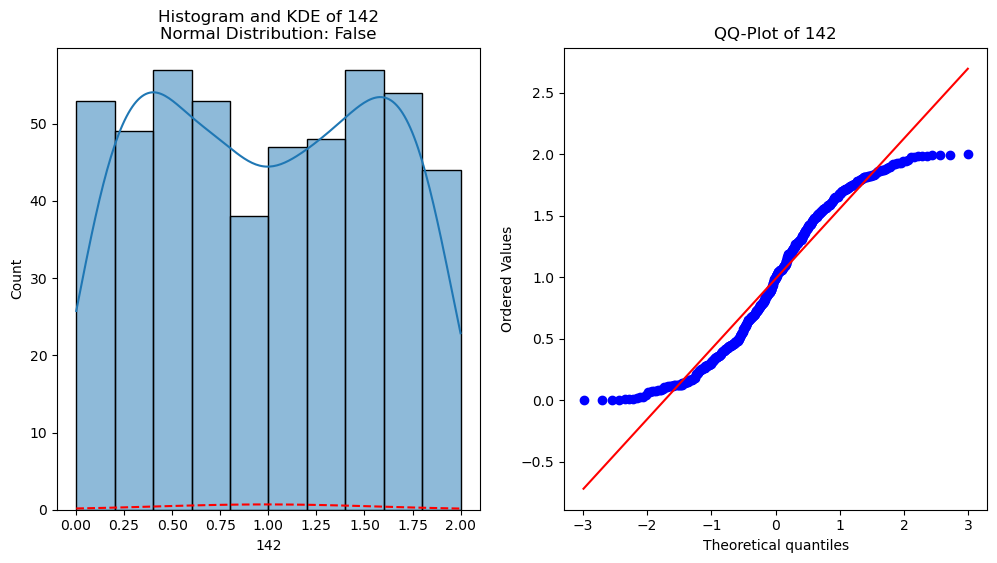

Feature: 143, KS Statistic: 0.0638, P-Value: 3.279e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


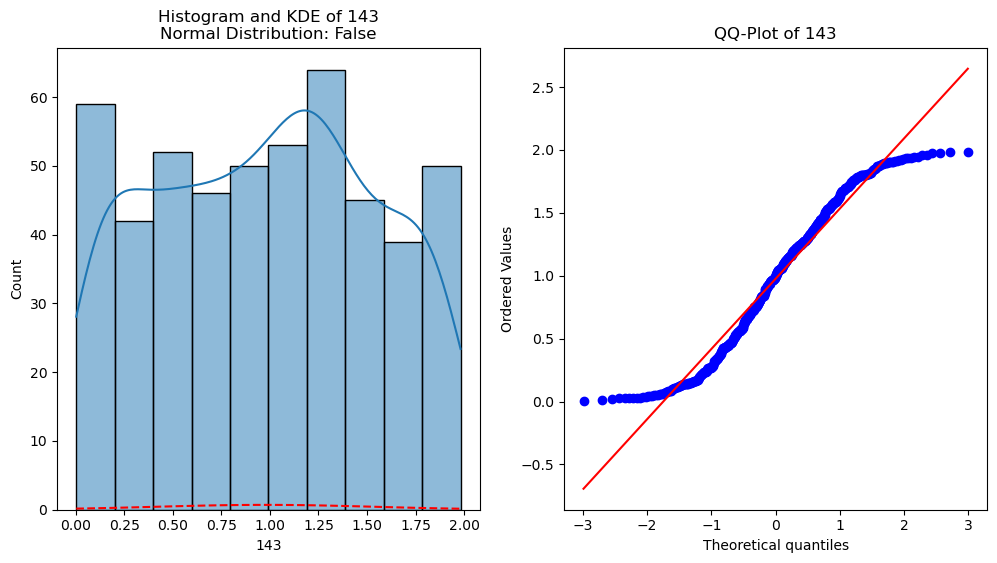

Feature: 144, KS Statistic: 0.0680, P-Value: 1.865e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


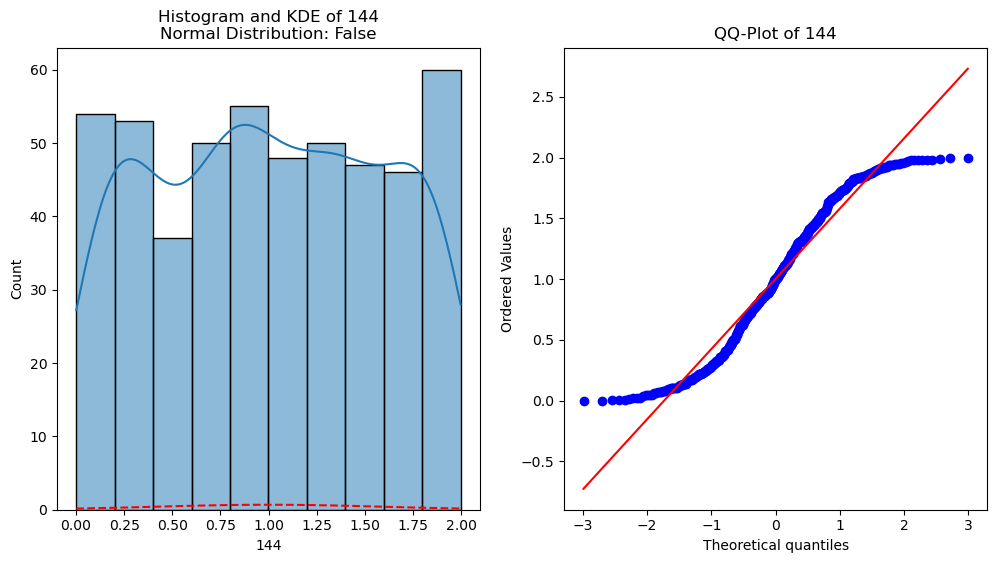

Feature: 145, KS Statistic: 0.0728, P-Value: 7.066e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


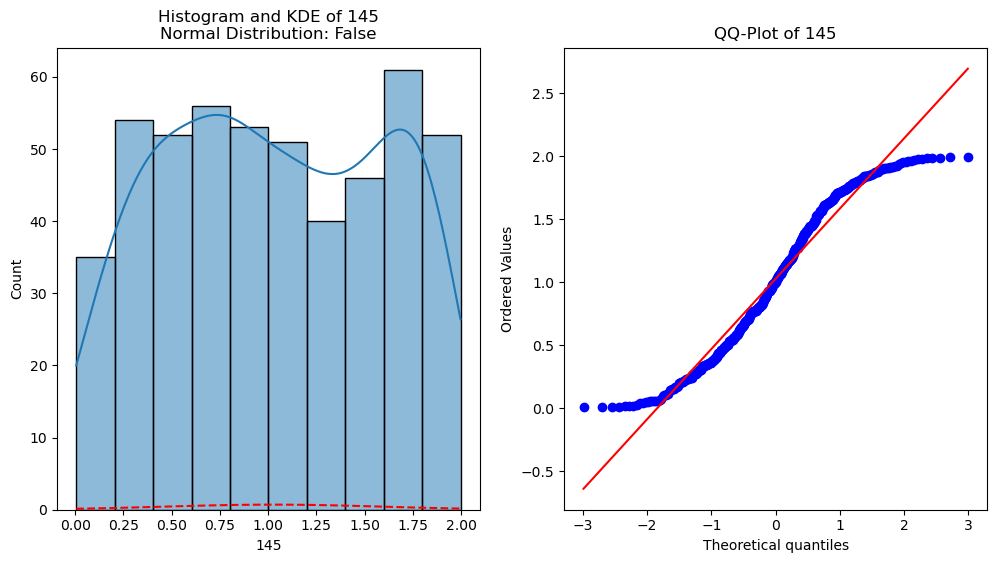

Feature: 146, KS Statistic: 0.0805, P-Value: 2.093e-03, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


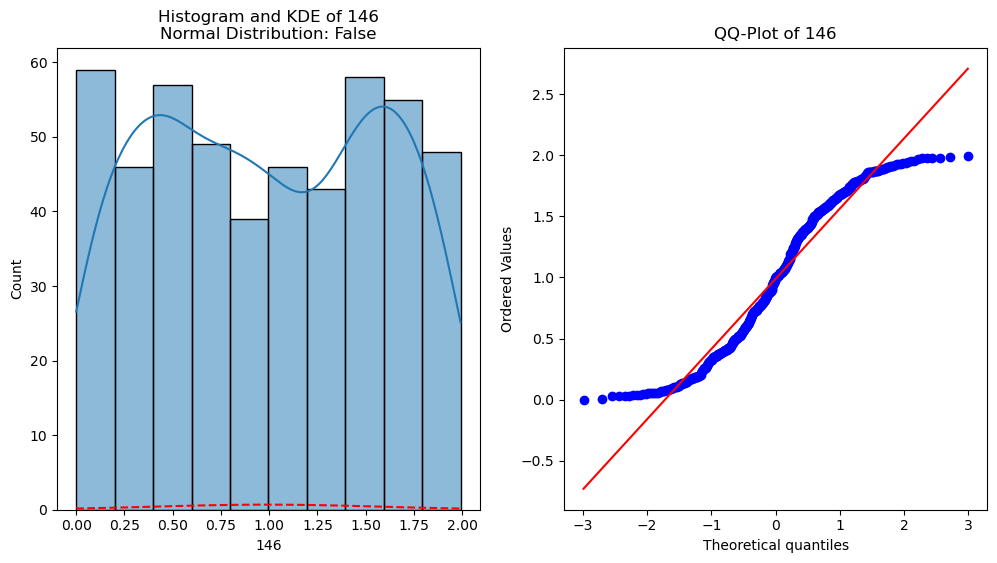

Feature: 147, KS Statistic: 0.0598, P-Value: 4.901e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


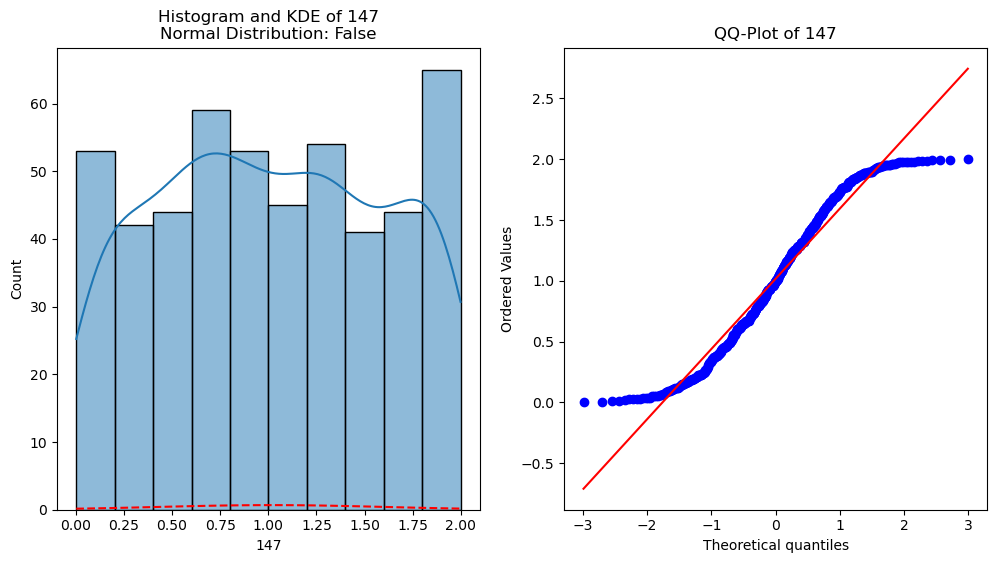

Feature: 148, KS Statistic: 0.0562, P-Value: 6.499e-02, Normal Distribution: True


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


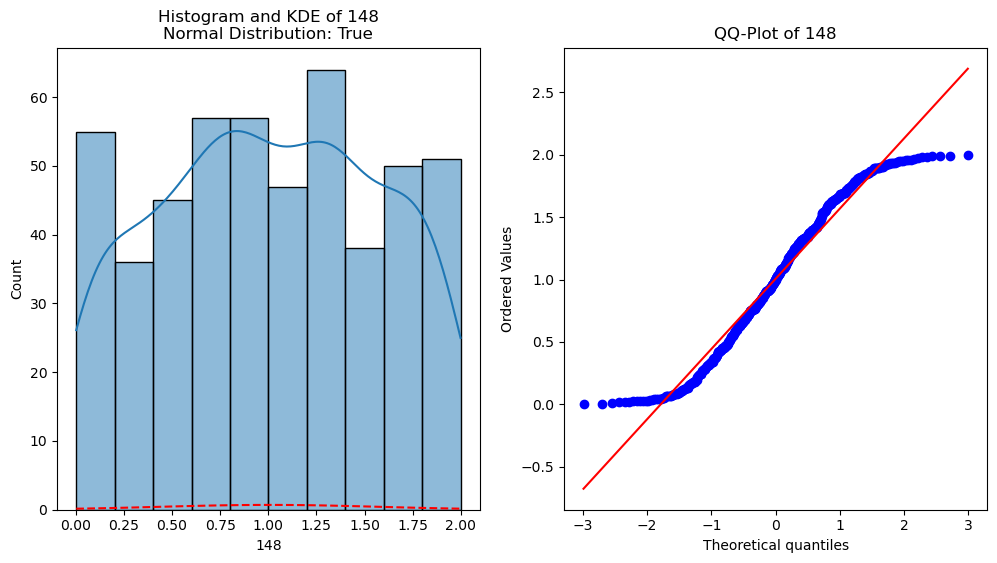

Feature: 149, KS Statistic: 0.0639, P-Value: 2.469e-02, Normal Distribution: False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


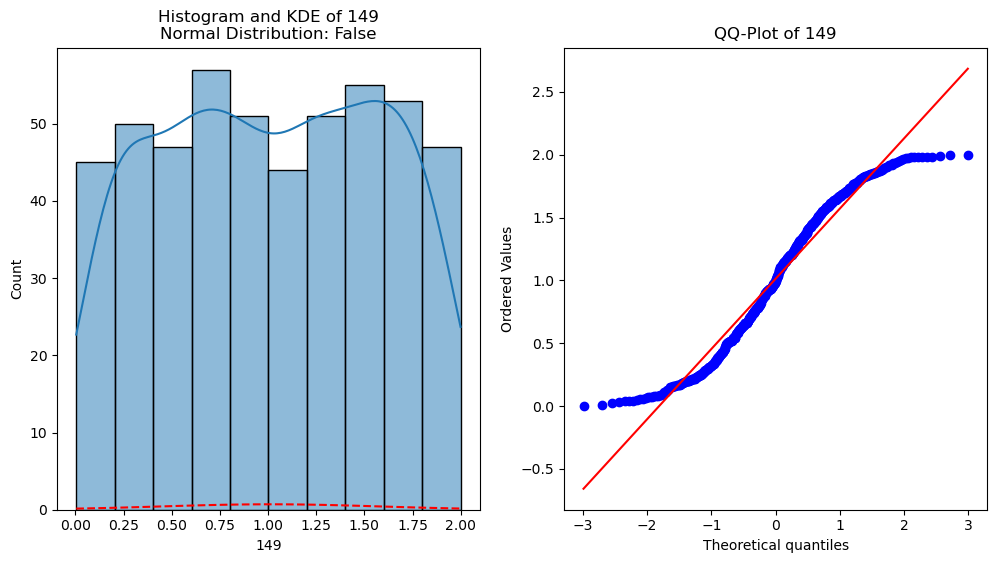

 Feature KS Statistic   P-Value  Normal Distribution Hypothesis Result
      26       0.0847 1.010e-03                False         Reject H0
      27       0.0574 7.145e-02                 True Fail to reject H0
      28       0.0664 1.766e-02                False         Reject H0
      29       0.0749 5.138e-03                False         Reject H0
      30       0.0685 1.315e-02                False         Reject H0
      31       0.0741 7.835e-03                False         Reject H0
      32       0.0691 1.219e-02                False         Reject H0
      33       0.0784 4.067e-03                False         Reject H0
      34       0.0809 2.704e-03                False         Reject H0
      35       0.0806 2.848e-03                False         Reject H0
      36       0.0680 1.416e-02                False         Reject H0
      37       0.0715 1.150e-02                False         Reject H0
      38       0.0806 2.063e-03                False         Reject H0
      

In [87]:
######################## KS TEST WITH HISTOGRAMS FOR EACH FEATURE (this is optional we will delete this soon)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df_table is already defined and contains your data
# Subset to select only numerical variables columns --> KS Test only works with numerical
df_KS = df_table.select_dtypes(include=["float64"])
# Add label column to new KS dataset to compare Feature to Label
label_column = df_table.iloc[:, -1]
df_KS['label_column'] = label_column

# Function to standardize the sample
def standardize(sample):
    return (sample - np.mean(sample)) / np.std(sample)

# Function to perform KS test
def ks_test(sample):
    # Sort the sample
    sample_sorted = np.sort(sample)
    # Evaluate the empirical CDF (ECDF)
    ecdf = np.arange(1, len(sample_sorted)+1) / len(sample_sorted)
    # Evaluate the theoretical CDF
    cdf = stats.norm.cdf(sample_sorted)
    # Calculate the KS statistic
    ks_stat = np.max(np.abs(ecdf - cdf))
    # Calculate the p-value
    p_value = stats.kstest(sample_sorted, 'norm').pvalue
    return ks_stat, p_value

#KDE represents the data using a continuous probability density curve in one or more dimensions
# Function to create histograms and QQ-plots
def plot_distribution(sample, feature_name, is_normal):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram and KDE
    sns.histplot(sample, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram and KDE of {feature_name}\nNormal Distribution: {is_normal}')
    
    # Overlay normal distribution curve
    mean, std = np.mean(sample), np.std(sample)
    x = np.linspace(min(sample), max(sample), 100)
    y = stats.norm.pdf(x, mean, std)
    ax[0].plot(x, y, 'r--')
    
    # QQ-plot
    stats.probplot(sample, dist="norm", plot=ax[1])
    ax[1].set_title(f'QQ-Plot of {feature_name}')

    plt.show()

# Perform KS test and plot distributions
var_count = len(df_KS.columns) - 1

results = []

for i in range(var_count):
    sample = df_KS.iloc[:, i]
    standardized_sample = standardize(sample)
    ks_stat, p_value = ks_test(standardized_sample)
    normal_dist = p_value > 0.05
    hypothesis_result = "Fail to reject H0" if normal_dist else "Reject H0"

    results.append({
        "Feature": df_KS.columns[i],
        "KS Statistic": f"{ks_stat:.4f}",
        "P-Value": f"{p_value:.3e}",
        "Normal Distribution": normal_dist,
        "Hypothesis Result": hypothesis_result
    })
    
    print(f"Feature: {df_KS.columns[i]}, KS Statistic: {ks_stat:.4f}, P-Value: {p_value:.3e}, Normal Distribution: {normal_dist}")
    
    # Plot distribution for each feature, passing the normal distribution result
    plot_distribution(sample, df_KS.columns[i], normal_dist)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df.to_string(index=False))


In [ ]:
########################## Histogram/Graphing ###############################

print("------------------------Histogram/Graphing-----------------------------")


###### These are just here for now so the histogram and bar graph functions work
# Splitting X_train into numerical subset 
numerical_df = X_train.select_dtypes(include = ["float64"])

# Splitting X_train into categorical subset 
categorical_df = X_train.select_dtypes(exclude=['float64'])
        

# Ensure data is 2D
if numerical_df.ndim == 1:
    numerical_df = numerical_df.reshape(-1, 1)  # Reshape 1D array to 2D array with one column

# Number of features (columns) in the dataset
numerical_num_features = numerical_df.shape[1]


# Loop through each numerical feature
for feature_idx in range(numerical_num_features):
    # Extract the current feature data (column)
    feature_df = numerical_df.iloc[:, feature_idx]

    # Compute histogram with 10 bins
    hist, bin_edges = np.histogram(feature_df, bins=10)

    # Print feature number
    print(f"Feature {feature_idx + 1}:")
    
    # Print bin edges
    print("Bin Edges:", bin_edges)

    # Store bin heights in a list
    bin_heights = []
    bin_heights.extend(hist)
    print("Array with bin heights:", bin_heights)

    # Store bin probabilities in a list and normalize
    bin_probs = []
    bin_probs.extend(hist)
    bin_probs = np.array(bin_probs) / sum(bin_heights)
    print("Array with bin probabilities:", bin_probs)

    # Loop through each bin to print range and probabilities
    for i in range(len(hist)):
        bin_range = f"{bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}"  # Bin range
        bin_probability = hist[i] / sum(hist)  # Bin probability
        print(f"Bin {i + 1} ({bin_range}): Height = {hist[i]}, Probability = {bin_probability:.2f}")

    # Separator between features for clarity
    print("\n" + "="*50 + "\n")

# Calculate and store probabilities for each categorical column
print("Proportions for Label for Categorical Columns:")

for column in categorical_df.columns:
    value_counts = categorical_df[column].value_counts(normalize=True).sort_index()
    # print(f"Probabilities for Categorical Column {column}:")
    print(value_counts)
    print()  # Add an empty line for separation   

In [48]:
############################ KL Divergence ####################################

optional_test = []

for i in range(151):
    optional_test.append(bool(random.getrandbits(1)))

# Call the measure_patterns function
Measure_Patterns(X_train, y_train)

Optional parameter not provided. Assuming integers values are categorical

Numerical DataFrame:
          26        27        28        29        30        31        32   \
159  2.737286  2.564694  2.078000  2.701250  2.172147  2.306469  2.833275   
198  0.449442  0.769937  0.043365  0.899528  0.743107  0.055306  0.189964   
259  2.730227  2.558789  2.801426  2.055368  2.278217  2.426925  2.431457   
301  2.233624  2.514446  2.930156  2.916944  2.435773  2.614566  2.833691   
220  0.687277  0.112971  0.248352  0.483834  0.189635  0.360817  0.808924   
..        ...       ...       ...       ...       ...       ...       ...   
86   2.465128  2.600074  2.676940  2.477864  2.639337  2.902997  2.084804   
151  0.688109  0.625346  0.802530  0.602819  0.343456  0.936555  0.263959   
13   0.839154  0.999741  0.972734  0.602158  0.763564  0.515336  0.740383   
267  0.927585  0.265717  0.361995  0.526540  0.688182  0.129511  0.233144   
156  2.972086  2.940795  2.572536  2.690416  2.993065  2.